# COVID 19 PROJECT

# Problem Statement:
Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.



Guidelines:
● Use pandas to accumulate data from multiple data files.
● Use plotly (visualization library) to create interactive visualizations.
● Use Facebook prophet library to make time series models.
● Visualize the prediction by combining these technologies.

In [24]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings


In [25]:
#importing dataset
df = pd.read_csv(r'C:\Users\ardra\Downloads\covid_19_clean_complete (4).csv')

In [26]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [27]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [29]:
#Renaming the columns
df.rename(columns={'Province/State':'State','Country/Region':'Country'},inplace=True)

In [30]:
df.head()

State      Country       Lat       Long        Date  Confirmed  Deaths  \
0   NaN  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300  2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600  2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800  2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900  2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [31]:
#Checking for Null vales
df.isnull().sum()

State         34404
Country           0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [32]:
#Checking for duplicate values
df.duplicated().sum()

0

In [33]:
#Total number of Confirmed cases
df['Confirmed'].sum()

828508482

In [34]:
#Total number of Active cases
df['Active'].sum()


396715350

In [35]:
#Total number of Recovered cases
df['Recovered'].sum()

388408229

In [36]:
#Total number of Death cases
df['Deaths'].sum()

43384903

In [37]:
df['Date'].unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [38]:
#Filtering the data and fetching the data of the latest date
top = df[df['Date']=='2020-07-27']
top

State                Country        Lat       Long        Date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

In [39]:
#Total number of confirmed ,active,recovered and death cases country wise
world=top.groupby('Country').sum()[['Confirmed',"Active","Recovered","Deaths"]].reset_index()
world

Country  Confirmed  Active  Recovered  Deaths
0           Afghanistan      36263    9796      25198    1269
1               Albania       4880    1991       2745     144
2               Algeria      27973    7973      18837    1163
3               Andorra        907      52        803      52
4                Angola        950     667        242      41
..                  ...        ...     ...        ...     ...
182  West Bank and Gaza      10621    6791       3752      78
183      Western Sahara         10       1          8       1
184               Yemen       1691     375        833     483
185              Zambia       4552    1597       2815     140
186            Zimbabwe       2704    2126        542      36

[187 rows x 5 columns]

# Visualization using Plotly library

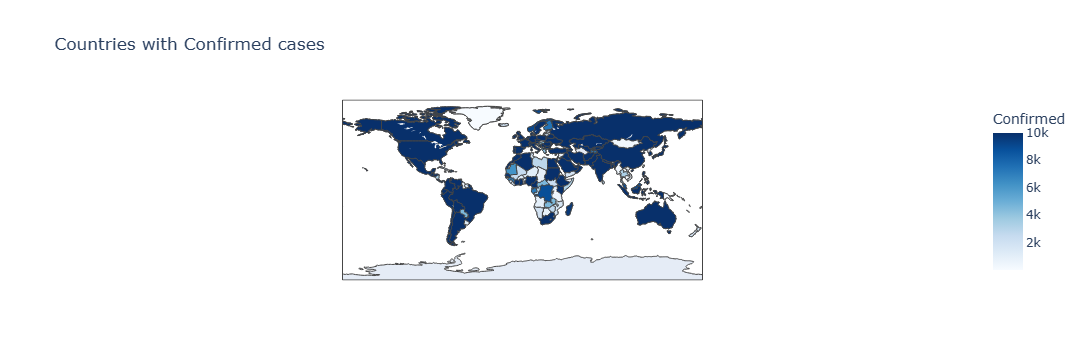

In [40]:
#Visualization of Confirmed cases
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Confirmed',hover_name='Country',
                       range_color=[1,10000],color_continuous_scale='Blues',title='Countries with Confirmed cases')
figure.show()


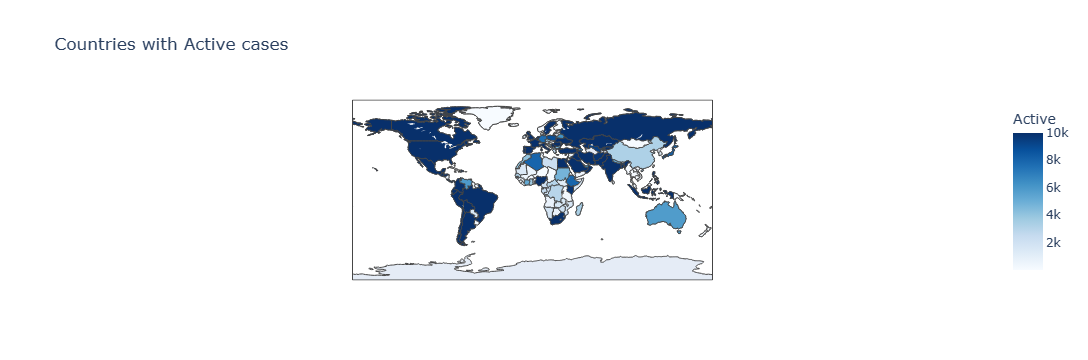

In [41]:
#Visualization of active cases
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Active',hover_name='Country',
                       range_color=[1,10000],color_continuous_scale='Blues',title='Countries with Active cases')
figure.show()

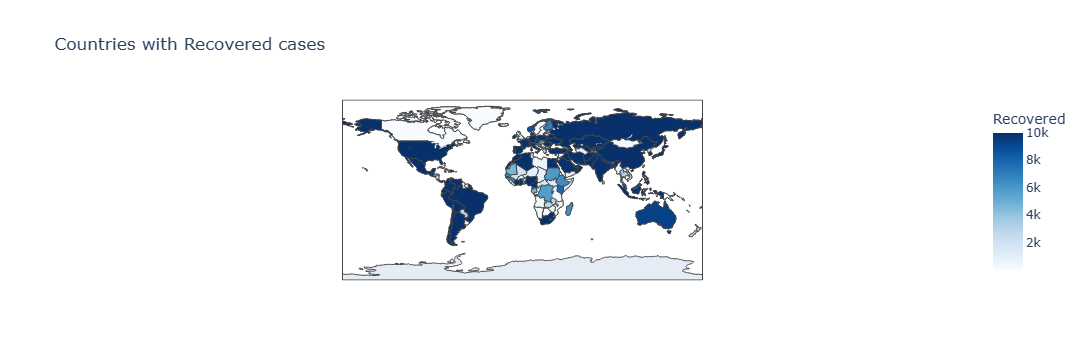

In [42]:
#Visualization of Recovered cases
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Recovered',hover_name='Country',
                       range_color=[1,10000],color_continuous_scale='Blues',title='Countries with Recovered cases')
figure.show()

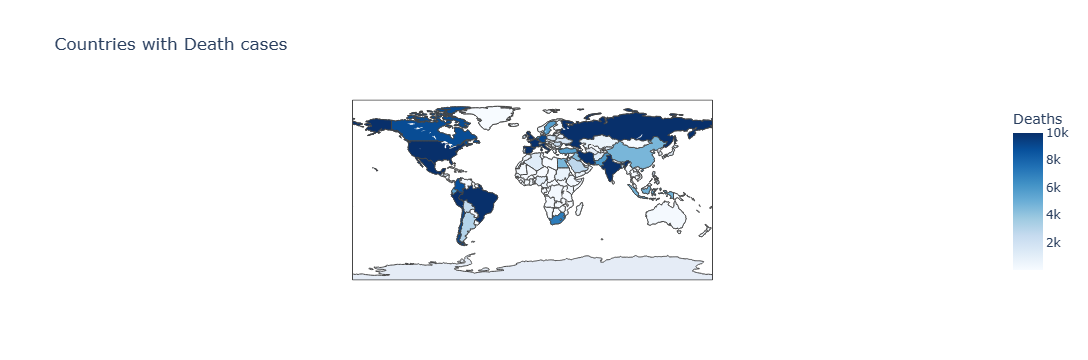

In [43]:
#Visualization of Death cases
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Deaths',hover_name='Country',
                       range_color=[1,10000],color_continuous_scale='Blues',title='Countries with Death cases')
figure.show()

# Analysing the trends in Confirmed,Active,Recovered and Death cases over time.


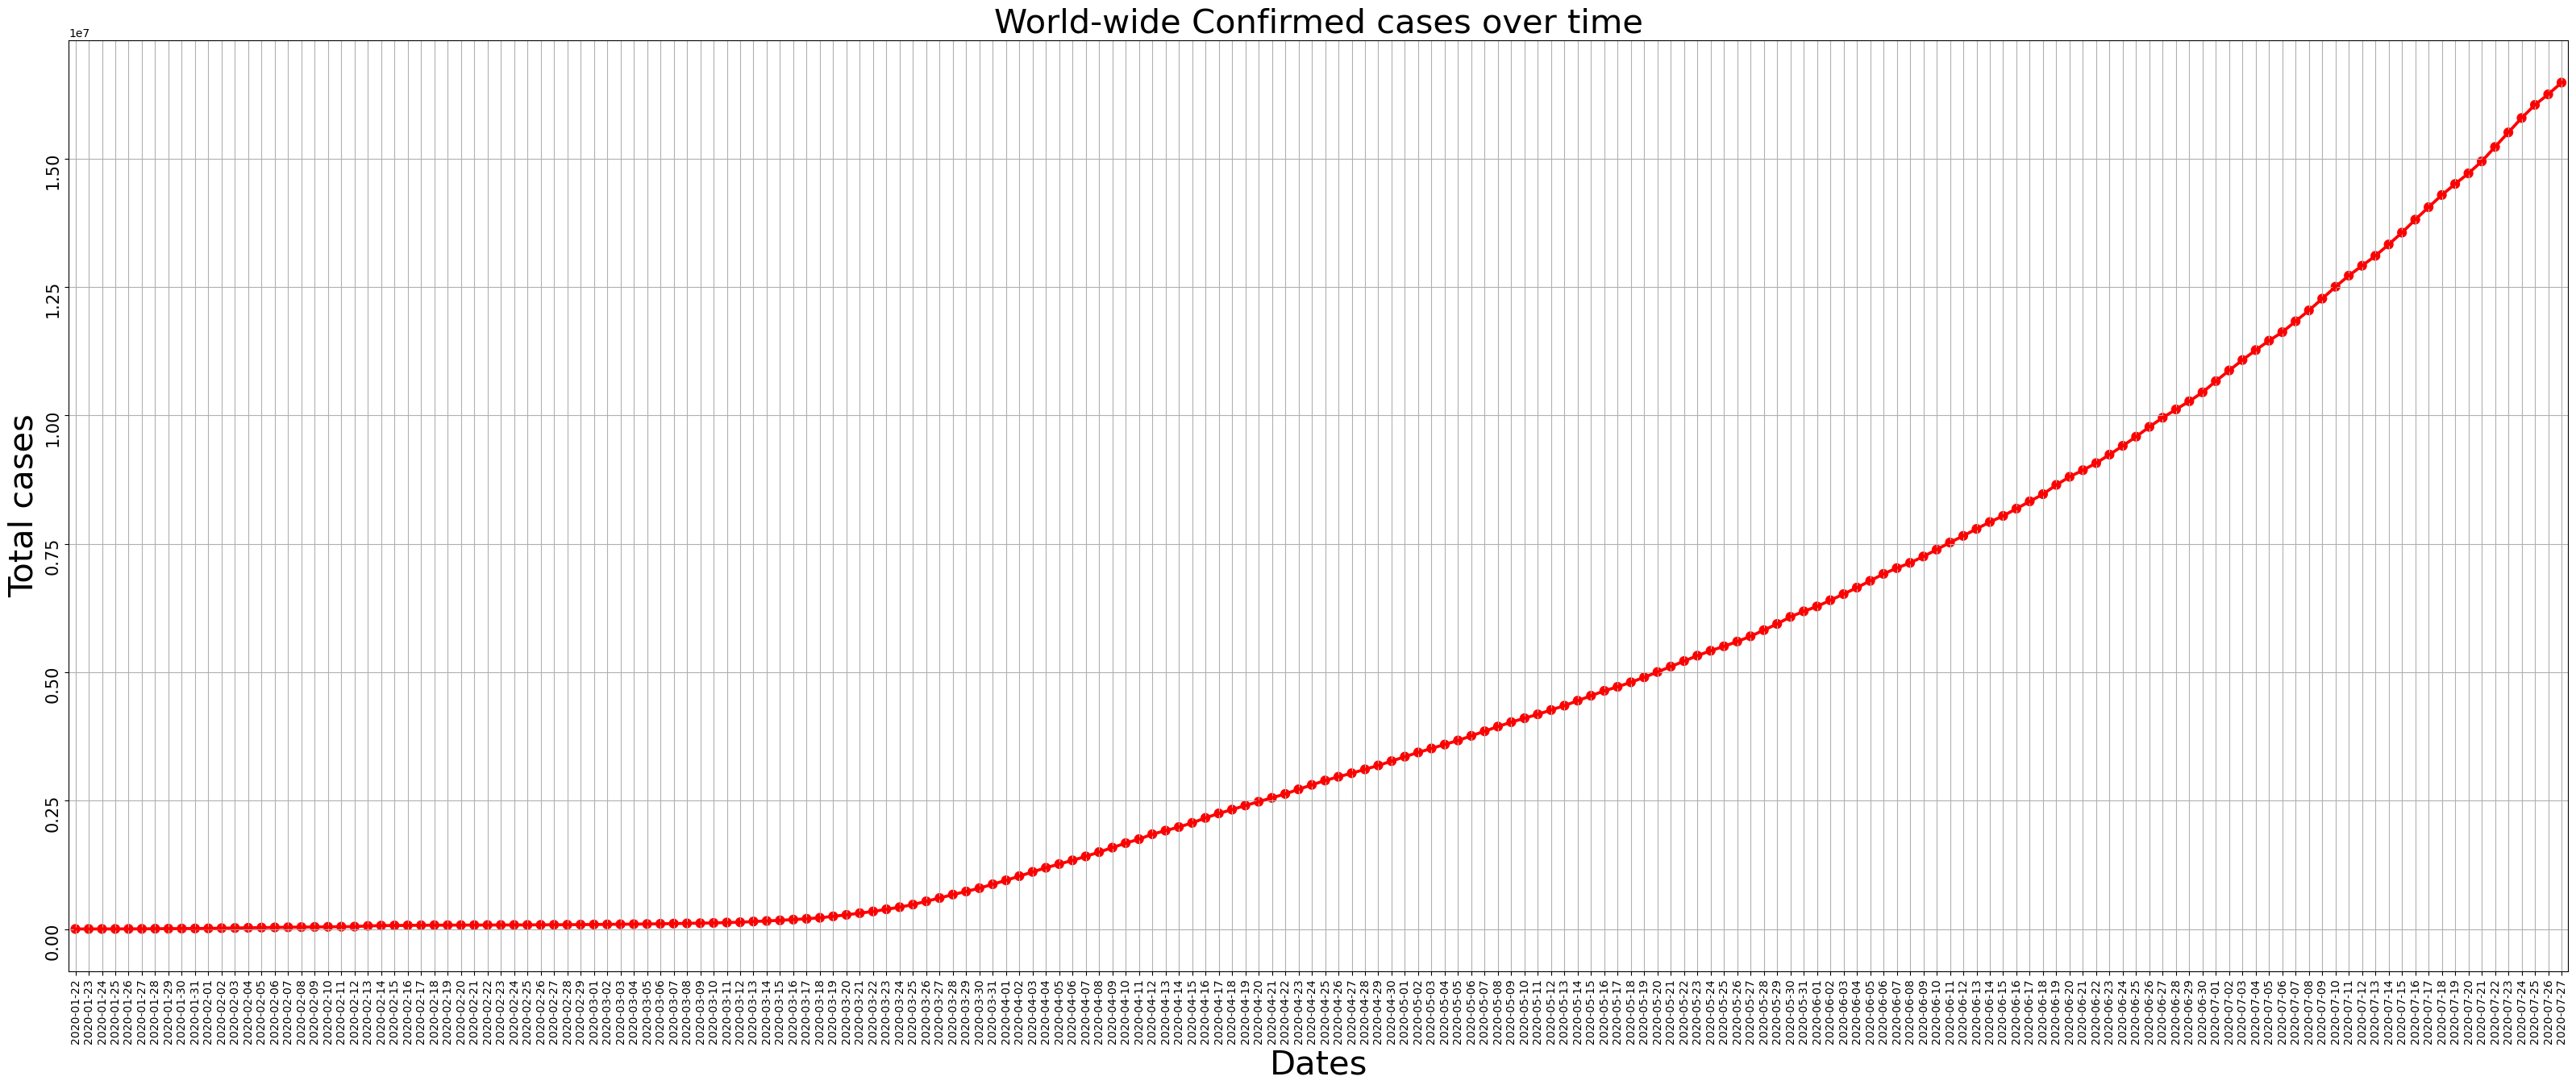

In [48]:
#Trend of Confirmed cases
plt.figure(figsize=(40,15))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.title("World-wide Confirmed cases over time",fontsize=30)
Total_cases_confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
Total_cases_confirmed
ax = sns.pointplot(x=Total_cases_confirmed.Date,y=Total_cases_confirmed.Confirmed,color='r')
ax.set(xlabel='Dates',ylabel='Total cases')
plt.grid()

Inference: 
The total number of confirmed cases across the world was almost constant till '2020-03-15' 
and started increasing drastically after that.

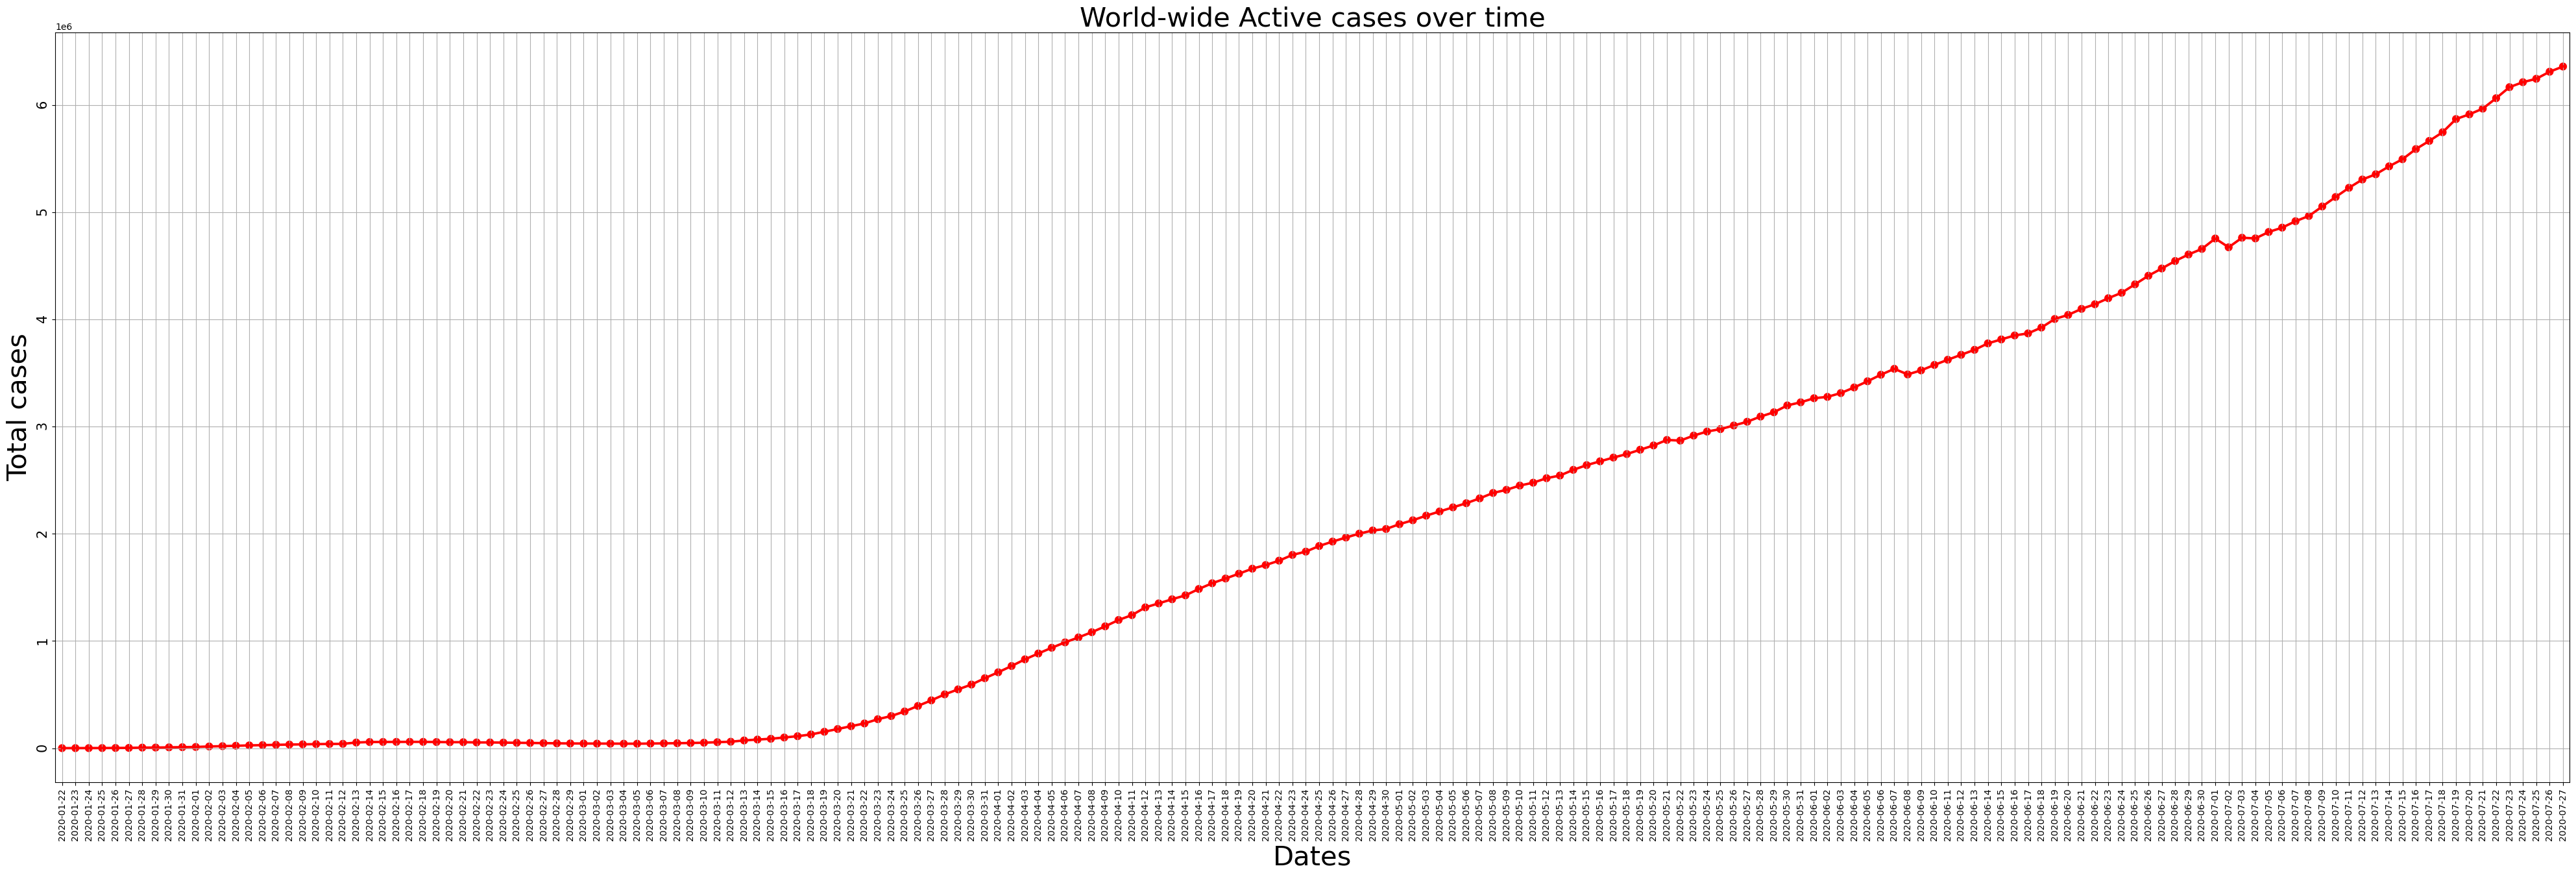

In [49]:
#Trend of Active cases
plt.figure(figsize=(50,15))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.title("World-wide Active cases over time",fontsize=30)
Total_cases_active = df.groupby('Date')['Active'].sum().reset_index()
Total_cases_active
ax = sns.pointplot(x=Total_cases_active.Date,y=Total_cases_active.Active,color='r')
ax.set(xlabel='Dates',ylabel='Total cases')
plt.grid()

Inference:
The total number of active cases across the world was almost constant till '2020-03-16' and started increasing drastically after that with slight decrements in '2020-06-08' and '2020-07-02'.

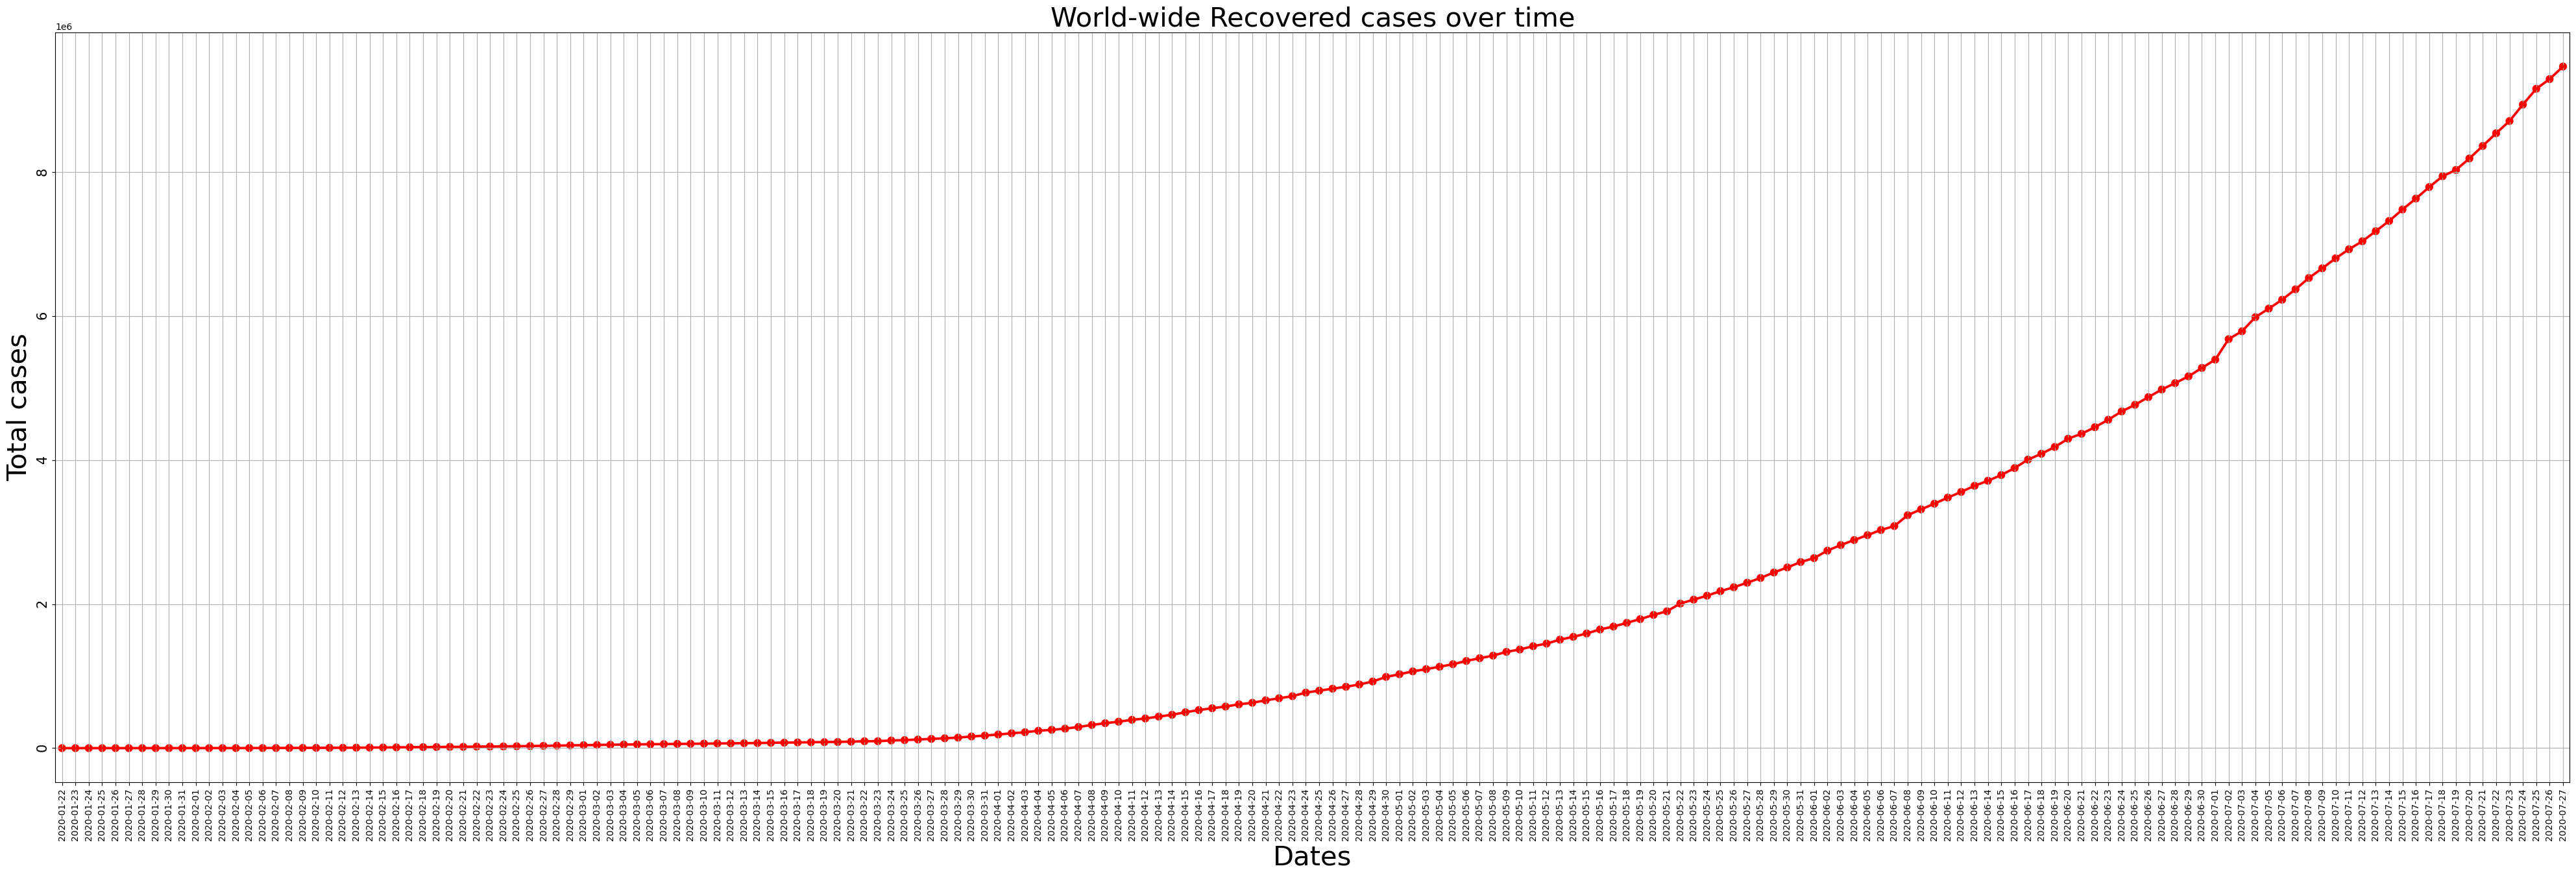

In [50]:
#Trend of Recovered cases
plt.figure(figsize=(50,15))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.title("World-wide Recovered cases over time",fontsize=30)
Total_cases_recovered = df.groupby('Date')['Recovered'].sum().reset_index()
Total_cases_recovered
ax = sns.pointplot(x=Total_cases_recovered.Date,y=Total_cases_recovered.Recovered,color='r')
ax.set(xlabel='Dates',ylabel='Total cases')
plt.grid()

Inference:
The total number of recovered cases across the world was almost constant till '2020-03-25' and started increasing drastically after that.

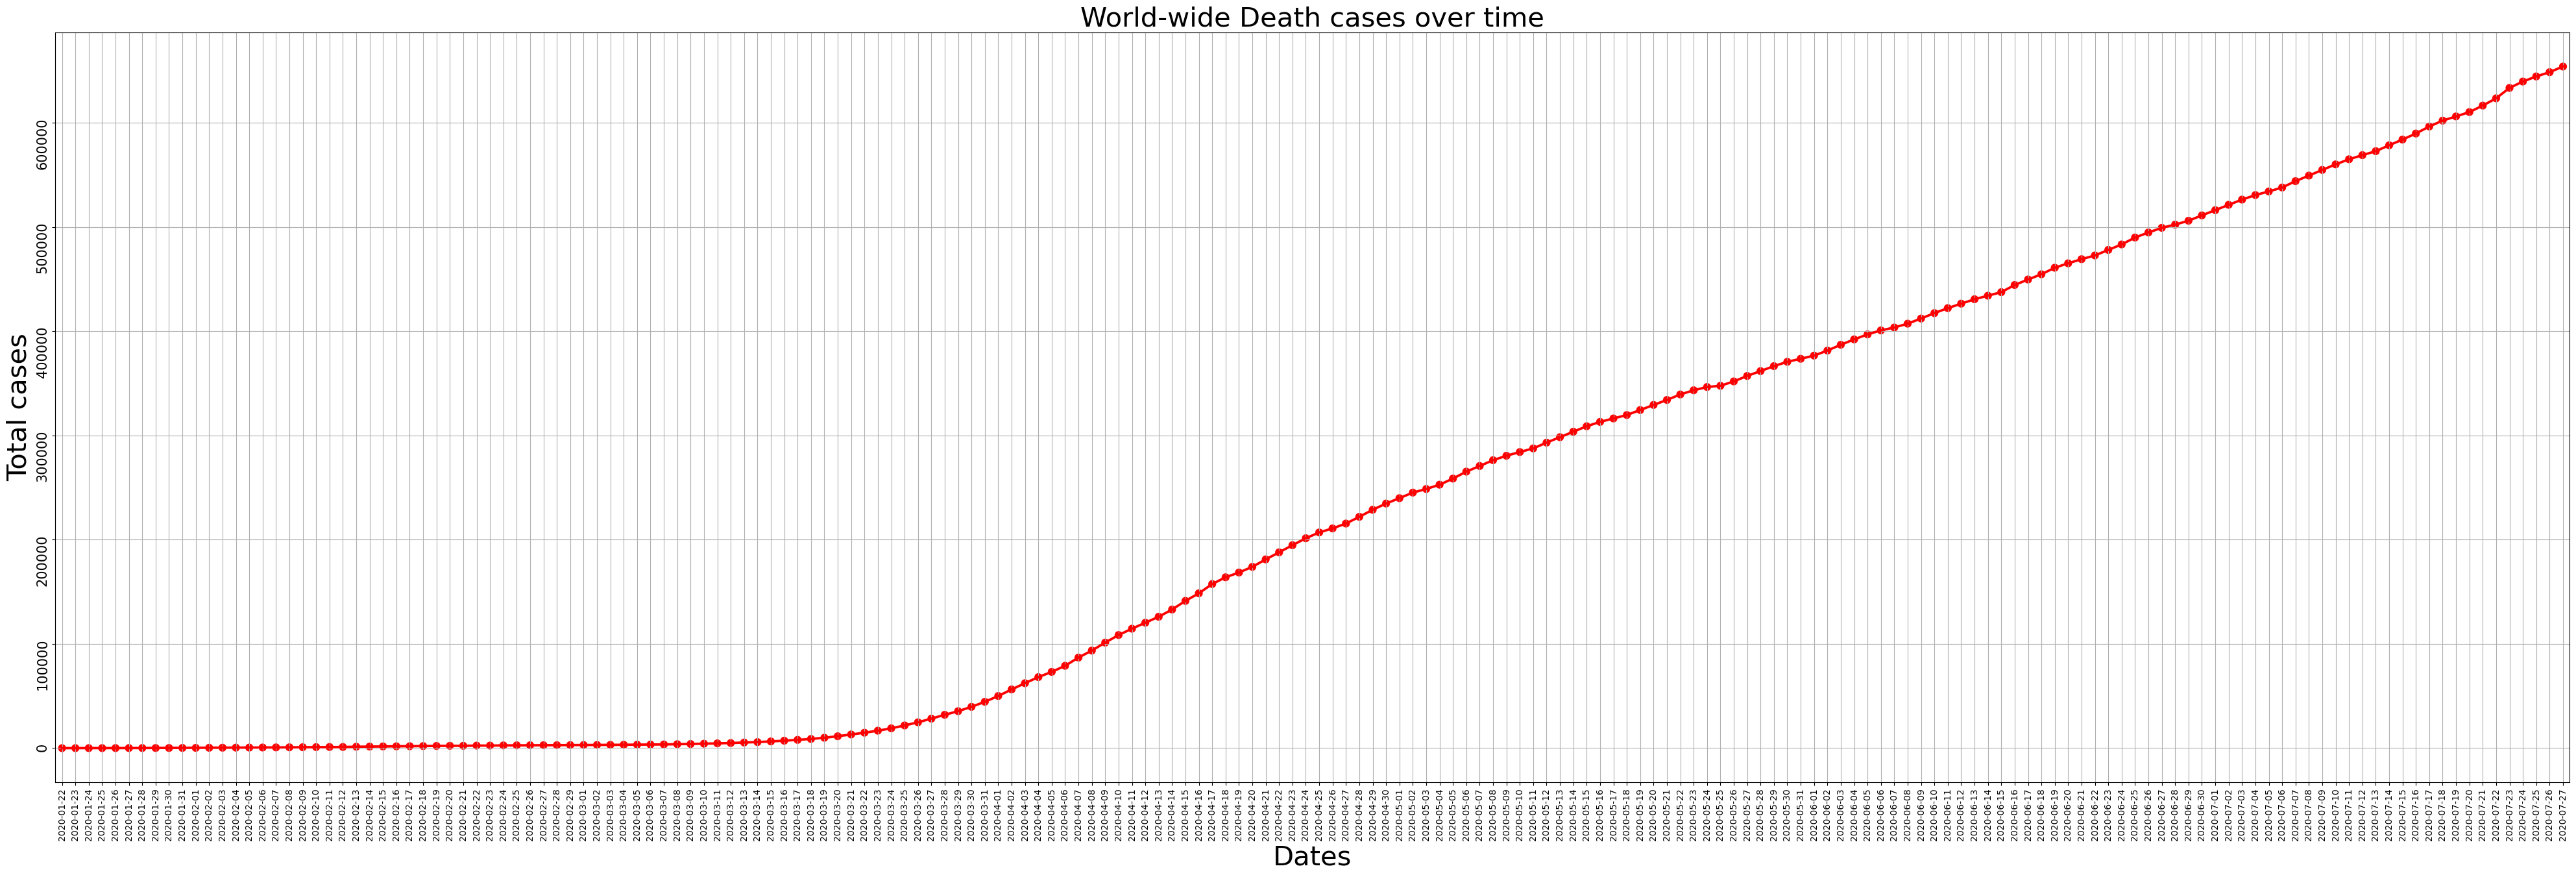

In [51]:
#Trend of Death cases
plt.figure(figsize=(50,15))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.title("World-wide Death cases over time",fontsize=30)
Total_cases_death = df.groupby('Date')['Deaths'].sum().reset_index()
Total_cases_death
ax = sns.pointplot(x=Total_cases_death.Date,y=Total_cases_death.Deaths,color='r')
ax.set(xlabel='Dates',ylabel='Total cases')
plt.grid()

Inference:
The total number of death cases across the world was almost constant till '2020-03-17' and started increasing drastically after that.

# Top 20 countries having most number of Confirmed,Active,Recovered and Death cases



# Top 20 countries having most number of Confirmed cases

In [52]:
top_confirmed = df.groupby(by='Country')["Confirmed"].sum().sort_values(ascending=False).head(20).reset_index()
top_confirmed

Country  Confirmed
0               US  224345948
1           Brazil   89524967
2           Russia   45408411
3            India   40883464
4            Spain   27404045
5   United Kingdom   26748587
6            Italy   26745145
7           France   21210926
8          Germany   21059152
9             Iran   19339267
10            Peru   19263916
11          Turkey   17903345
12           Chile   16935654
13          Mexico   14946202
14           China   14132002
15        Pakistan   12833994
16    Saudi Arabia   12362961
17    South Africa   11168743
18          Canada    9356551
19      Bangladesh    8754729

[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

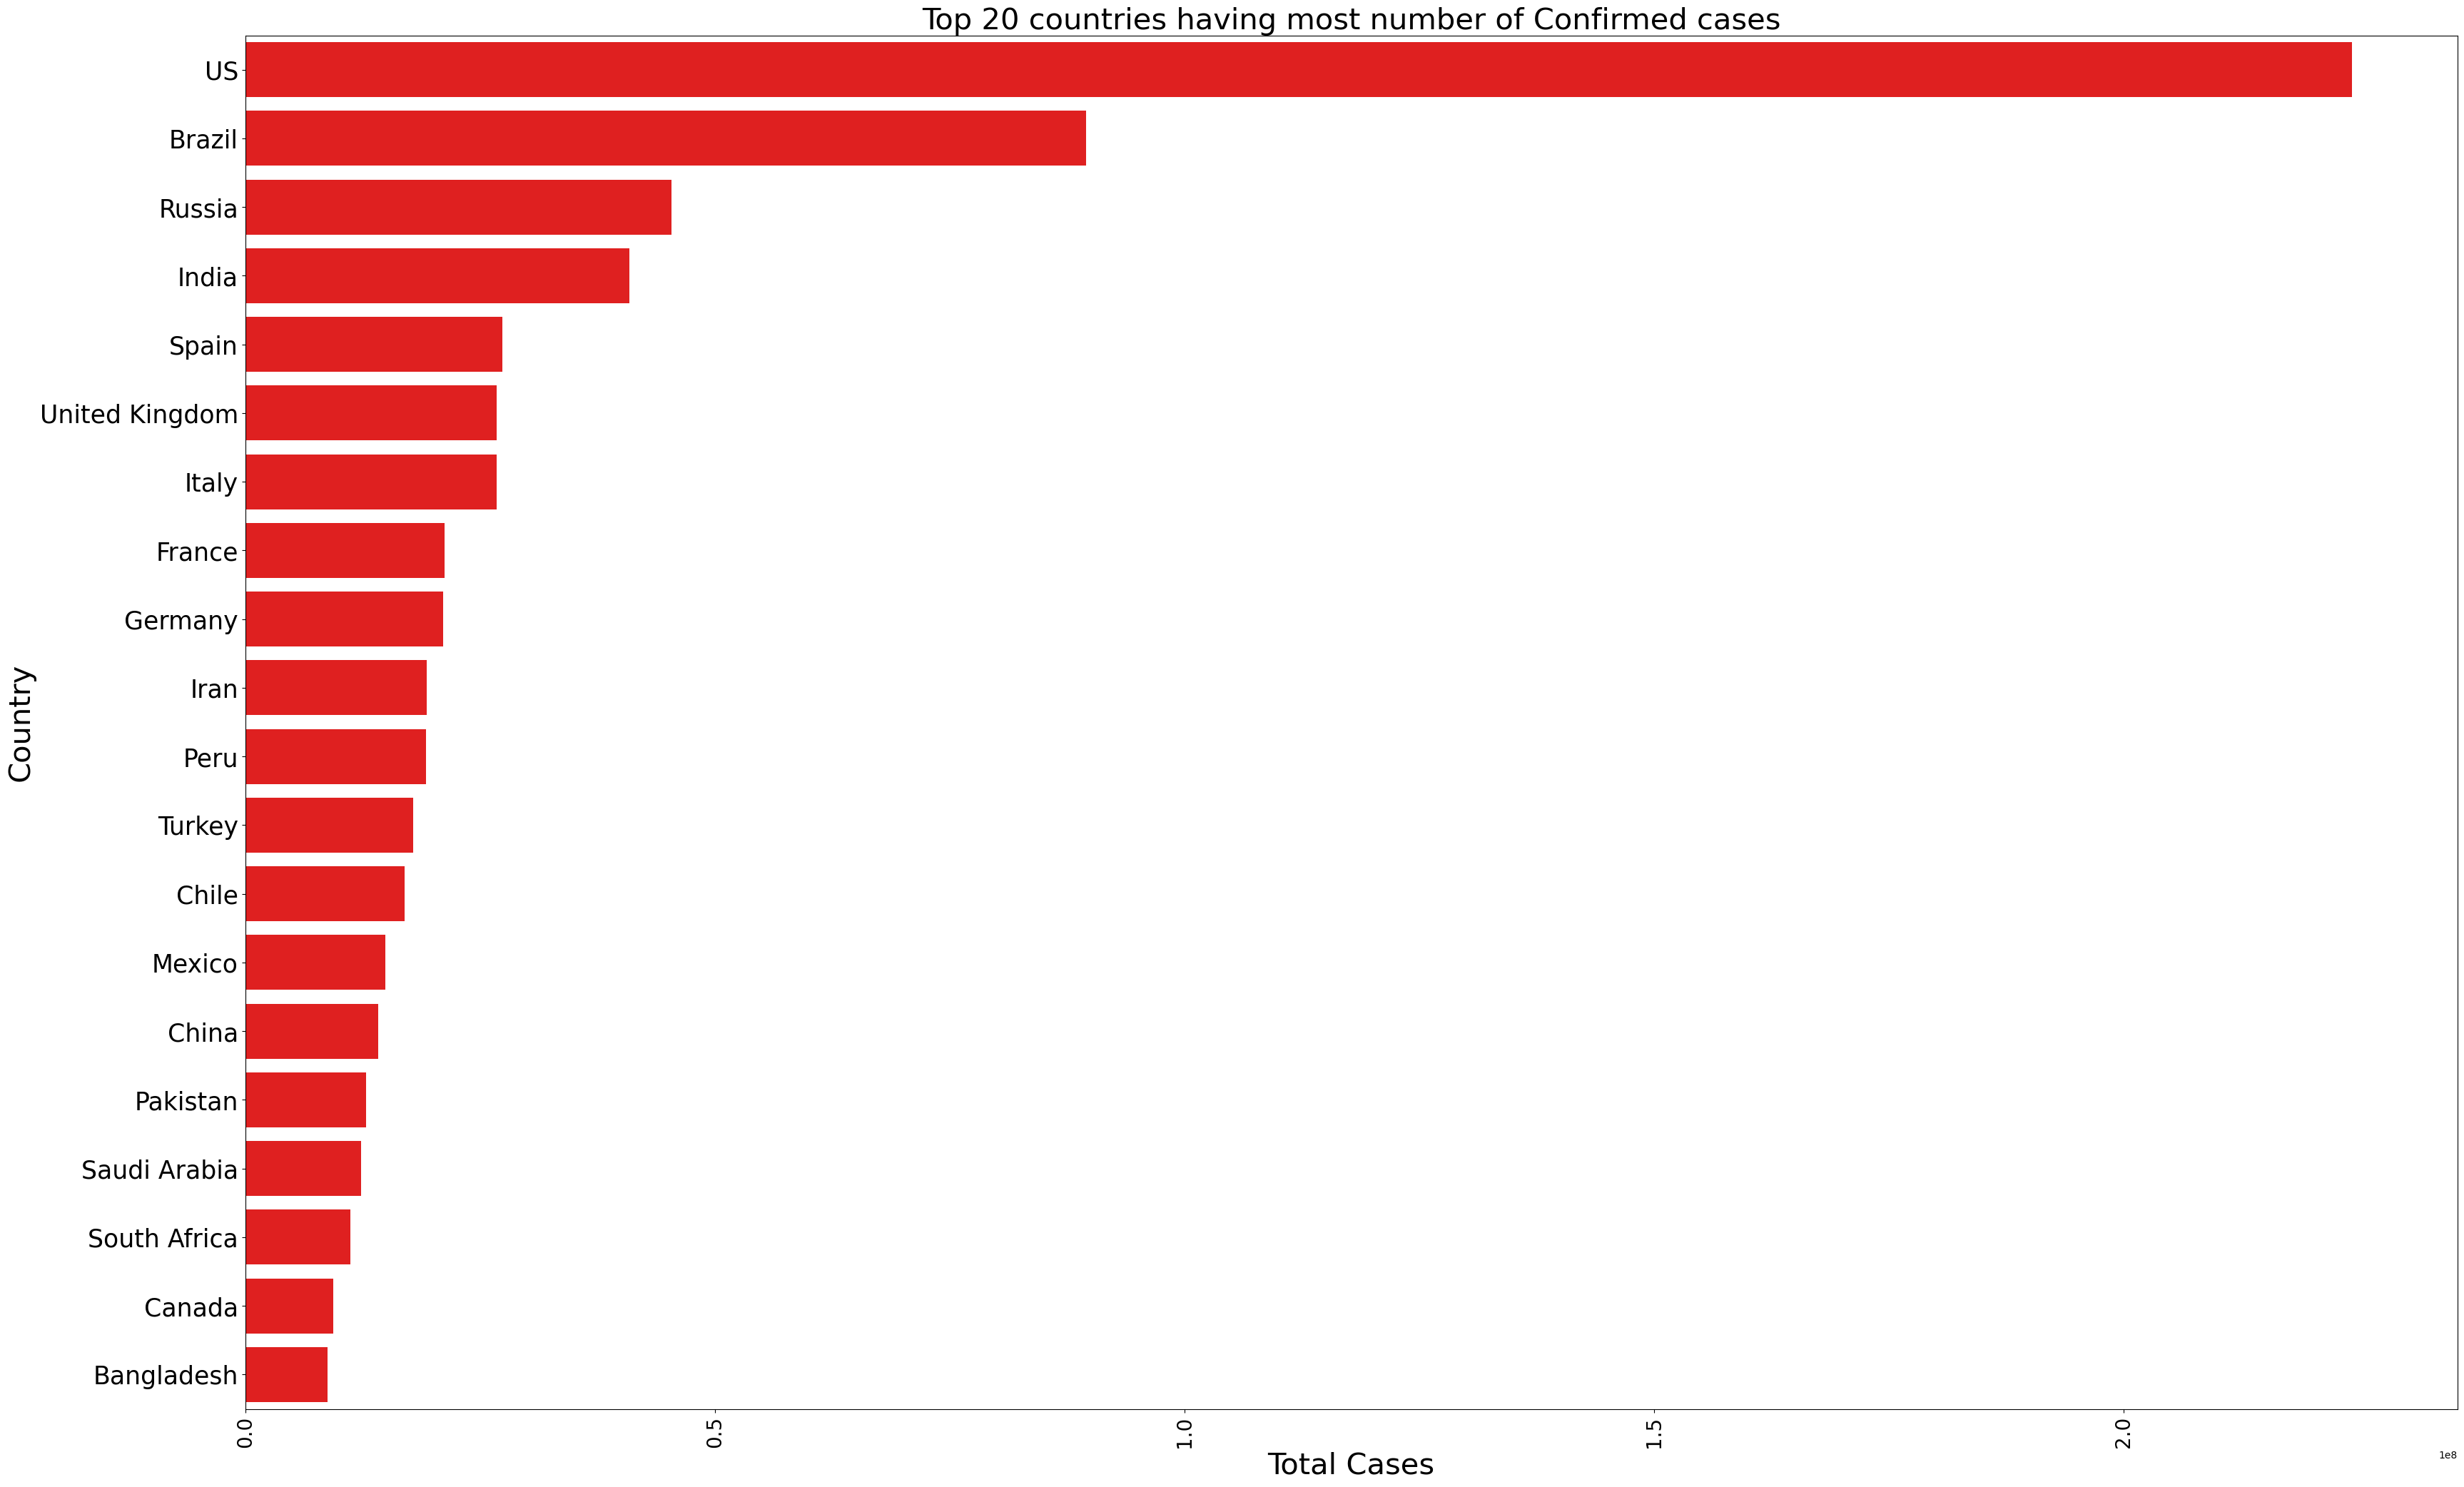

In [53]:
#Trend of confirmed cases
plt.figure(figsize=(40,25))
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=25)
plt.xlabel('Total Cases',fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title("Top 20 countries having most number of Confirmed cases",fontsize=30)
ax = sns.barplot(x=top_confirmed.Confirmed,y=top_confirmed.Country,color='r')
ax.set(xlabel='Total Cases',ylabel='Country')


In [55]:
#US - (Total number of 'Confirmed','Active','Recovered','Deaths' cases)
US=df[df.Country=='US']
US = US.groupby(by='Date')[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
US

Date  Confirmed   Active  Recovered  Deaths
0    2020-01-22          1        1          0       0
1    2020-01-23          1        1          0       0
2    2020-01-24          2        2          0       0
3    2020-01-25          2        2          0       0
4    2020-01-26          5        5          0       0
..          ...        ...      ...        ...     ...
183  2020-07-23    4038816  2661117    1233269  144430
184  2020-07-24    4112531  2705347    1261624  145560
185  2020-07-25    4178970  2753091    1279414  146465
186  2020-07-26    4233923  2789125    1297863  146935
187  2020-07-27    4290259  2816444    1325804  148011

[188 rows x 5 columns]

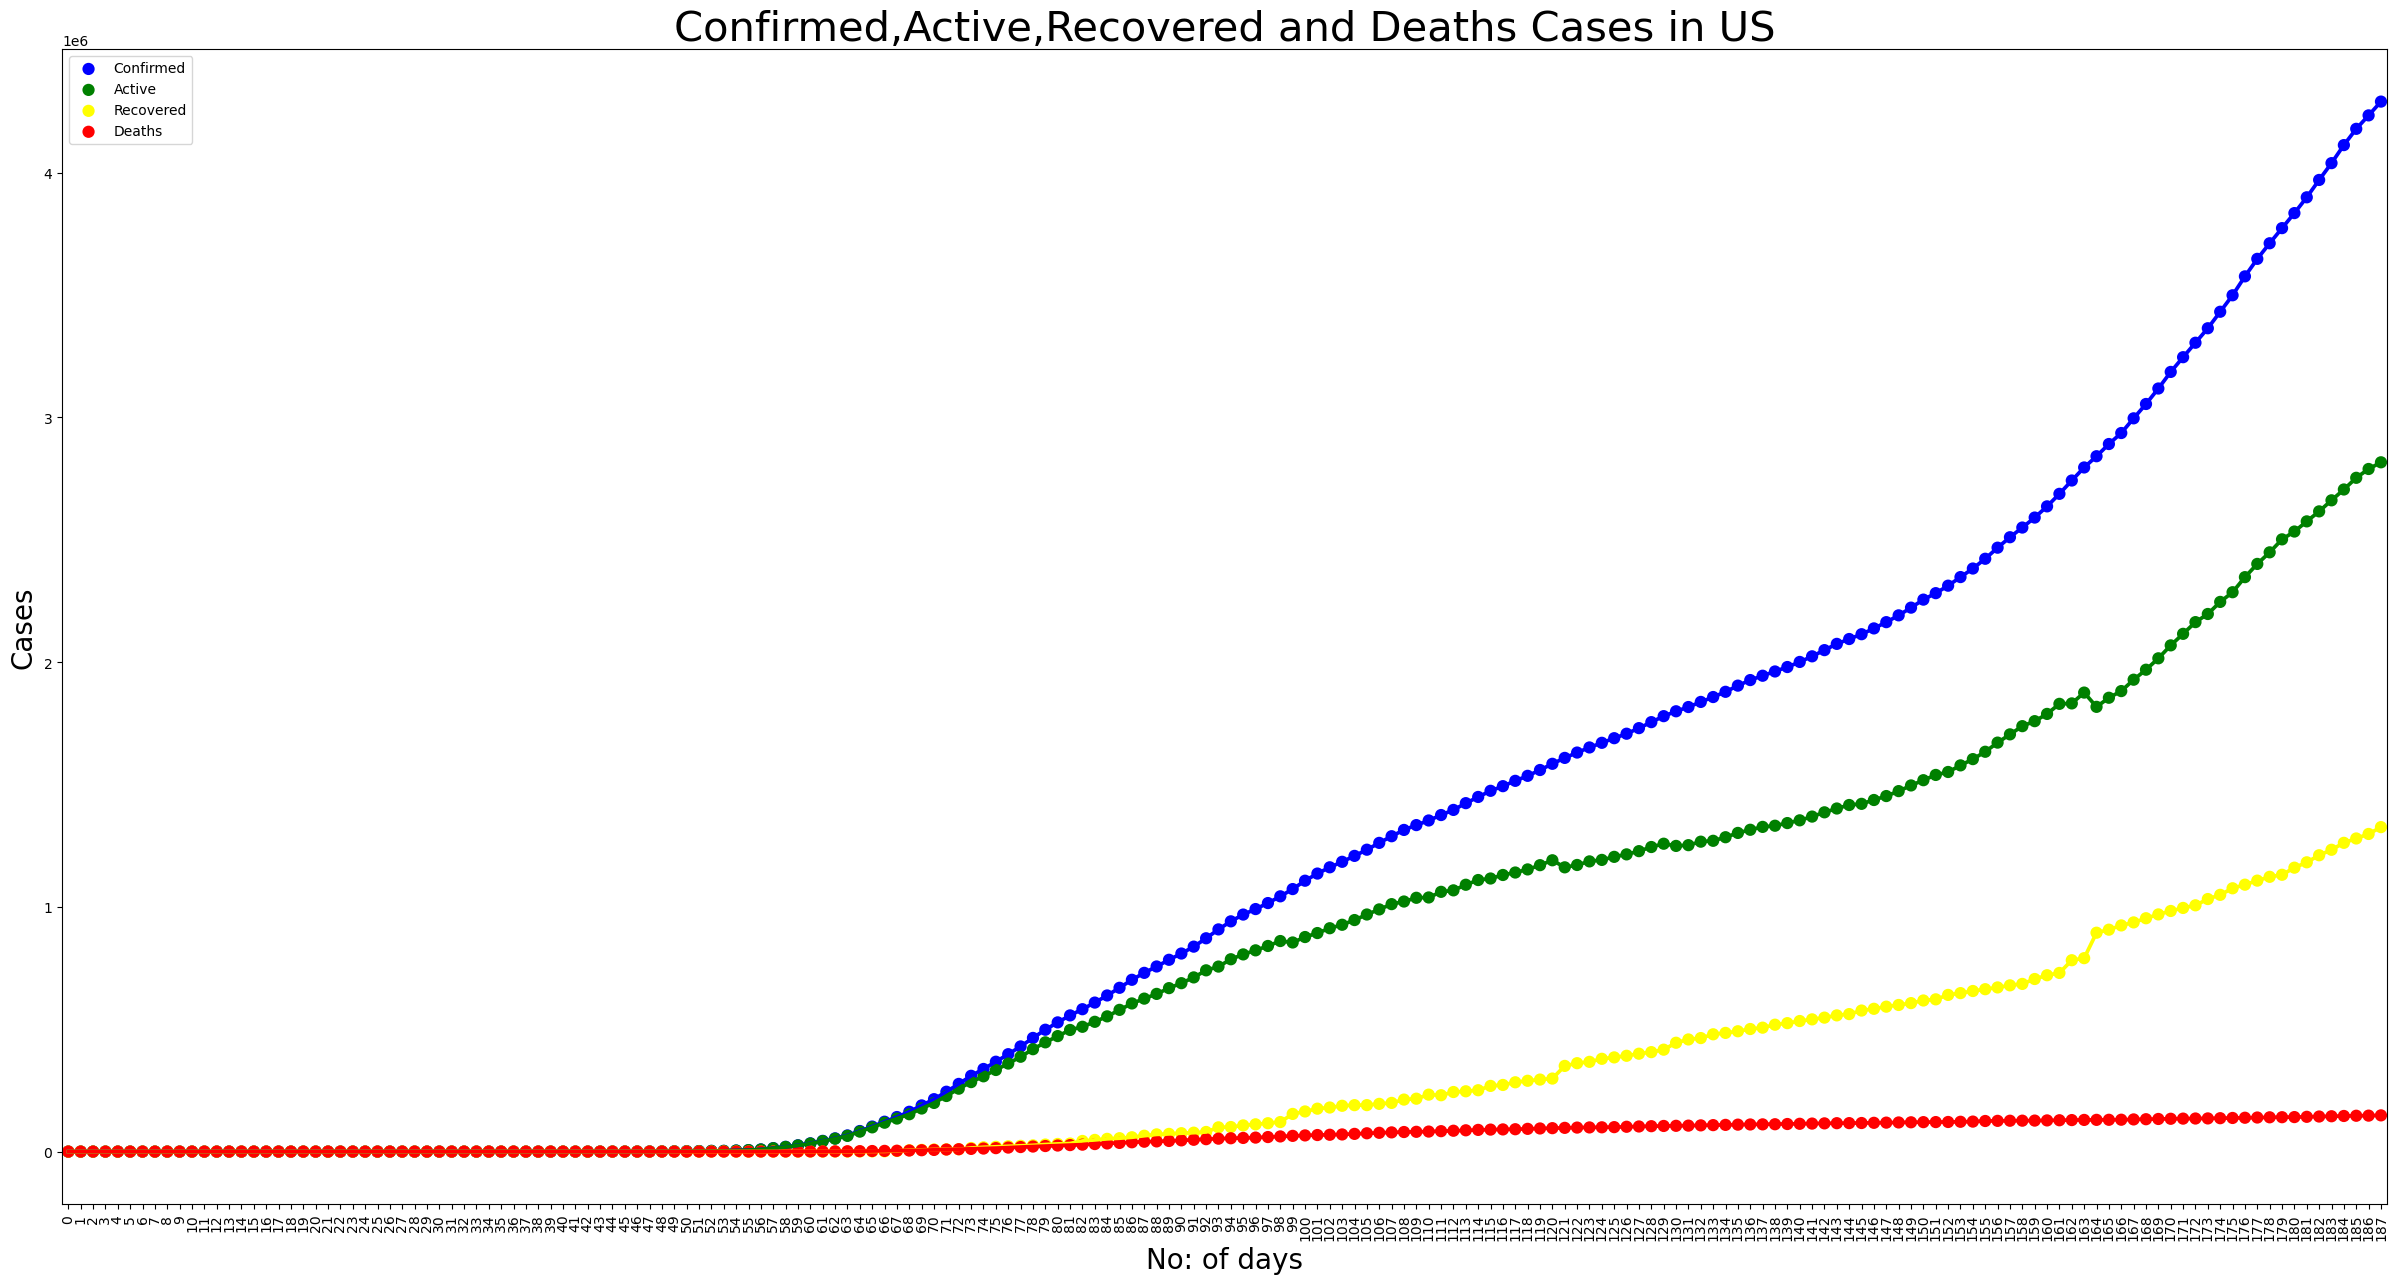

In [107]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=US,x=US.index,y='Confirmed',color='Blue',label='Confirmed')
sns.pointplot(data=US,x=US.index,y='Active',color='Green',label='Active')
sns.pointplot(data=US,x=US.index,y='Recovered',color='Yellow',label='Recovered')
sns.pointplot(data=US,x=US.index,y='Deaths',color='Red',label='Deaths')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.title("Confirmed,Active,Recovered and Deaths Cases in US",fontsize=30)
plt.legend()
plt.show()

In [56]:
#Brazil - (Total number of 'Confirmed','Active','Recovered','Deaths' cases)
Brazil=df[df.Country=='Brazil']
Brazil = Brazil.groupby(by='Date')[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
Brazil

Date  Confirmed  Active  Recovered  Deaths
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23    2287475  583080    1620313   84082
184  2020-07-24    2343366  564914    1693214   85238
185  2020-07-25    2394513  522705    1785359   86449
186  2020-07-26    2419091  519174    1812913   87004
187  2020-07-27    2442375  508116    1846641   87618

[188 rows x 5 columns]

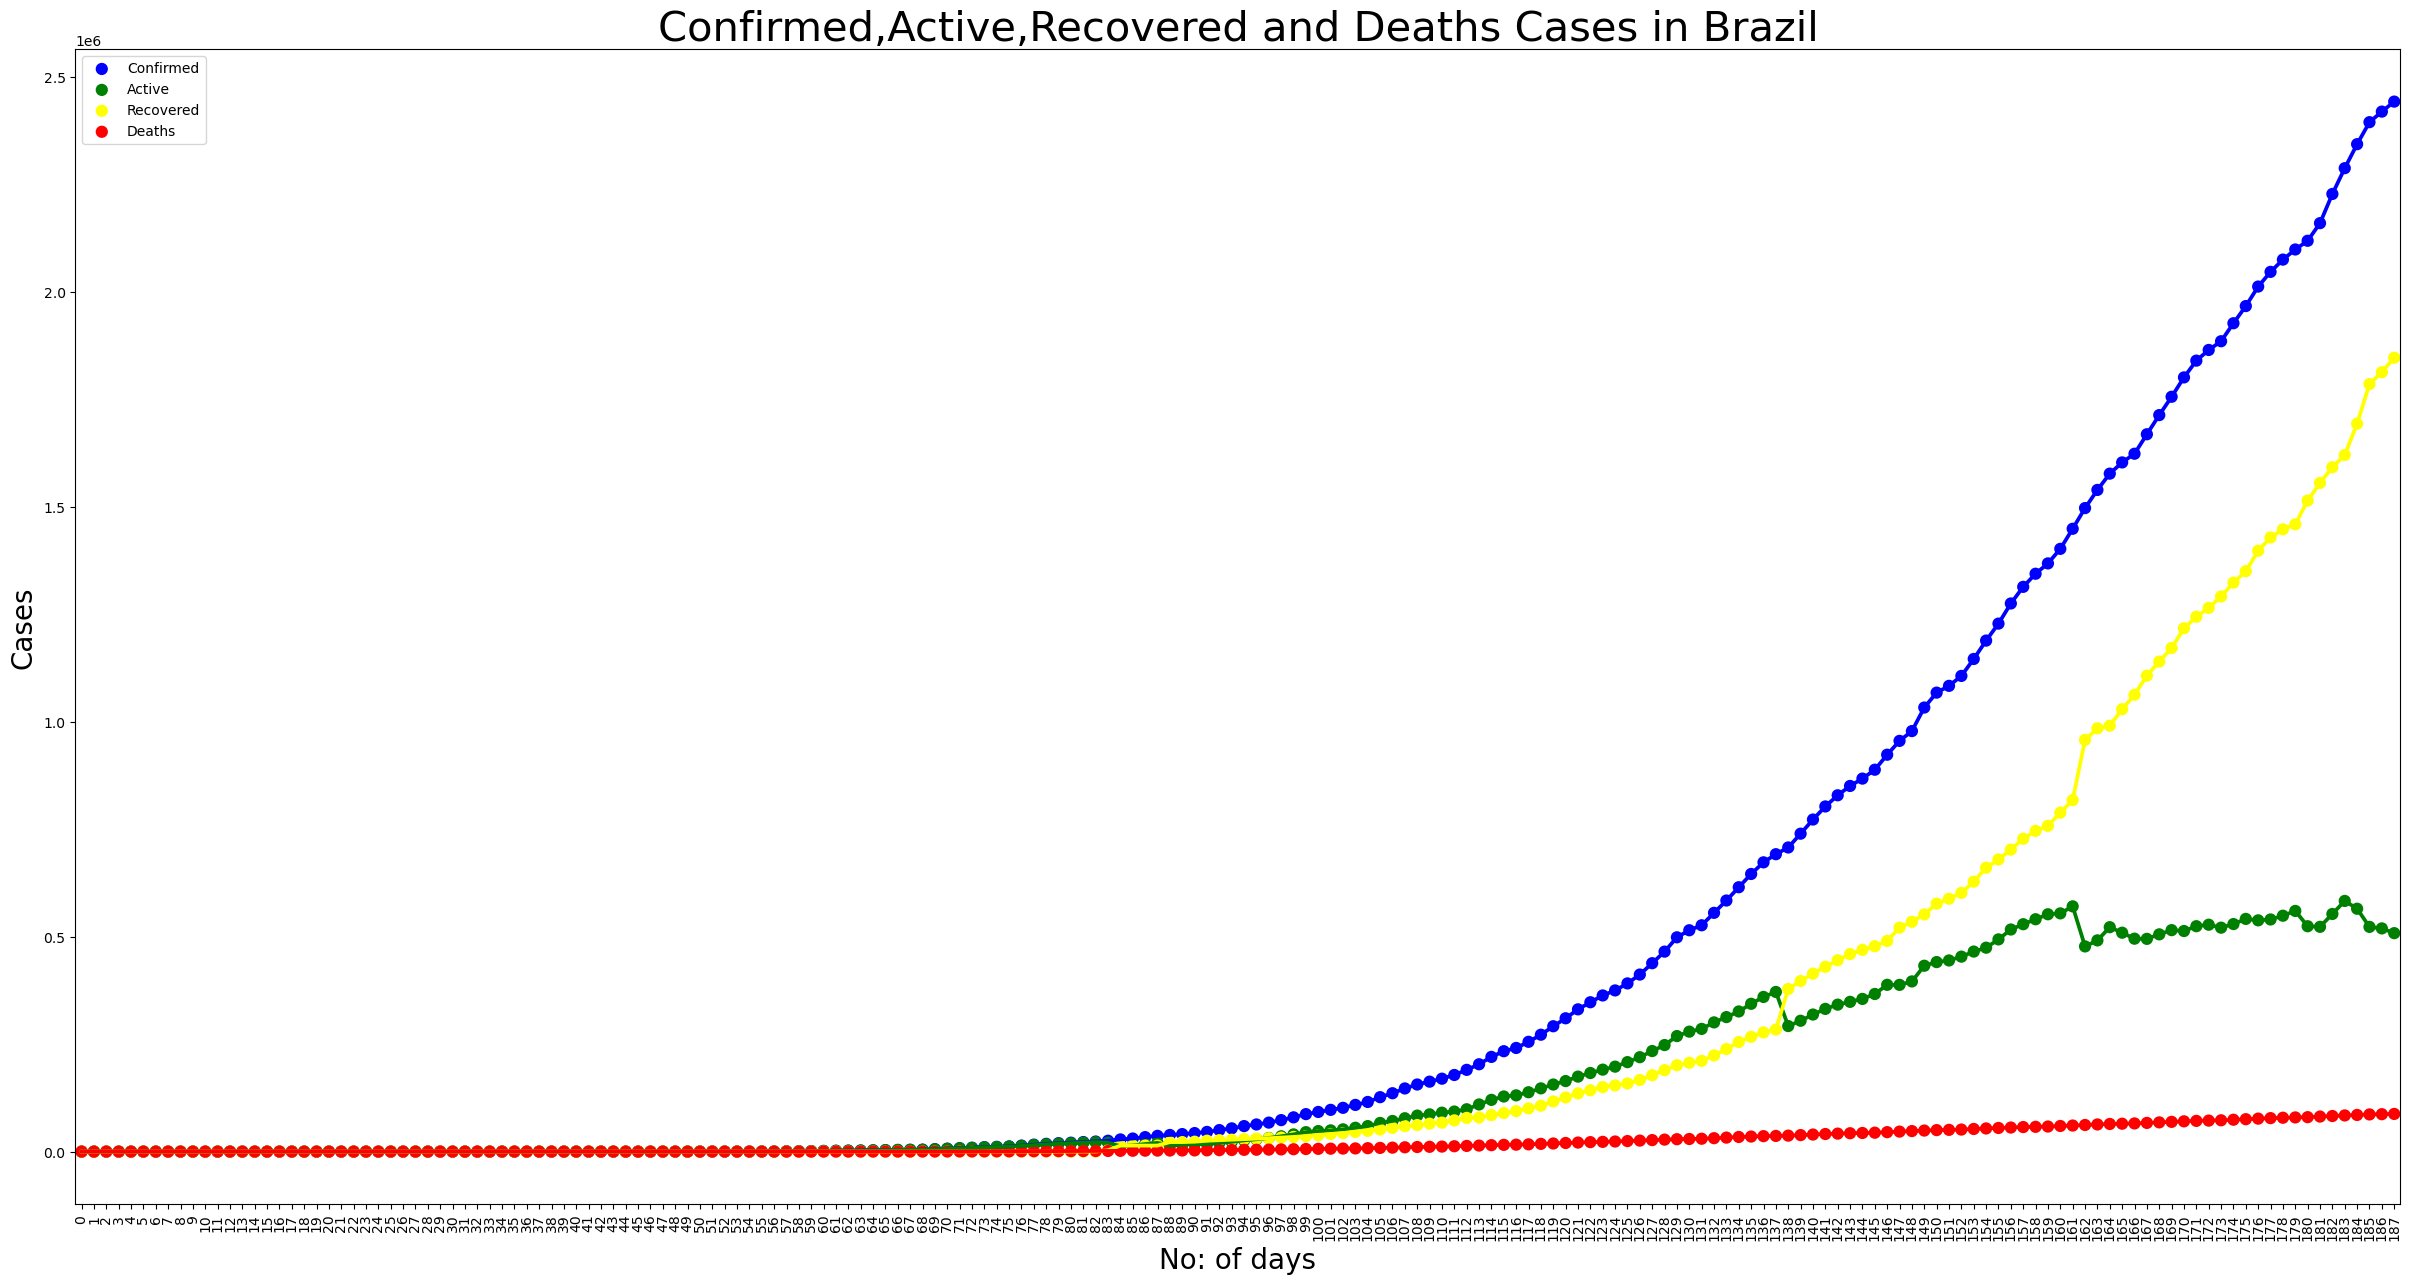

In [57]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=Brazil,x=Brazil.index,y='Confirmed',color='Blue',label='Confirmed')
sns.pointplot(data=Brazil,x=Brazil.index,y='Active',color='Green',label='Active')
sns.pointplot(data=Brazil,x=Brazil.index,y='Recovered',color='Yellow',label='Recovered')
sns.pointplot(data=Brazil,x=Brazil.index,y='Deaths',color='Red',label='Deaths')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.title("Confirmed,Active,Recovered and Deaths Cases in Brazil",fontsize=30)
plt.legend()
plt.show()

In [59]:
#Russia - (Total number of 'Confirmed','Active','Recovered','Deaths' cases)
Russia=df[df.Country=='Russia']
Russia = Russia.groupby(by='Date')[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
Russia

Date  Confirmed  Active  Recovered  Deaths
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     793720  201552     579295   12873
184  2020-07-24     799499  198745     587728   13026
185  2020-07-25     805332  196096     596064   13172
186  2020-07-26     811073  198652     599172   13249
187  2020-07-27     816680  201097     602249   13334

[188 rows x 5 columns]

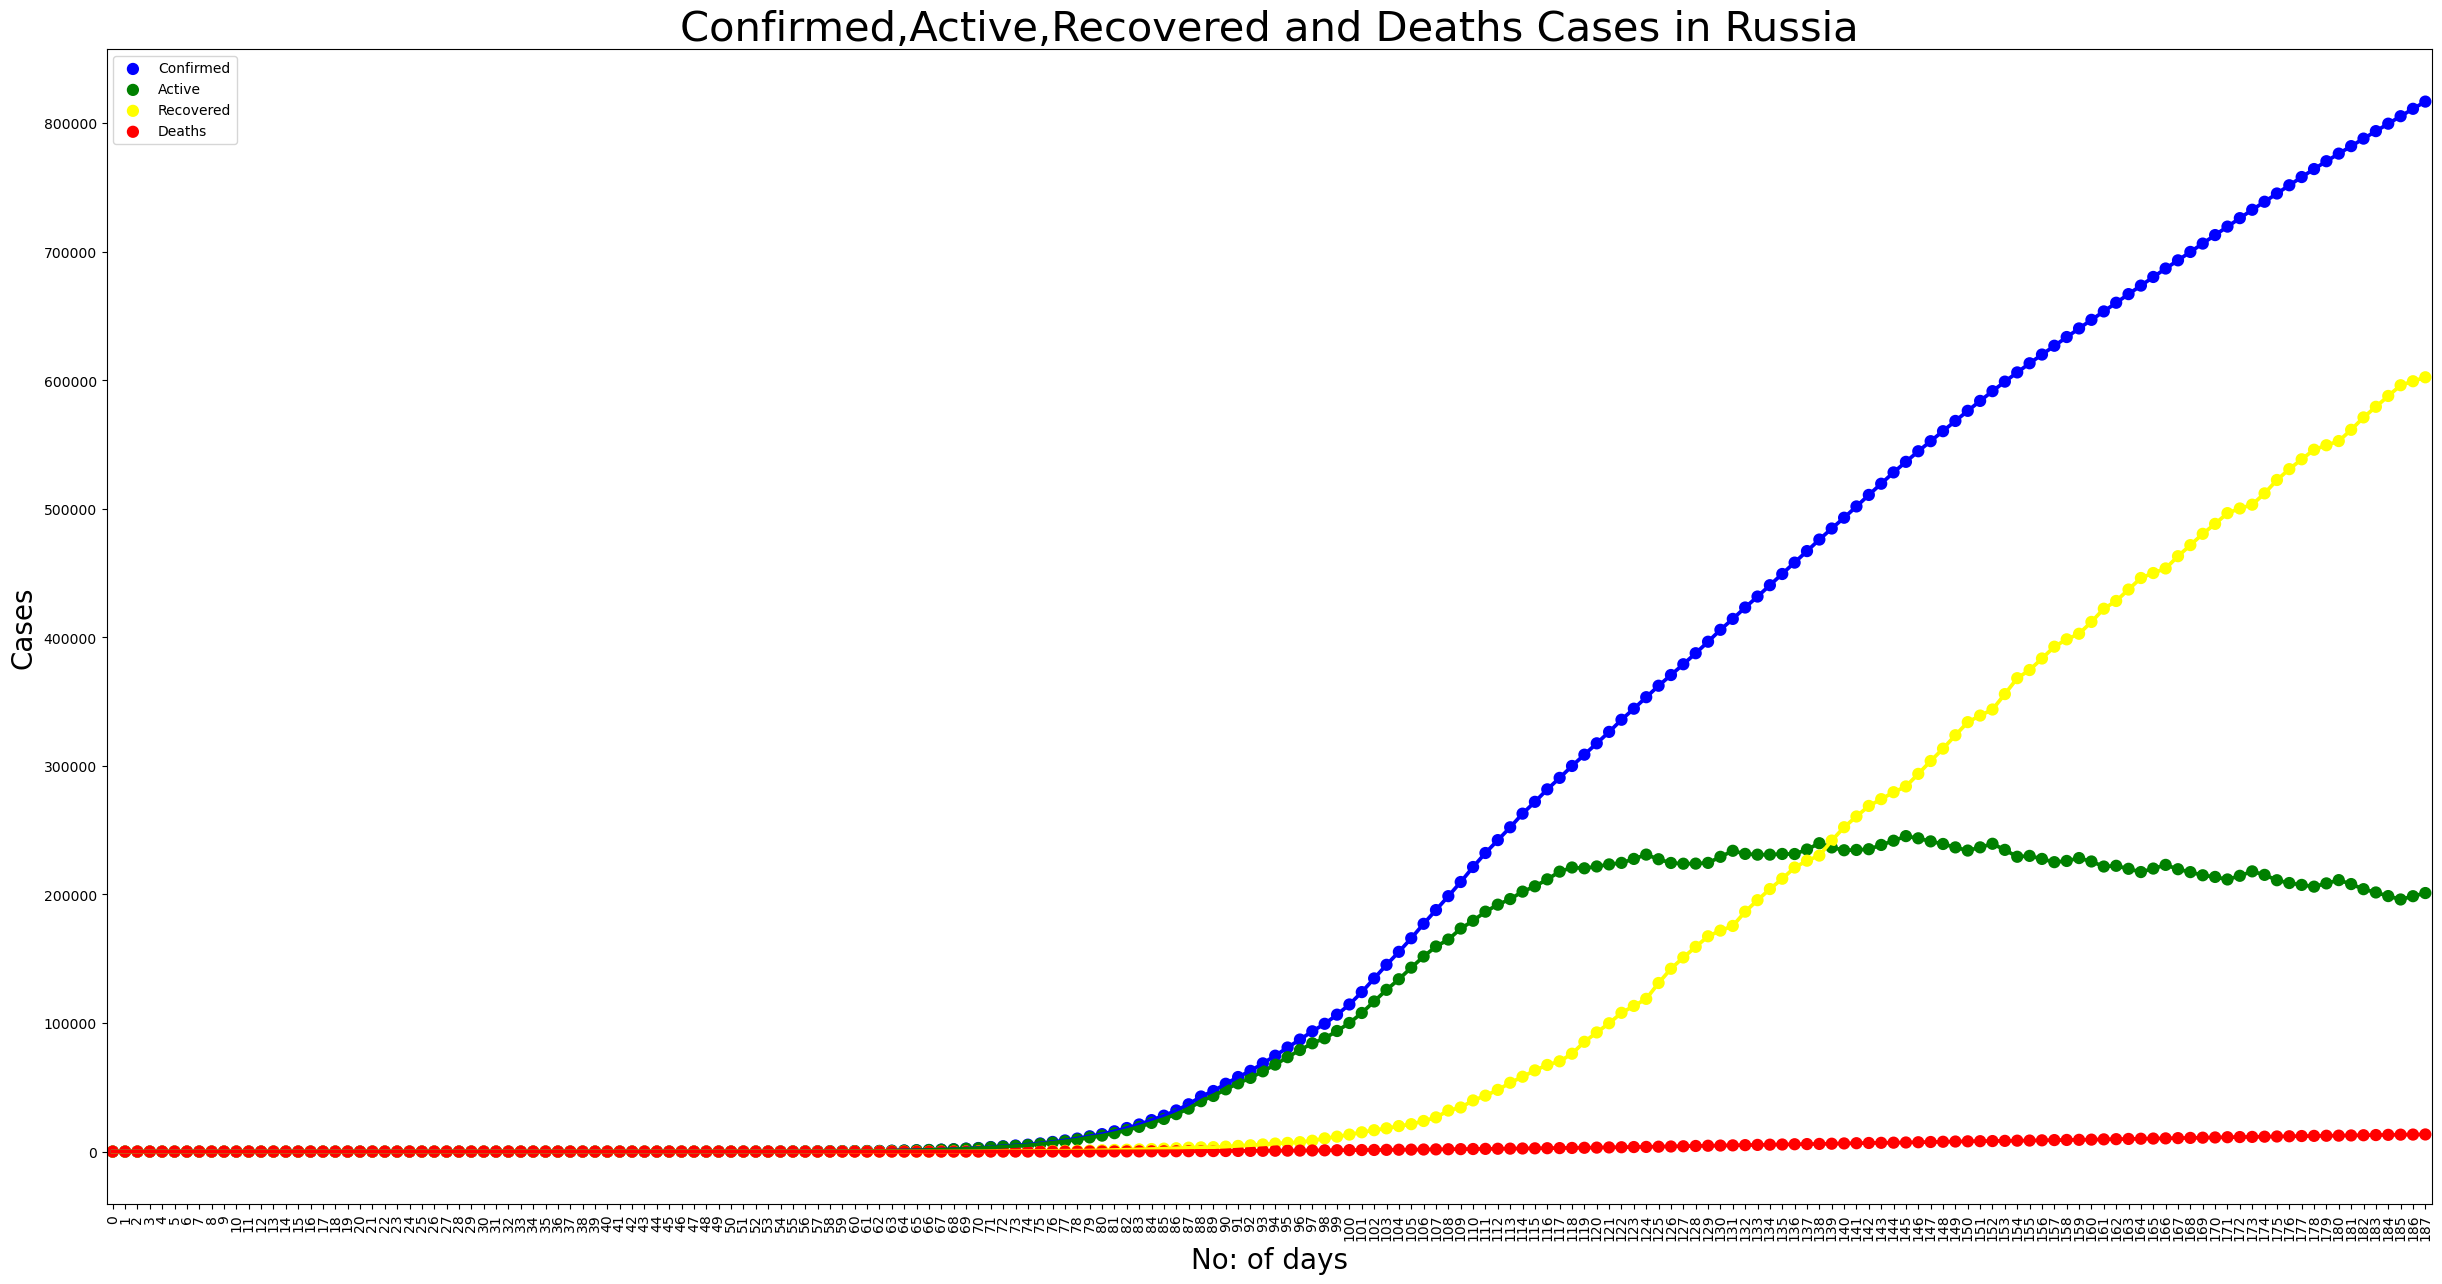

In [60]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=Russia,x=Russia.index,y='Confirmed',color='Blue',label='Confirmed')
sns.pointplot(data=Russia,x=Russia.index,y='Active',color='Green',label='Active')
sns.pointplot(data=Russia,x=Russia.index,y='Recovered',color='Yellow',label='Recovered')
sns.pointplot(data=Russia,x=Russia.index,y='Deaths',color='Red',label='Deaths')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.title("Confirmed,Active,Recovered and Deaths Cases in Russia",fontsize=30)
plt.legend()
plt.show()

In [61]:
#India - (Total number of 'Confirmed','Active','Recovered','Deaths' cases)
India=df[df.Country=='India']
India = India.groupby(by='Date')[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
India

Date  Confirmed  Active  Recovered  Deaths
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23    1288108  440298     817209   30601
184  2020-07-24    1337024  456234     849432   31358
185  2020-07-25    1385635  468002     885573   32060
186  2020-07-26    1435616  485277     917568   32771
187  2020-07-27    1480073  495499     951166   33408

[188 rows x 5 columns]

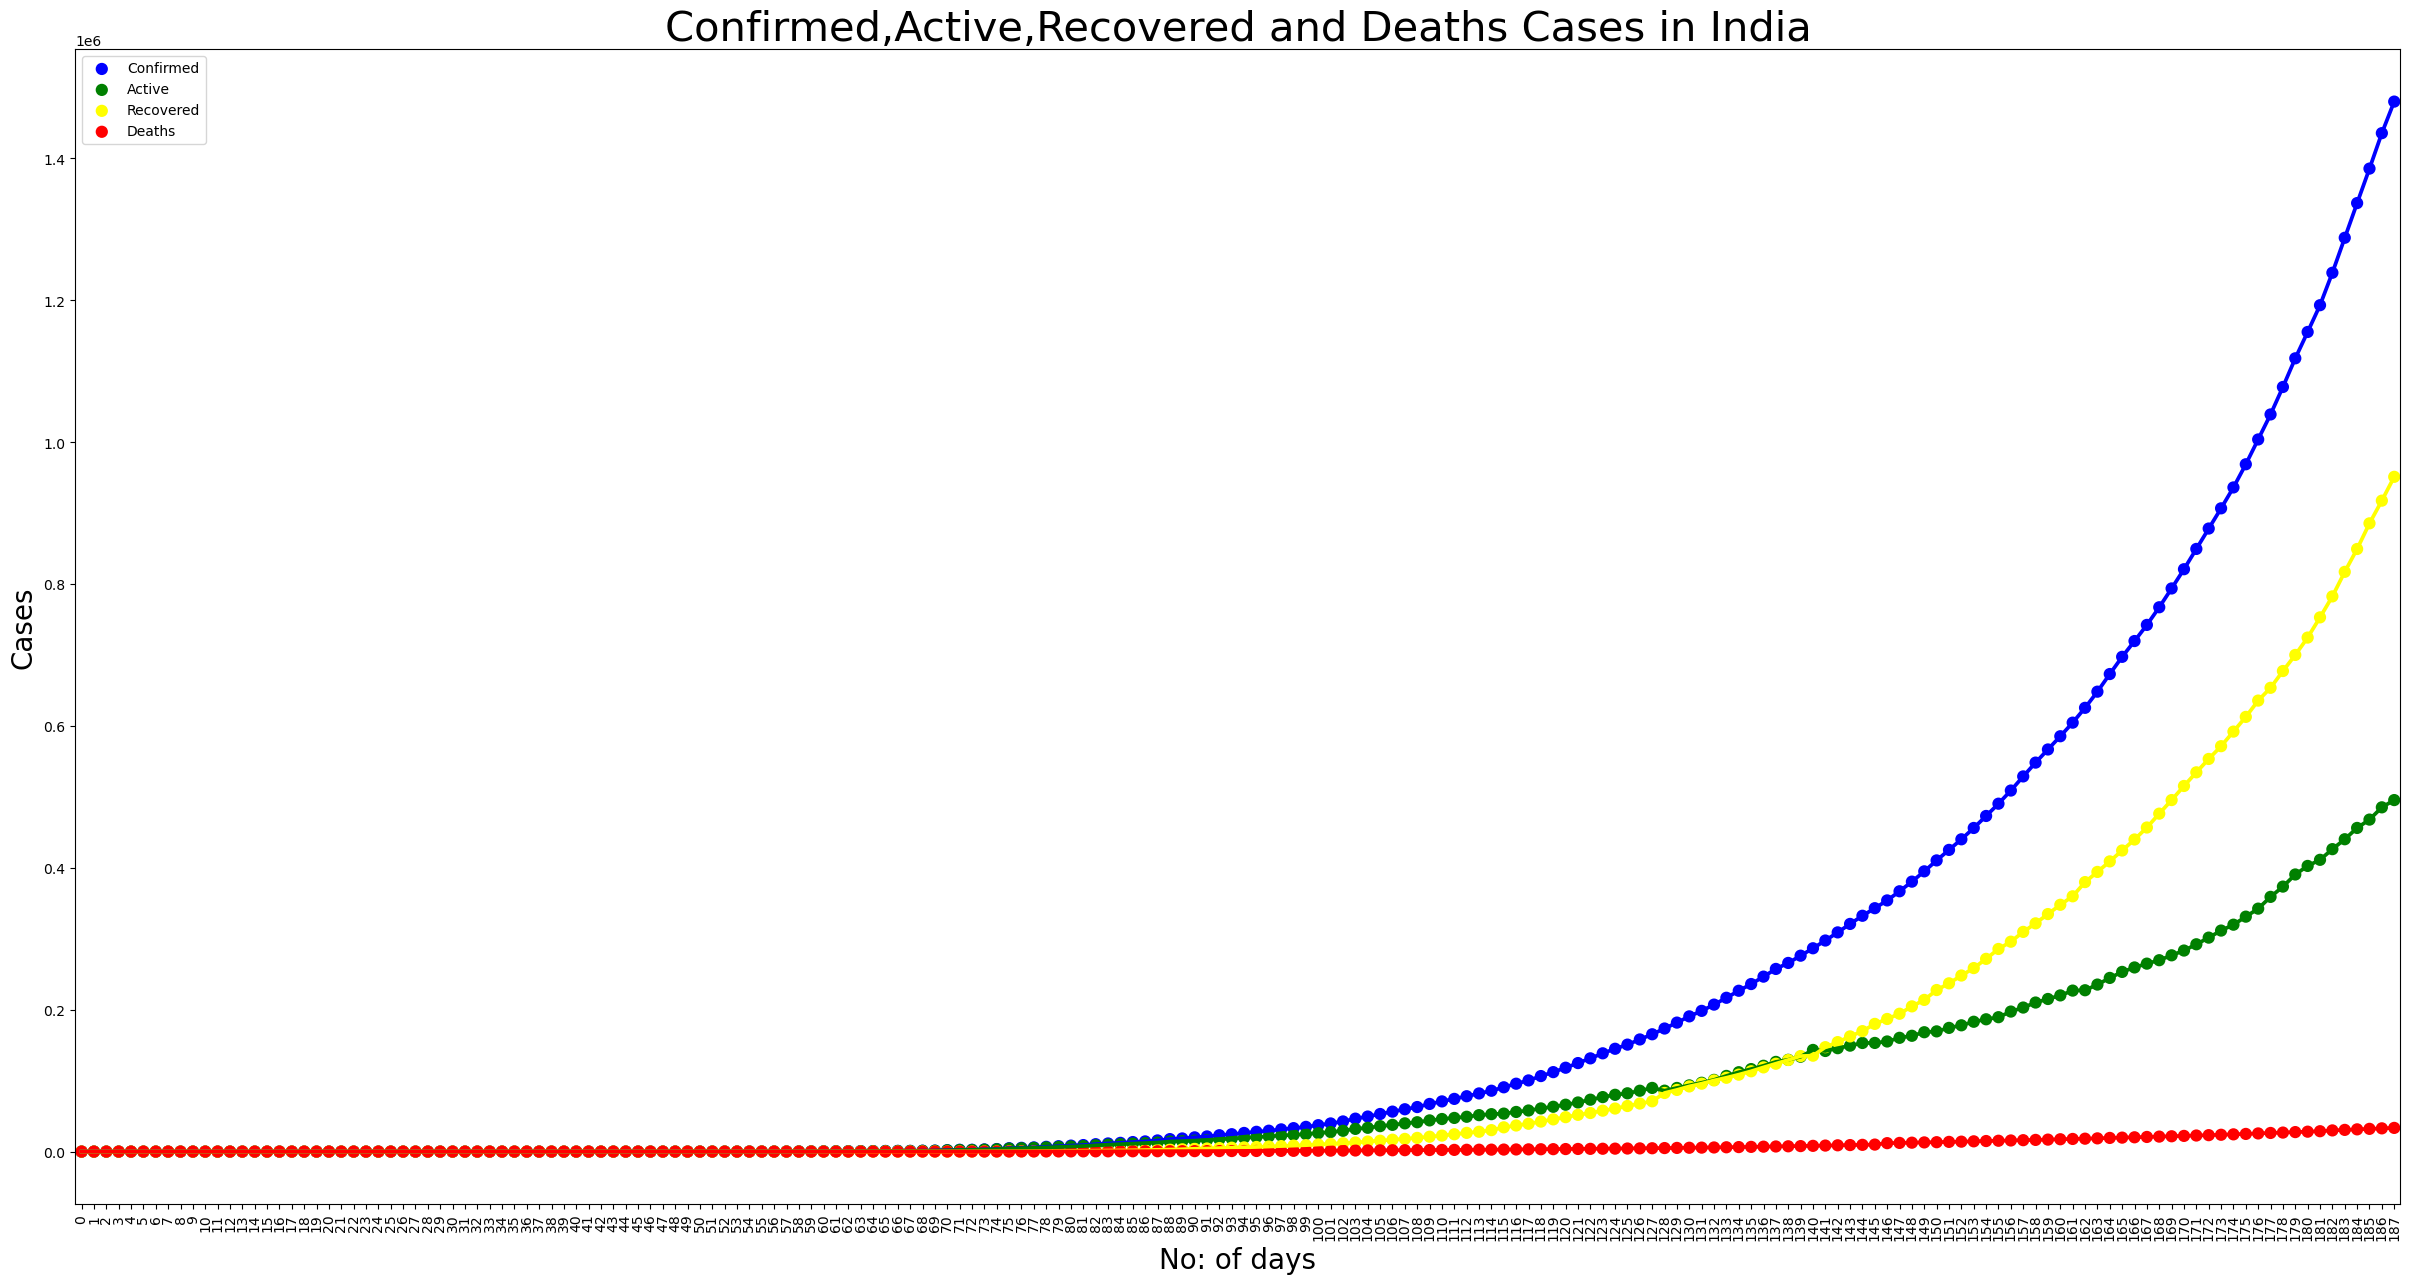

In [62]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=India,x=India.index,y='Confirmed',color='Blue',label='Confirmed')
sns.pointplot(data=India,x=India.index,y='Active',color='Green',label='Active')
sns.pointplot(data=India,x=India.index,y='Recovered',color='Yellow',label='Recovered')
sns.pointplot(data=India,x=India.index,y='Deaths',color='Red',label='Deaths')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.title("Confirmed,Active,Recovered and Deaths Cases in India",fontsize=30)
plt.legend()
plt.show()

In [63]:
#Spain - (Total number of 'Confirmed','Active','Recovered','Deaths' cases)
Spain=df[df.Country=='Spain']
Spain = Spain.groupby(by='Date')[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
Spain

Date  Confirmed  Active  Recovered  Deaths
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     270166   91361     150376   28429
184  2020-07-24     272421   93613     150376   28432
185  2020-07-25     272421   93613     150376   28432
186  2020-07-26     272421   93613     150376   28432
187  2020-07-27     272421   93613     150376   28432

[188 rows x 5 columns]

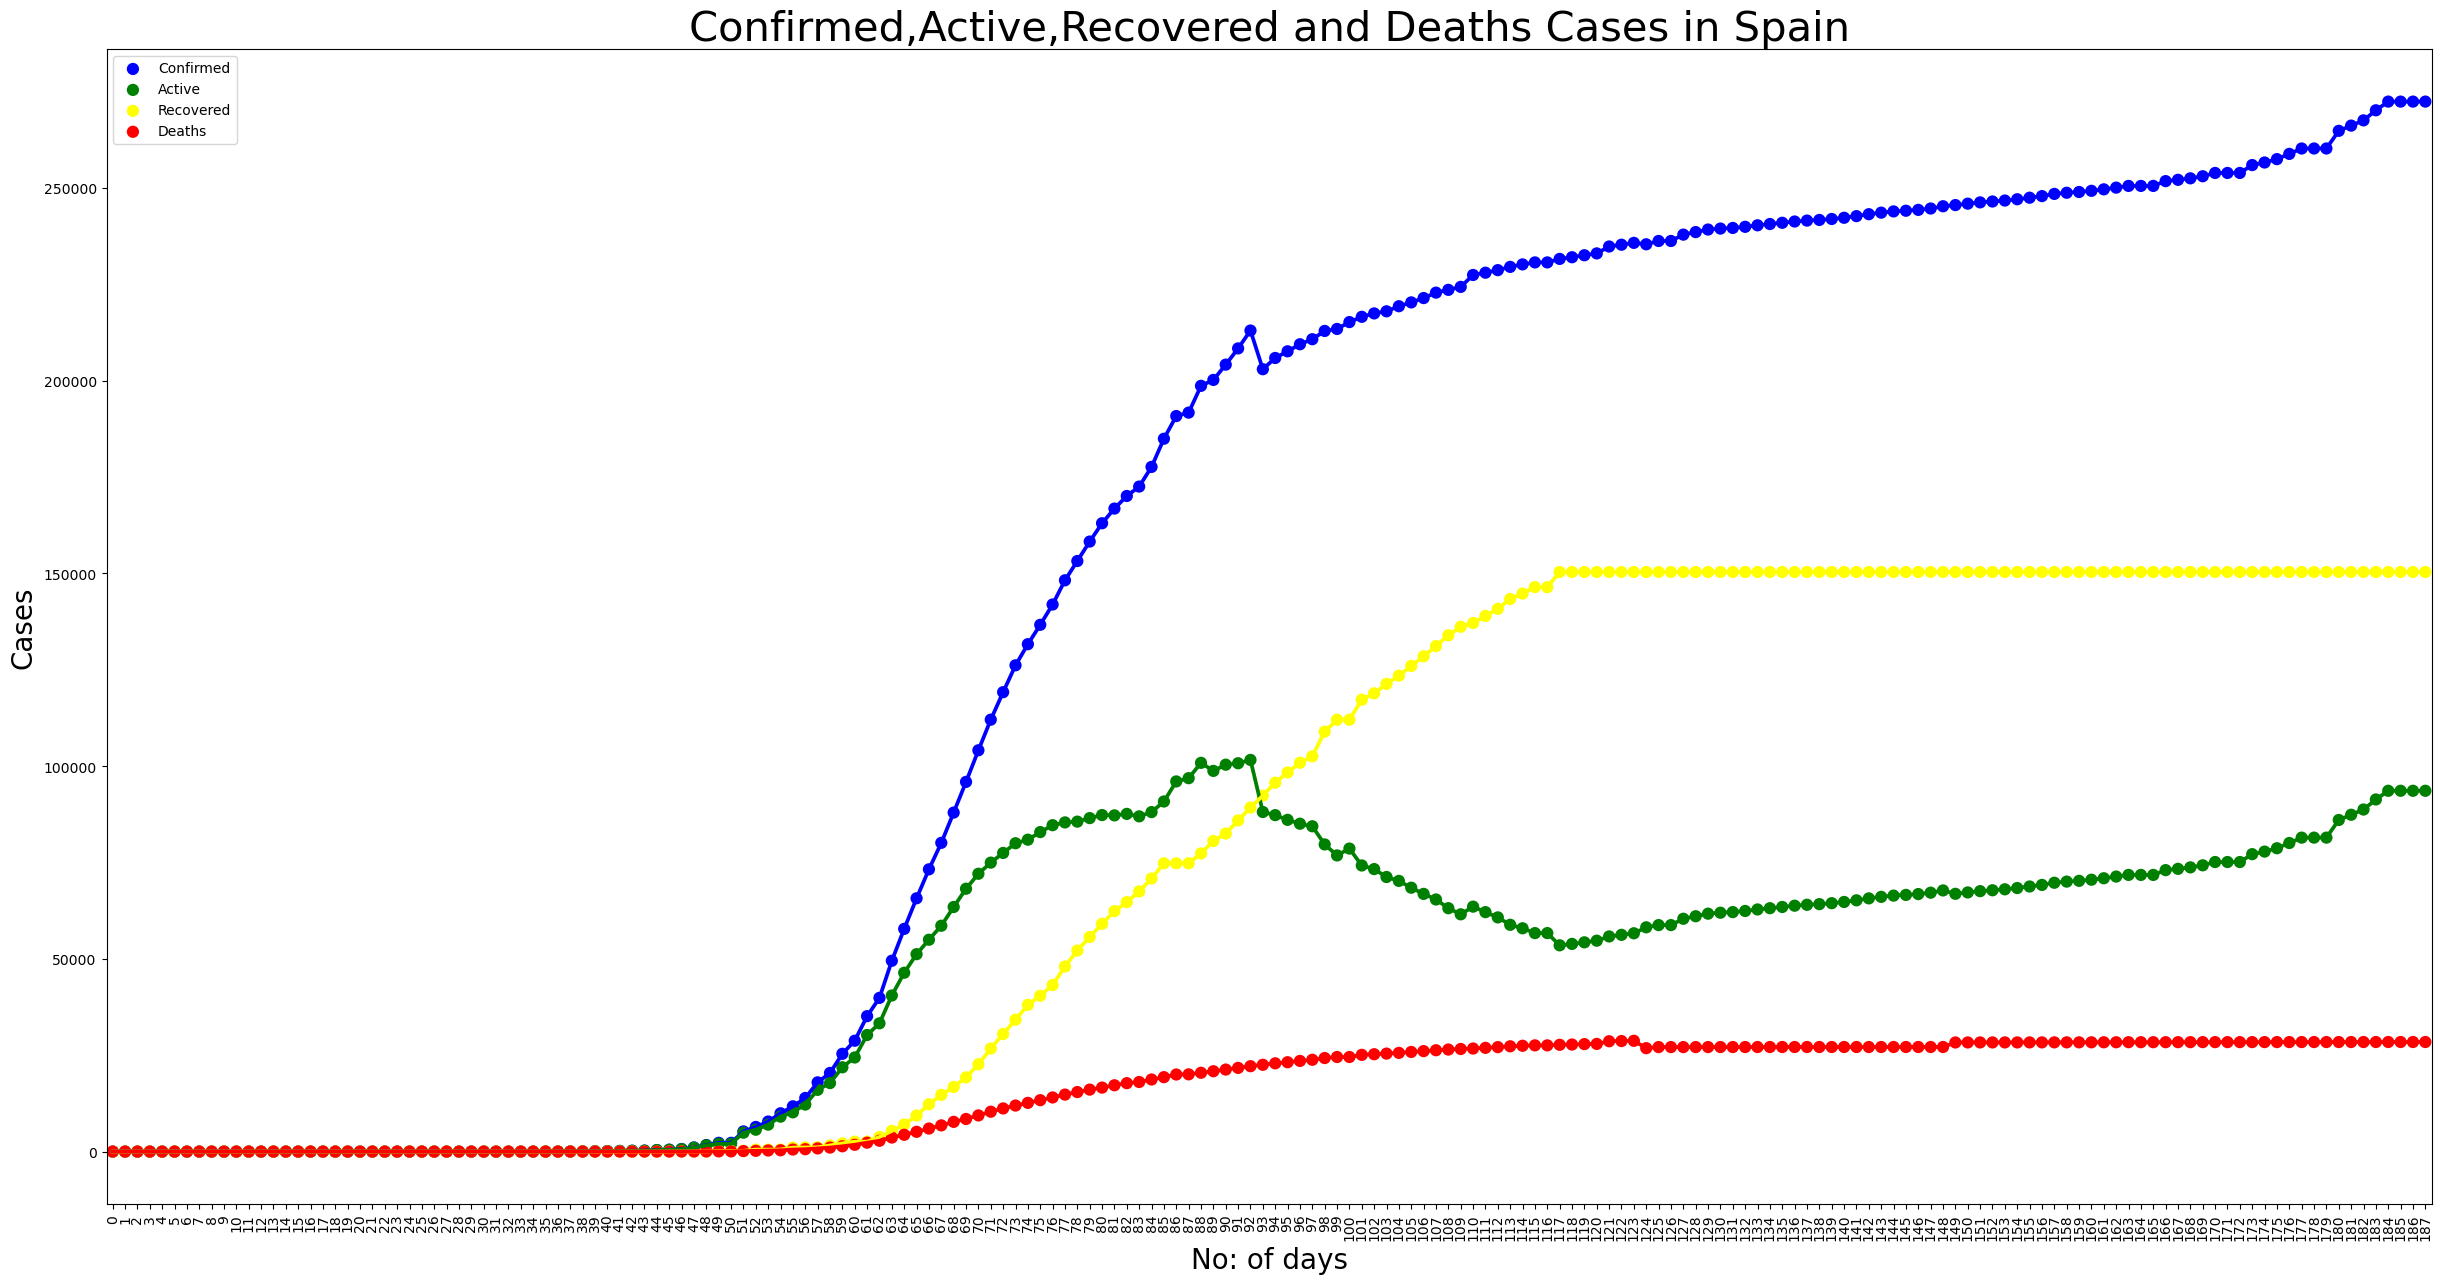

In [64]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=Spain,x=Spain.index,y='Confirmed',color='Blue',label='Confirmed')
sns.pointplot(data=Spain,x=Spain.index,y='Active',color='Green',label='Active')
sns.pointplot(data=Spain,x=Spain.index,y='Recovered',color='Yellow',label='Recovered')
sns.pointplot(data=Spain,x=Spain.index,y='Deaths',color='Red',label='Deaths')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.title("Confirmed,Active,Recovered and Deaths Cases in Spain",fontsize=30)
plt.legend()
plt.show()

Top 5 countries having most number of Confirmed cases.

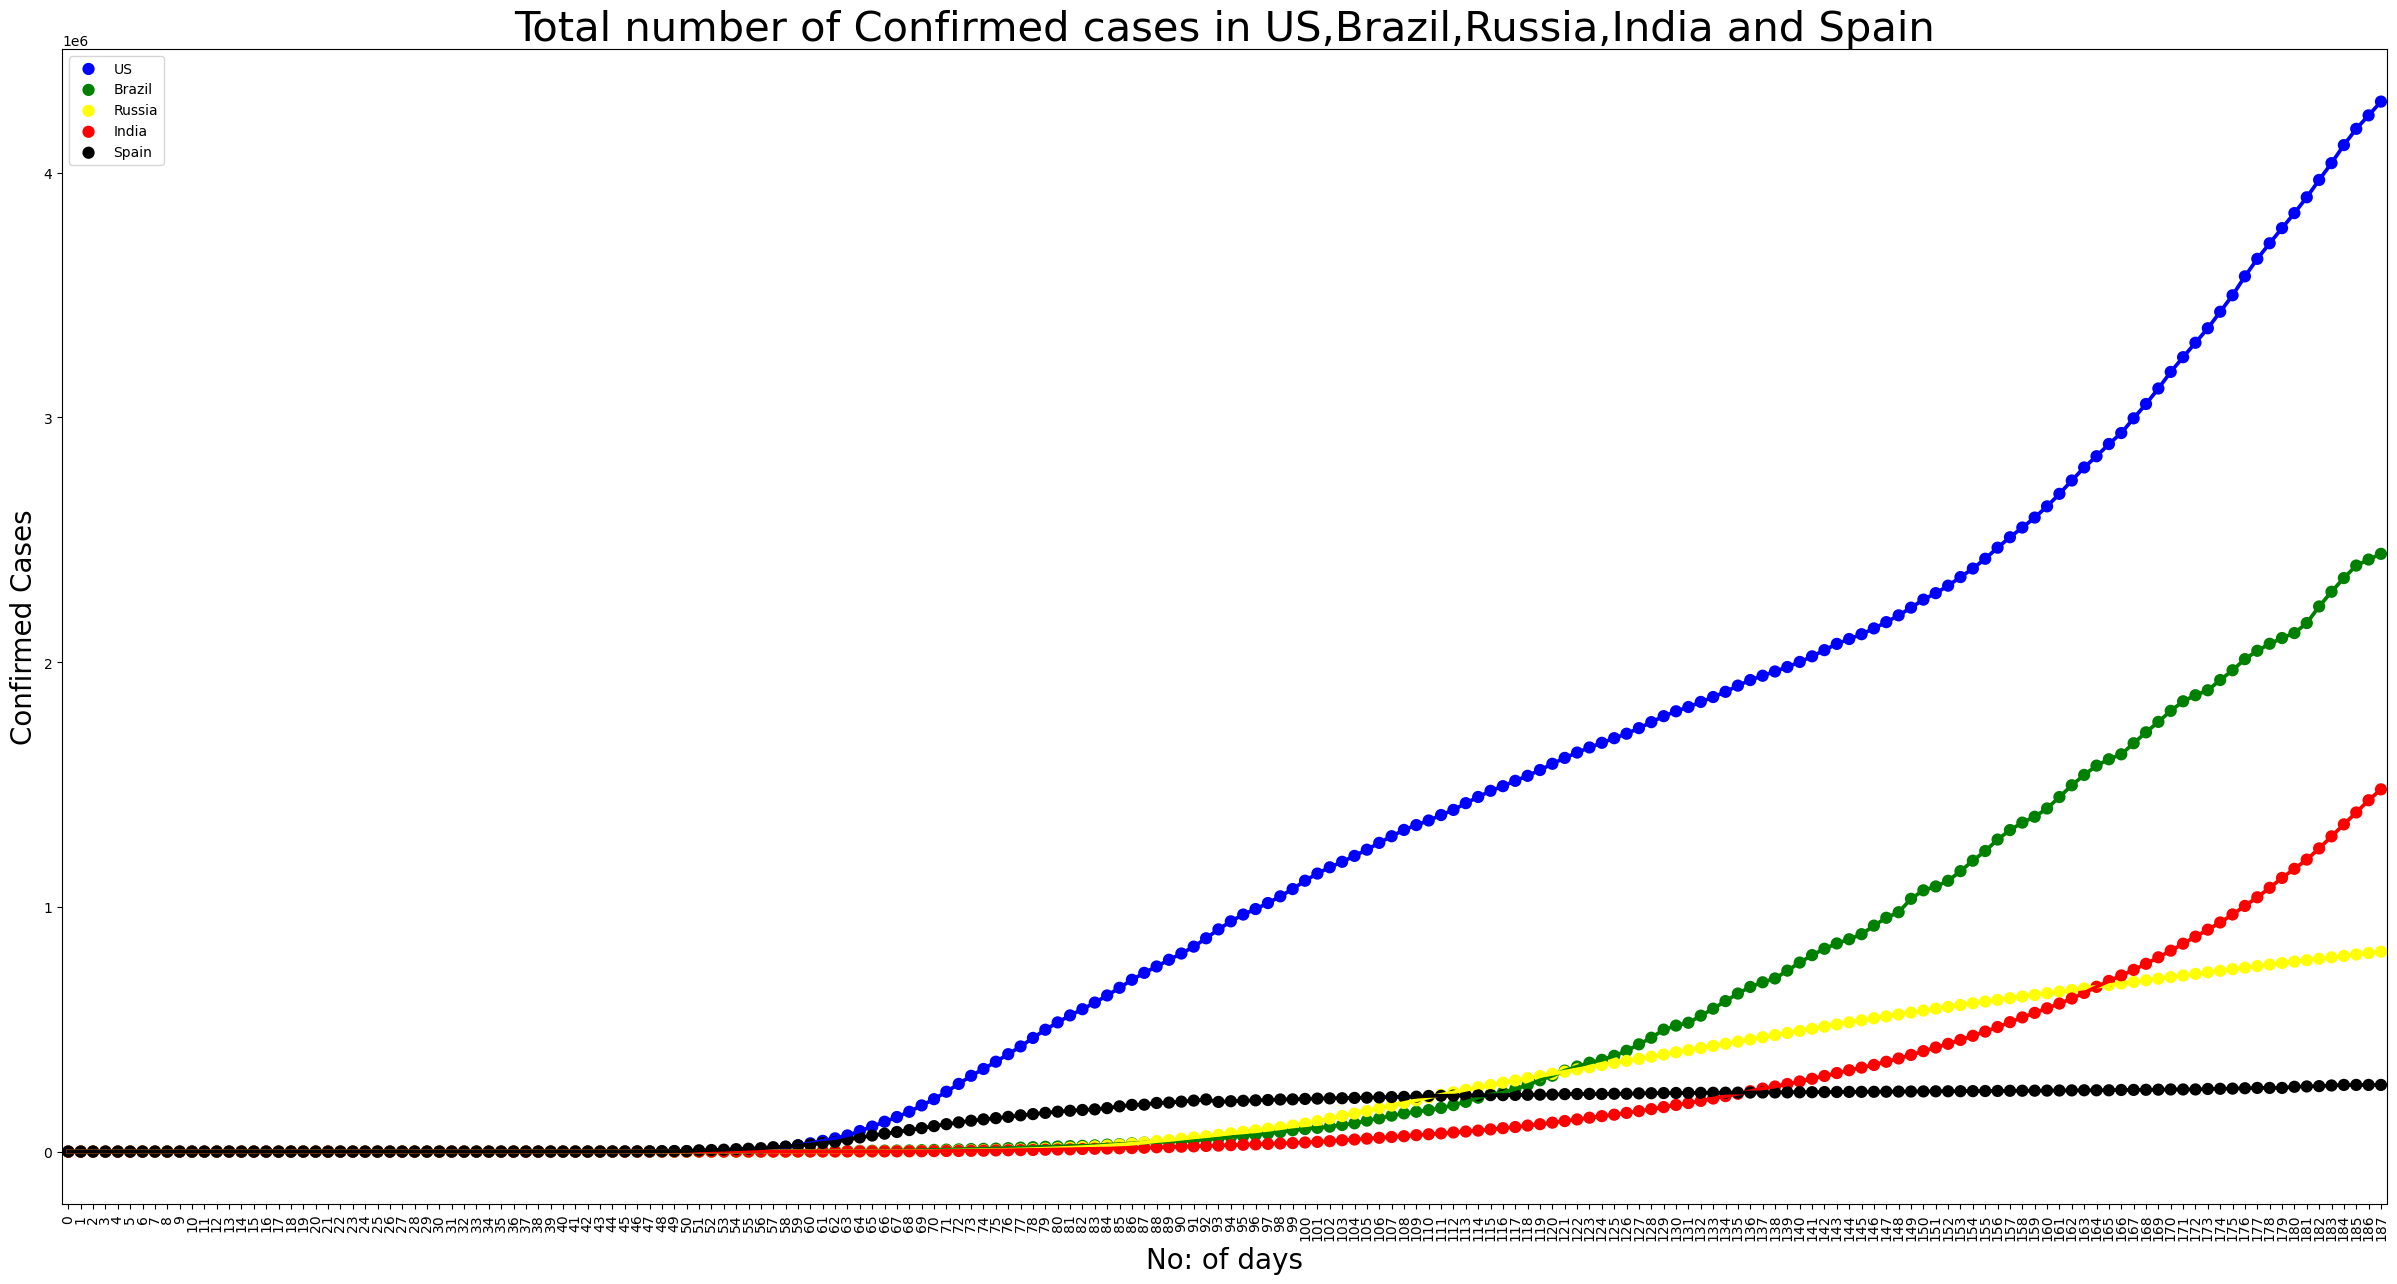

In [65]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=US,x=US.index,y='Confirmed',color='Blue',label='US')
sns.pointplot(data=Brazil,x=Brazil.index,y='Confirmed',color='Green',label='Brazil')
sns.pointplot(data=Russia,x=Russia.index,y='Confirmed',color='Yellow',label='Russia')
sns.pointplot(data=India,x=India.index,y='Confirmed',color='Red',label='India')
sns.pointplot(data=Spain,x=Spain.index,y='Confirmed',color='Black',label='Spain')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Confirmed Cases',fontsize=20)
plt.title("Total number of Confirmed cases in US,Brazil,Russia,India and Spain",fontsize=30)
plt.legend()
plt.show()

# Top 20 countries having most number of Active cases

In [66]:
top_active = df.groupby(by='Country')["Active"].sum().sort_values(ascending=False).head(20).reset_index()
top_active

Country     Active
0               US  156981121
1           Brazil   31094060
2   United Kingdom   22624595
3           Russia   19668578
4            India   15987913
5           France   10980287
6            Spain    9277432
7           Canada    8656985
8             Peru    7748957
9            Italy    7363518
10        Pakistan    5633262
11    South Africa    5150341
12      Bangladesh    4924394
13     Netherlands    4528235
14          Sweden    4524247
15          Turkey    4091900
16        Colombia    3832786
17    Saudi Arabia    3783704
18         Belgium    3689945
19           Chile    3320581

[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

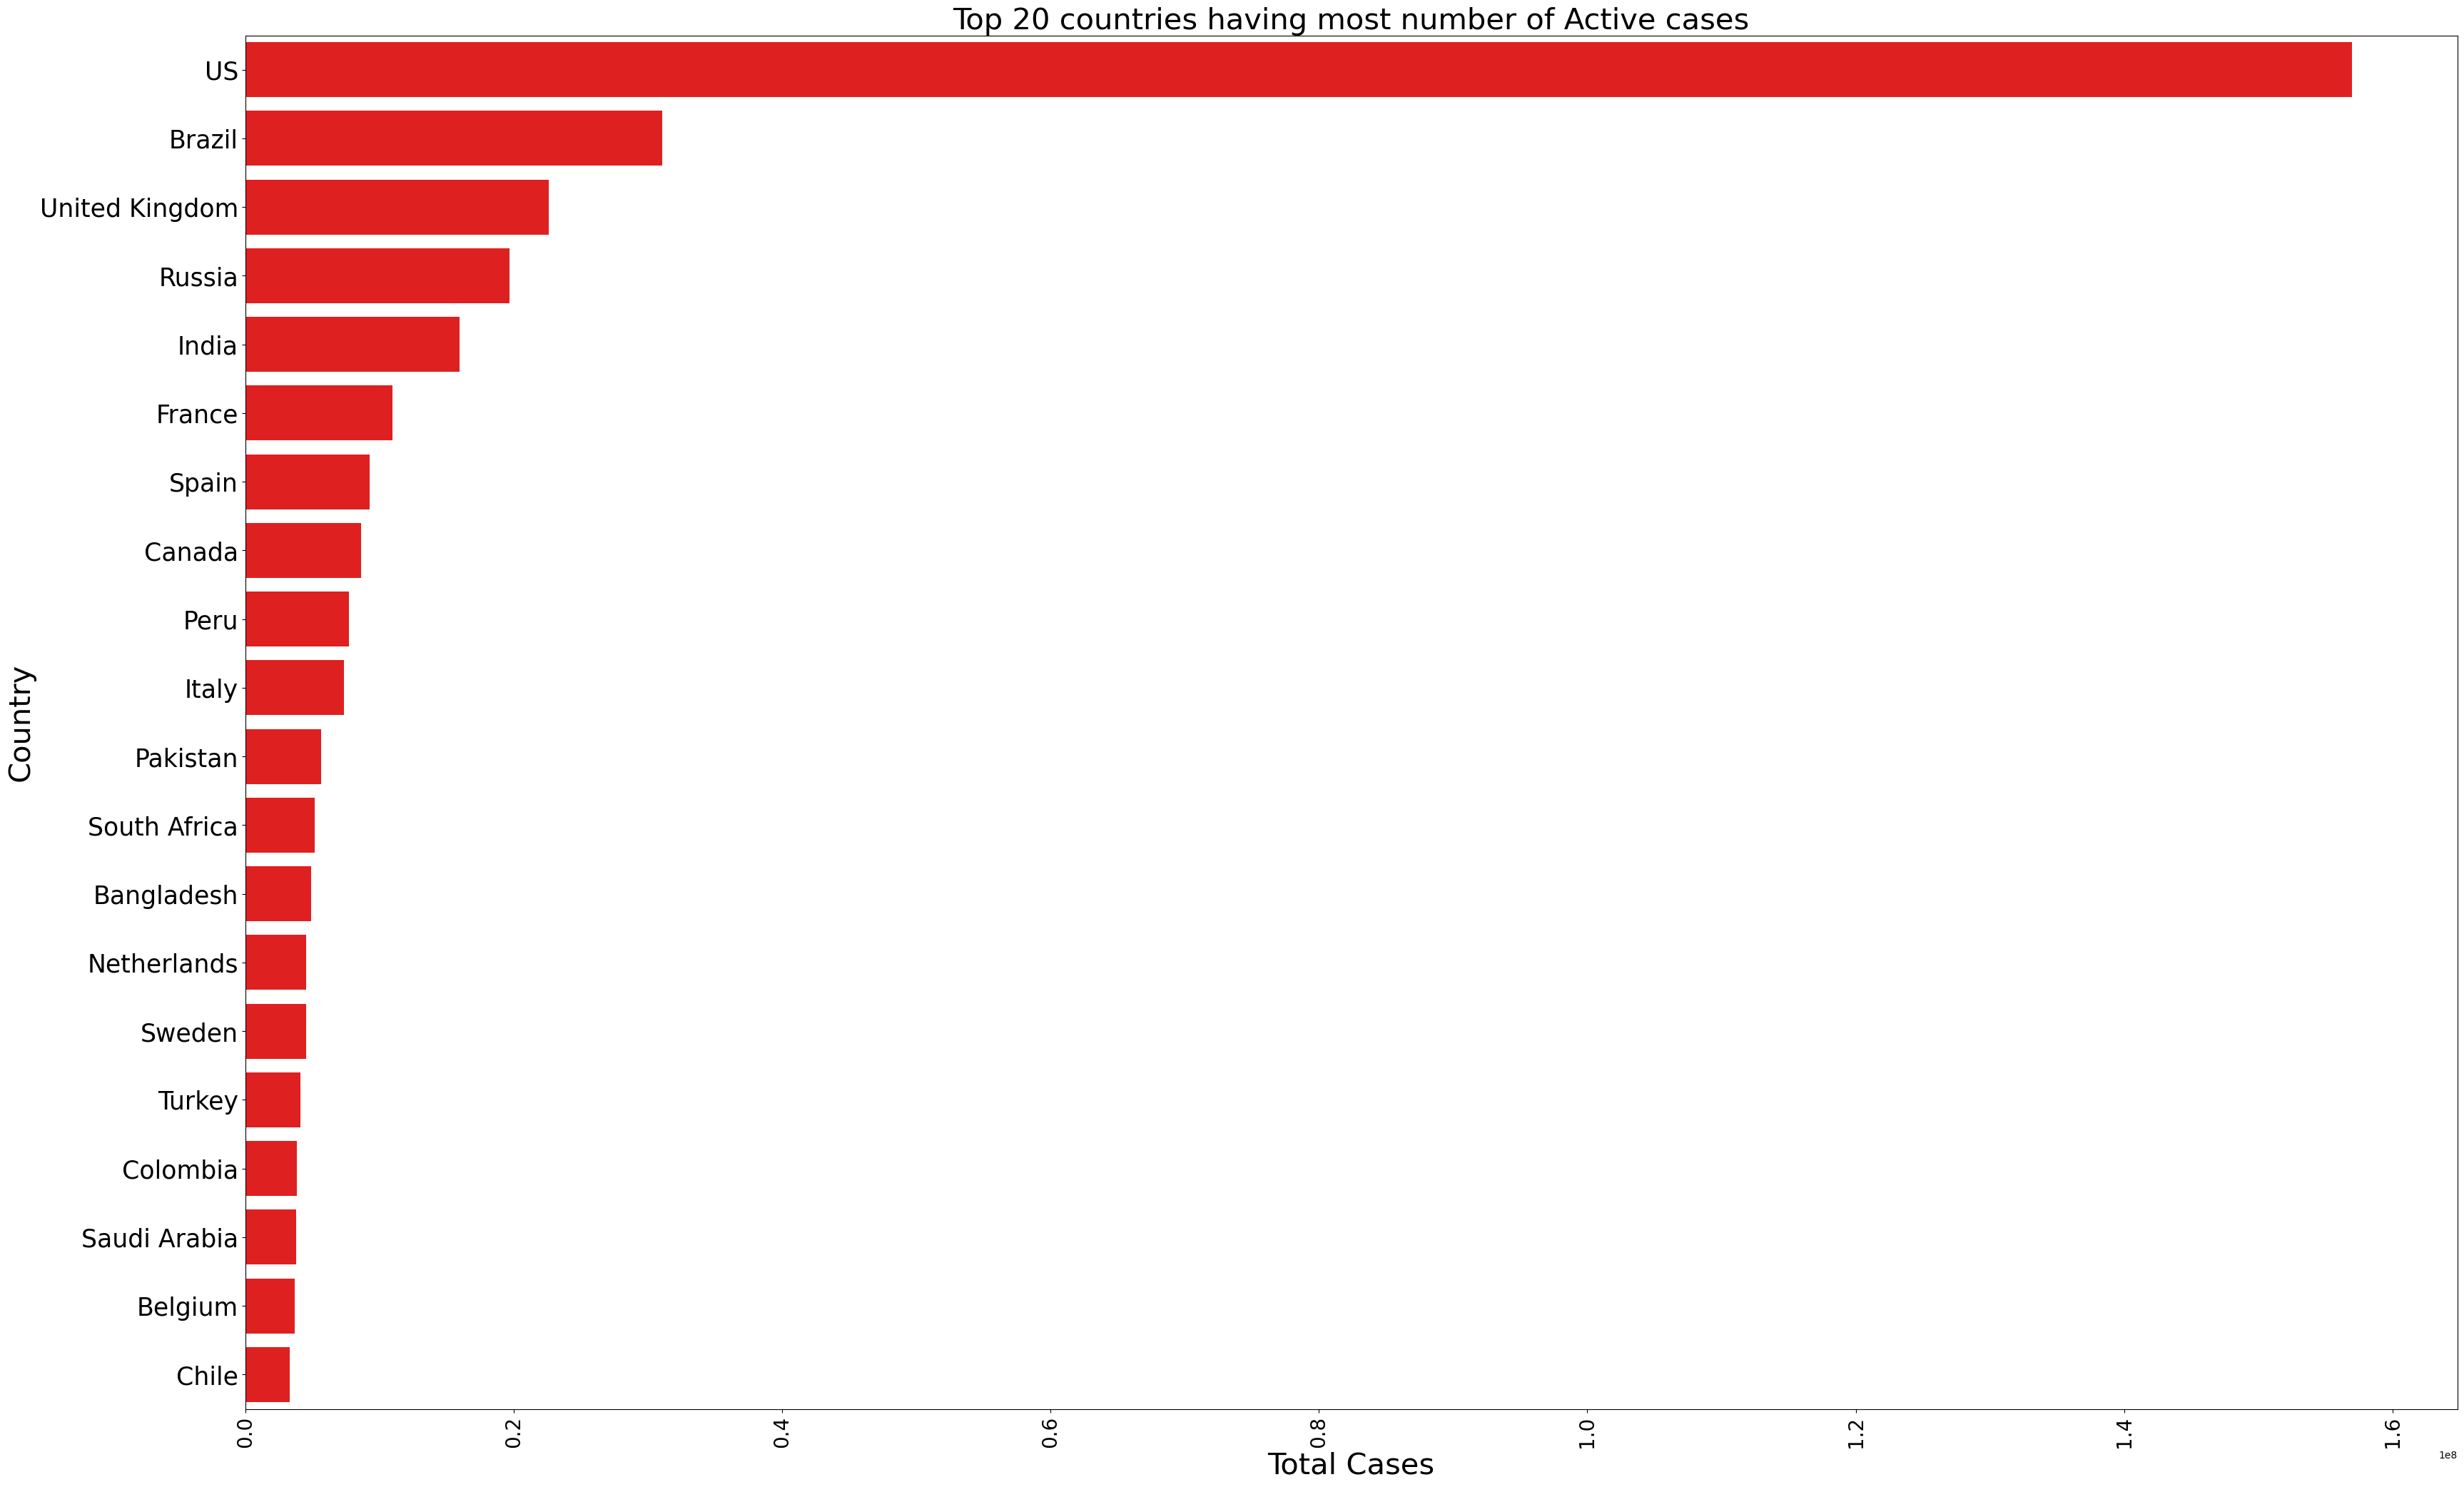

In [67]:
plt.figure(figsize=(40,25))
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=25)
plt.xlabel('Total Cases',fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title("Top 20 countries having most number of Active cases",fontsize=30)
ax = sns.barplot(x=top_active.Active,y=top_active.Country,color='r')
ax.set(xlabel='Total Cases',ylabel='Country')


In [69]:
#United Kingdom - (Total number of 'Confirmed','Active','Recovered','Deaths' cases)
UK=df[df.Country=='United Kingdom']
UK = UK.groupby(by='Date')[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
UK

Date  Confirmed  Active  Recovered  Deaths
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     298731  251667       1425   45639
184  2020-07-24     299500  252313       1425   45762
185  2020-07-25     300270  253020       1427   45823
186  2020-07-26     301020  253749       1434   45837
187  2020-07-27     301708  254427       1437   45844

[188 rows x 5 columns]

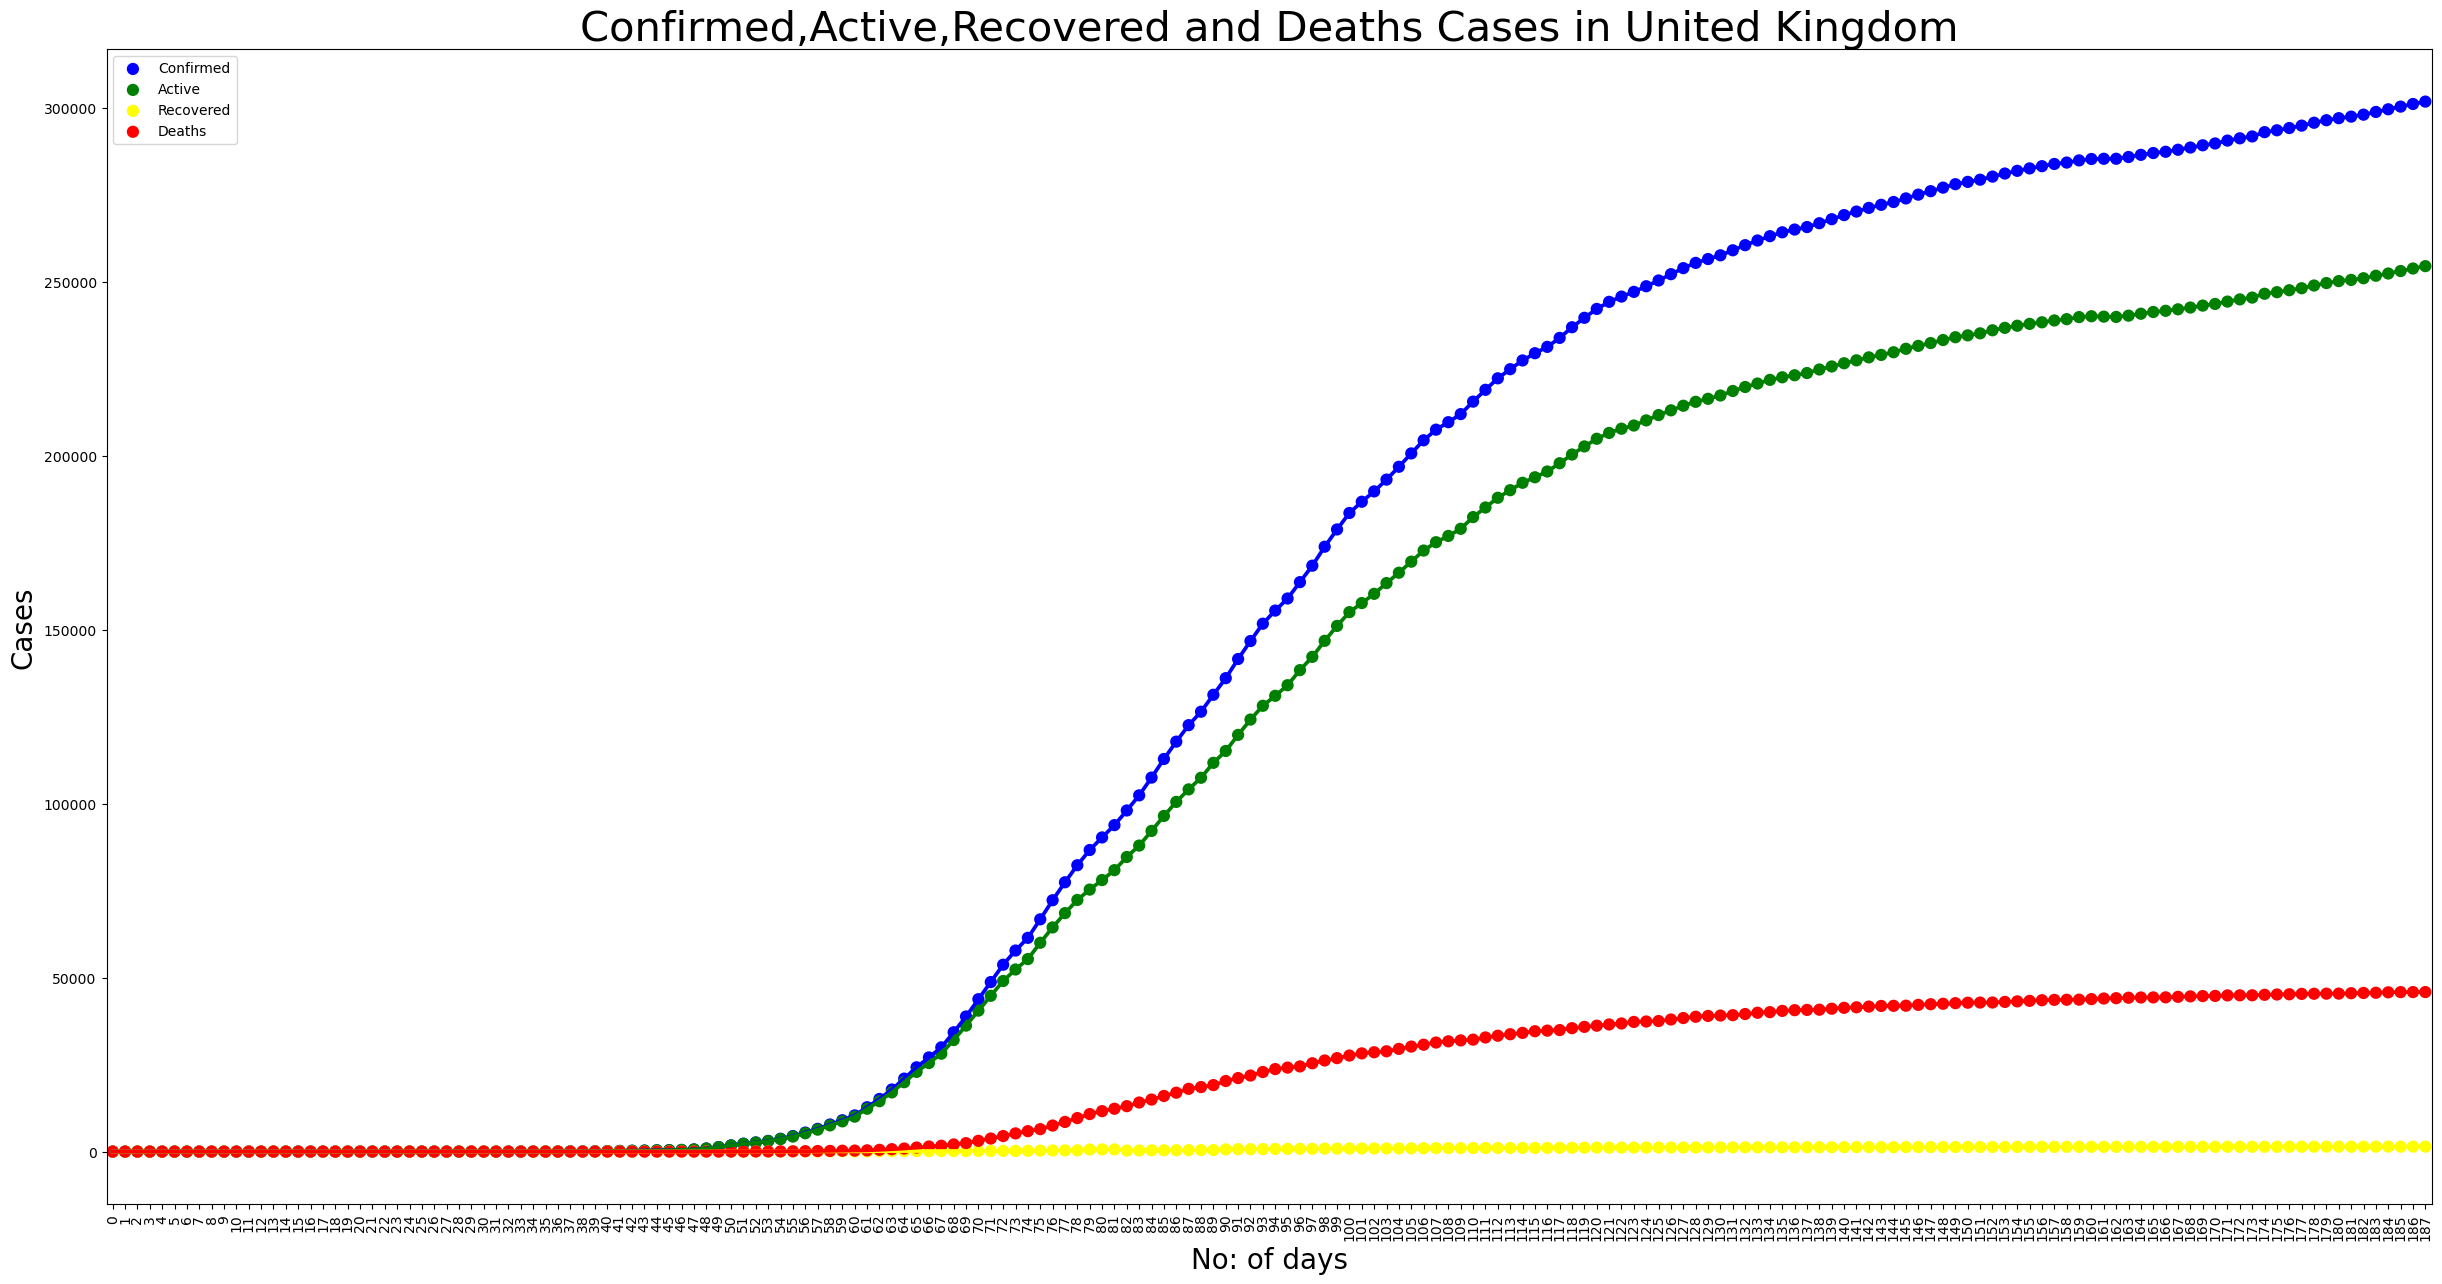

In [70]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=UK,x=UK.index,y='Confirmed',color='Blue',label='Confirmed')
sns.pointplot(data=UK,x=UK.index,y='Active',color='Green',label='Active')
sns.pointplot(data=UK,x=UK.index,y='Recovered',color='Yellow',label='Recovered')
sns.pointplot(data=UK,x=UK.index,y='Deaths',color='Red',label='Deaths')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.title("Confirmed,Active,Recovered and Deaths Cases in United Kingdom",fontsize=30)
plt.legend()
plt.show()

Top 5 countries having most number Active cases.

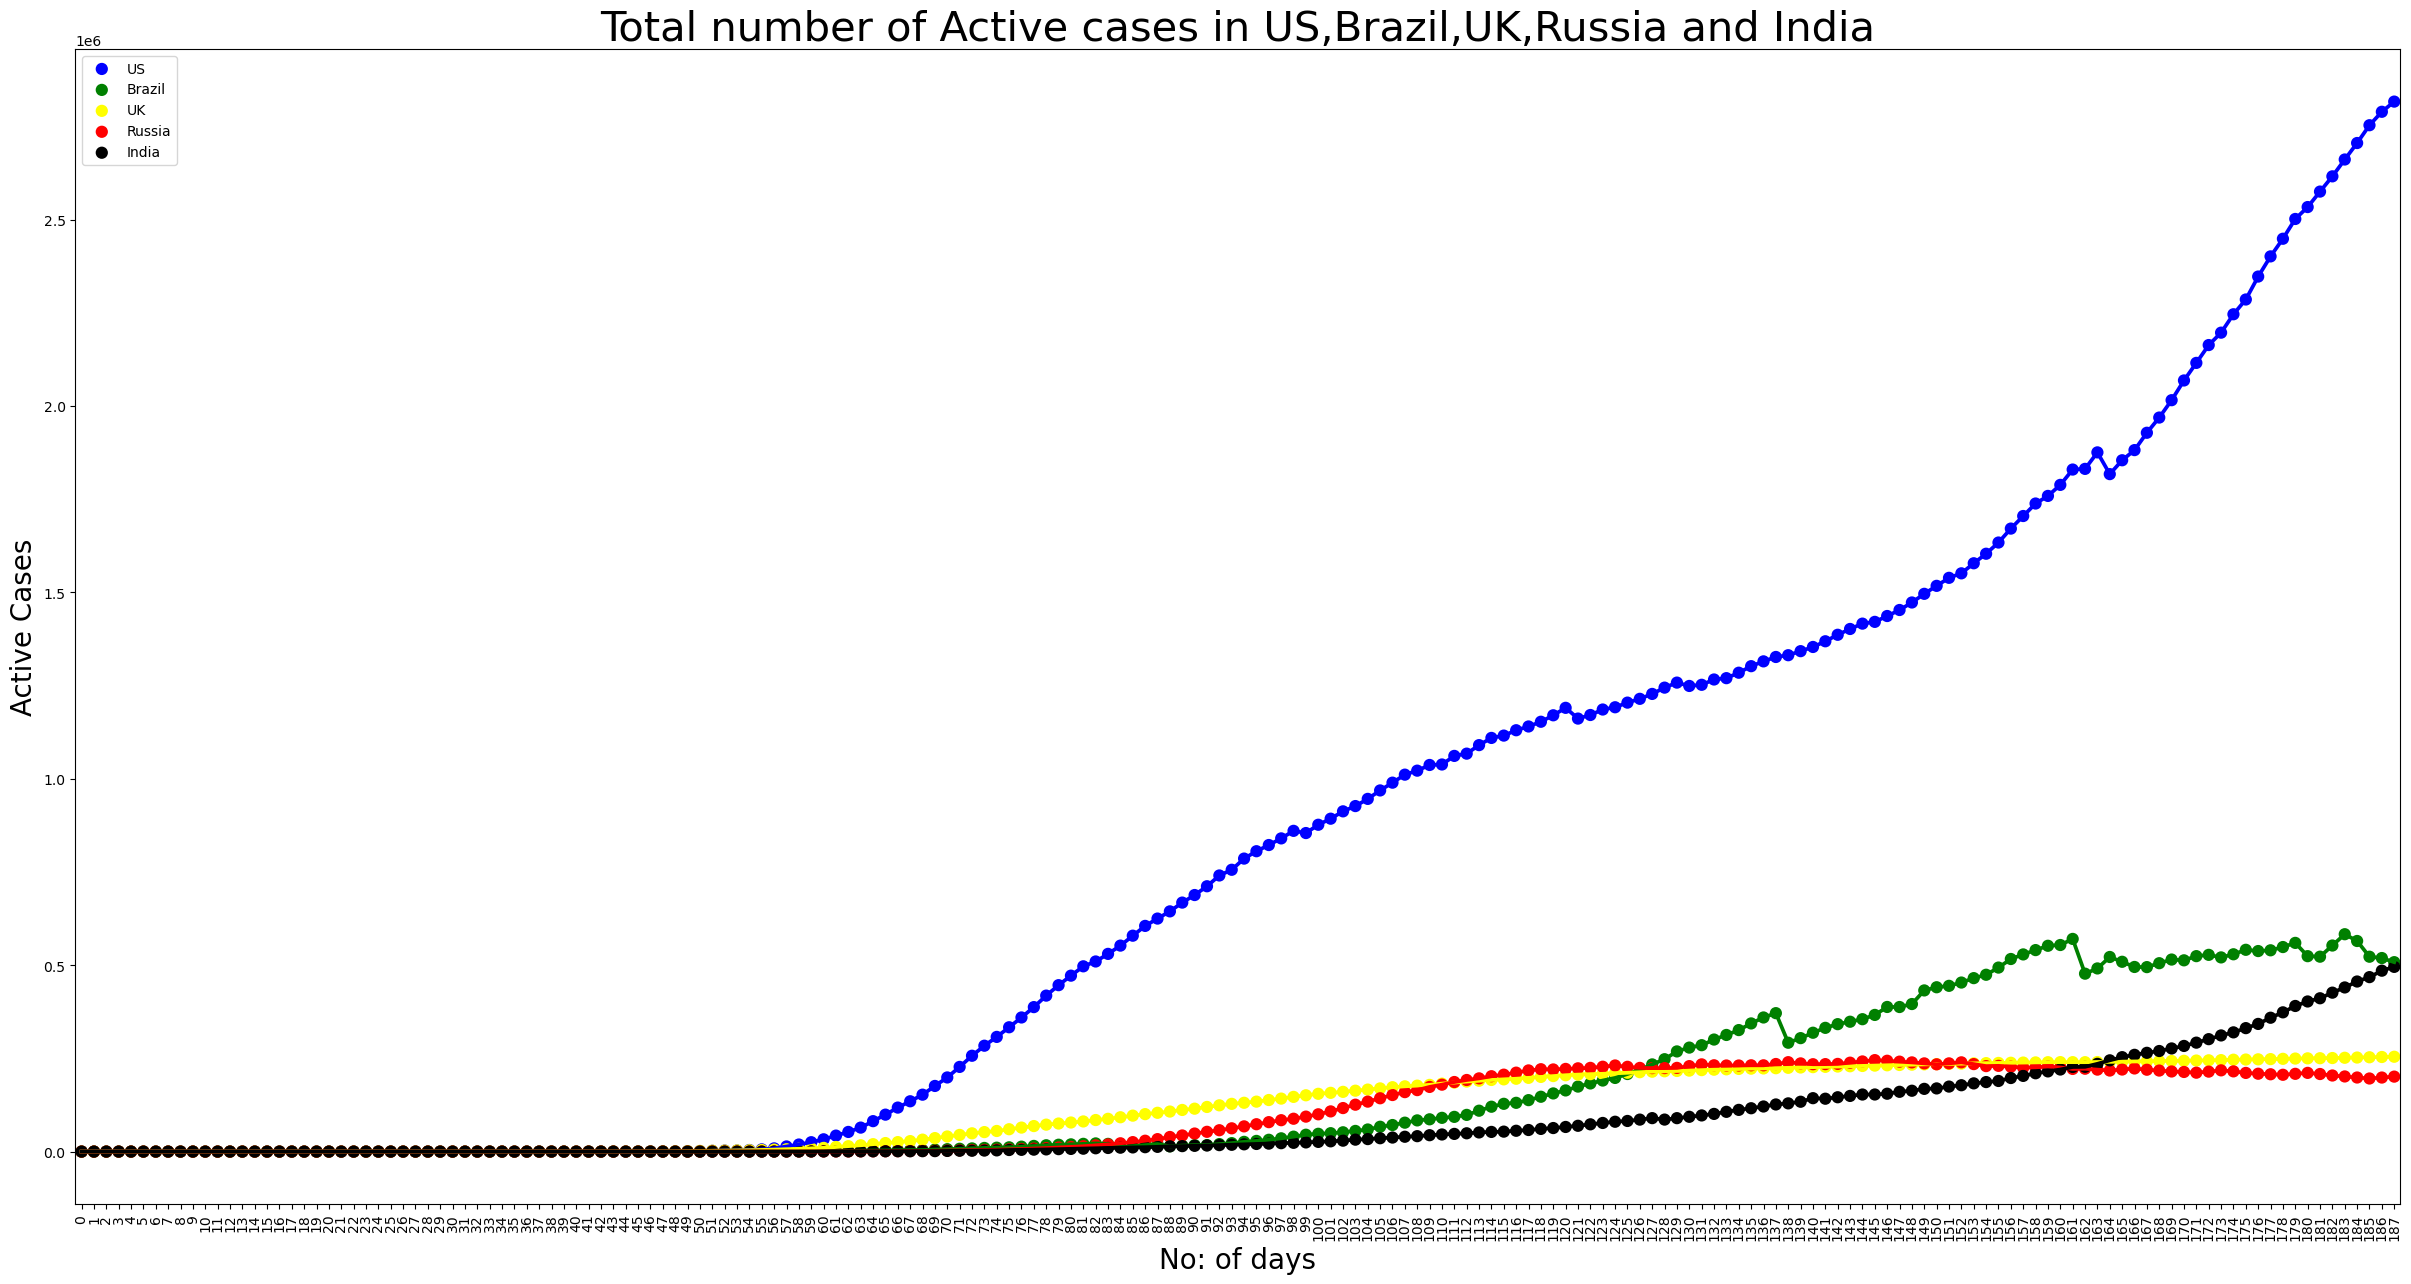

In [71]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=US,x=US.index,y='Active',color='Blue',label='US')
sns.pointplot(data=Brazil,x=Brazil.index,y='Active',color='Green',label='Brazil')
sns.pointplot(data=UK,x=UK.index,y='Active',color='Yellow',label='UK')
sns.pointplot(data=Russia,x=Russia.index,y='Active',color='Red',label='Russia')
sns.pointplot(data=India,x=India.index,y='Active',color='Black',label='India')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Active Cases',fontsize=20)
plt.title("Total number of Active cases in US,Brazil,UK,Russia and India",fontsize=30)
plt.legend()
plt.show()

# Top 20 countries having most number of Recovered cases

In [72]:
top_recovered = df.groupby(by='Country')["Recovered"].sum().sort_values(ascending=False).head(20).reset_index()
top_recovered

Country  Recovered
0             US   56353416
1         Brazil   54492873
2         Russia   25120448
3          India   23783720
4        Germany   17107839
5          Italy   15673910
6           Iran   15200895
7          Spain   15093583
8         Turkey   13345389
9          Chile   13292593
10         China   11466866
11        Mexico   11141225
12          Peru   10862846
13  Saudi Arabia    8474107
14        France    7182115
15      Pakistan    6936003
16  South Africa    5836423
17         Qatar    4676443
18    Bangladesh    3714702
19   Switzerland    2957883

[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

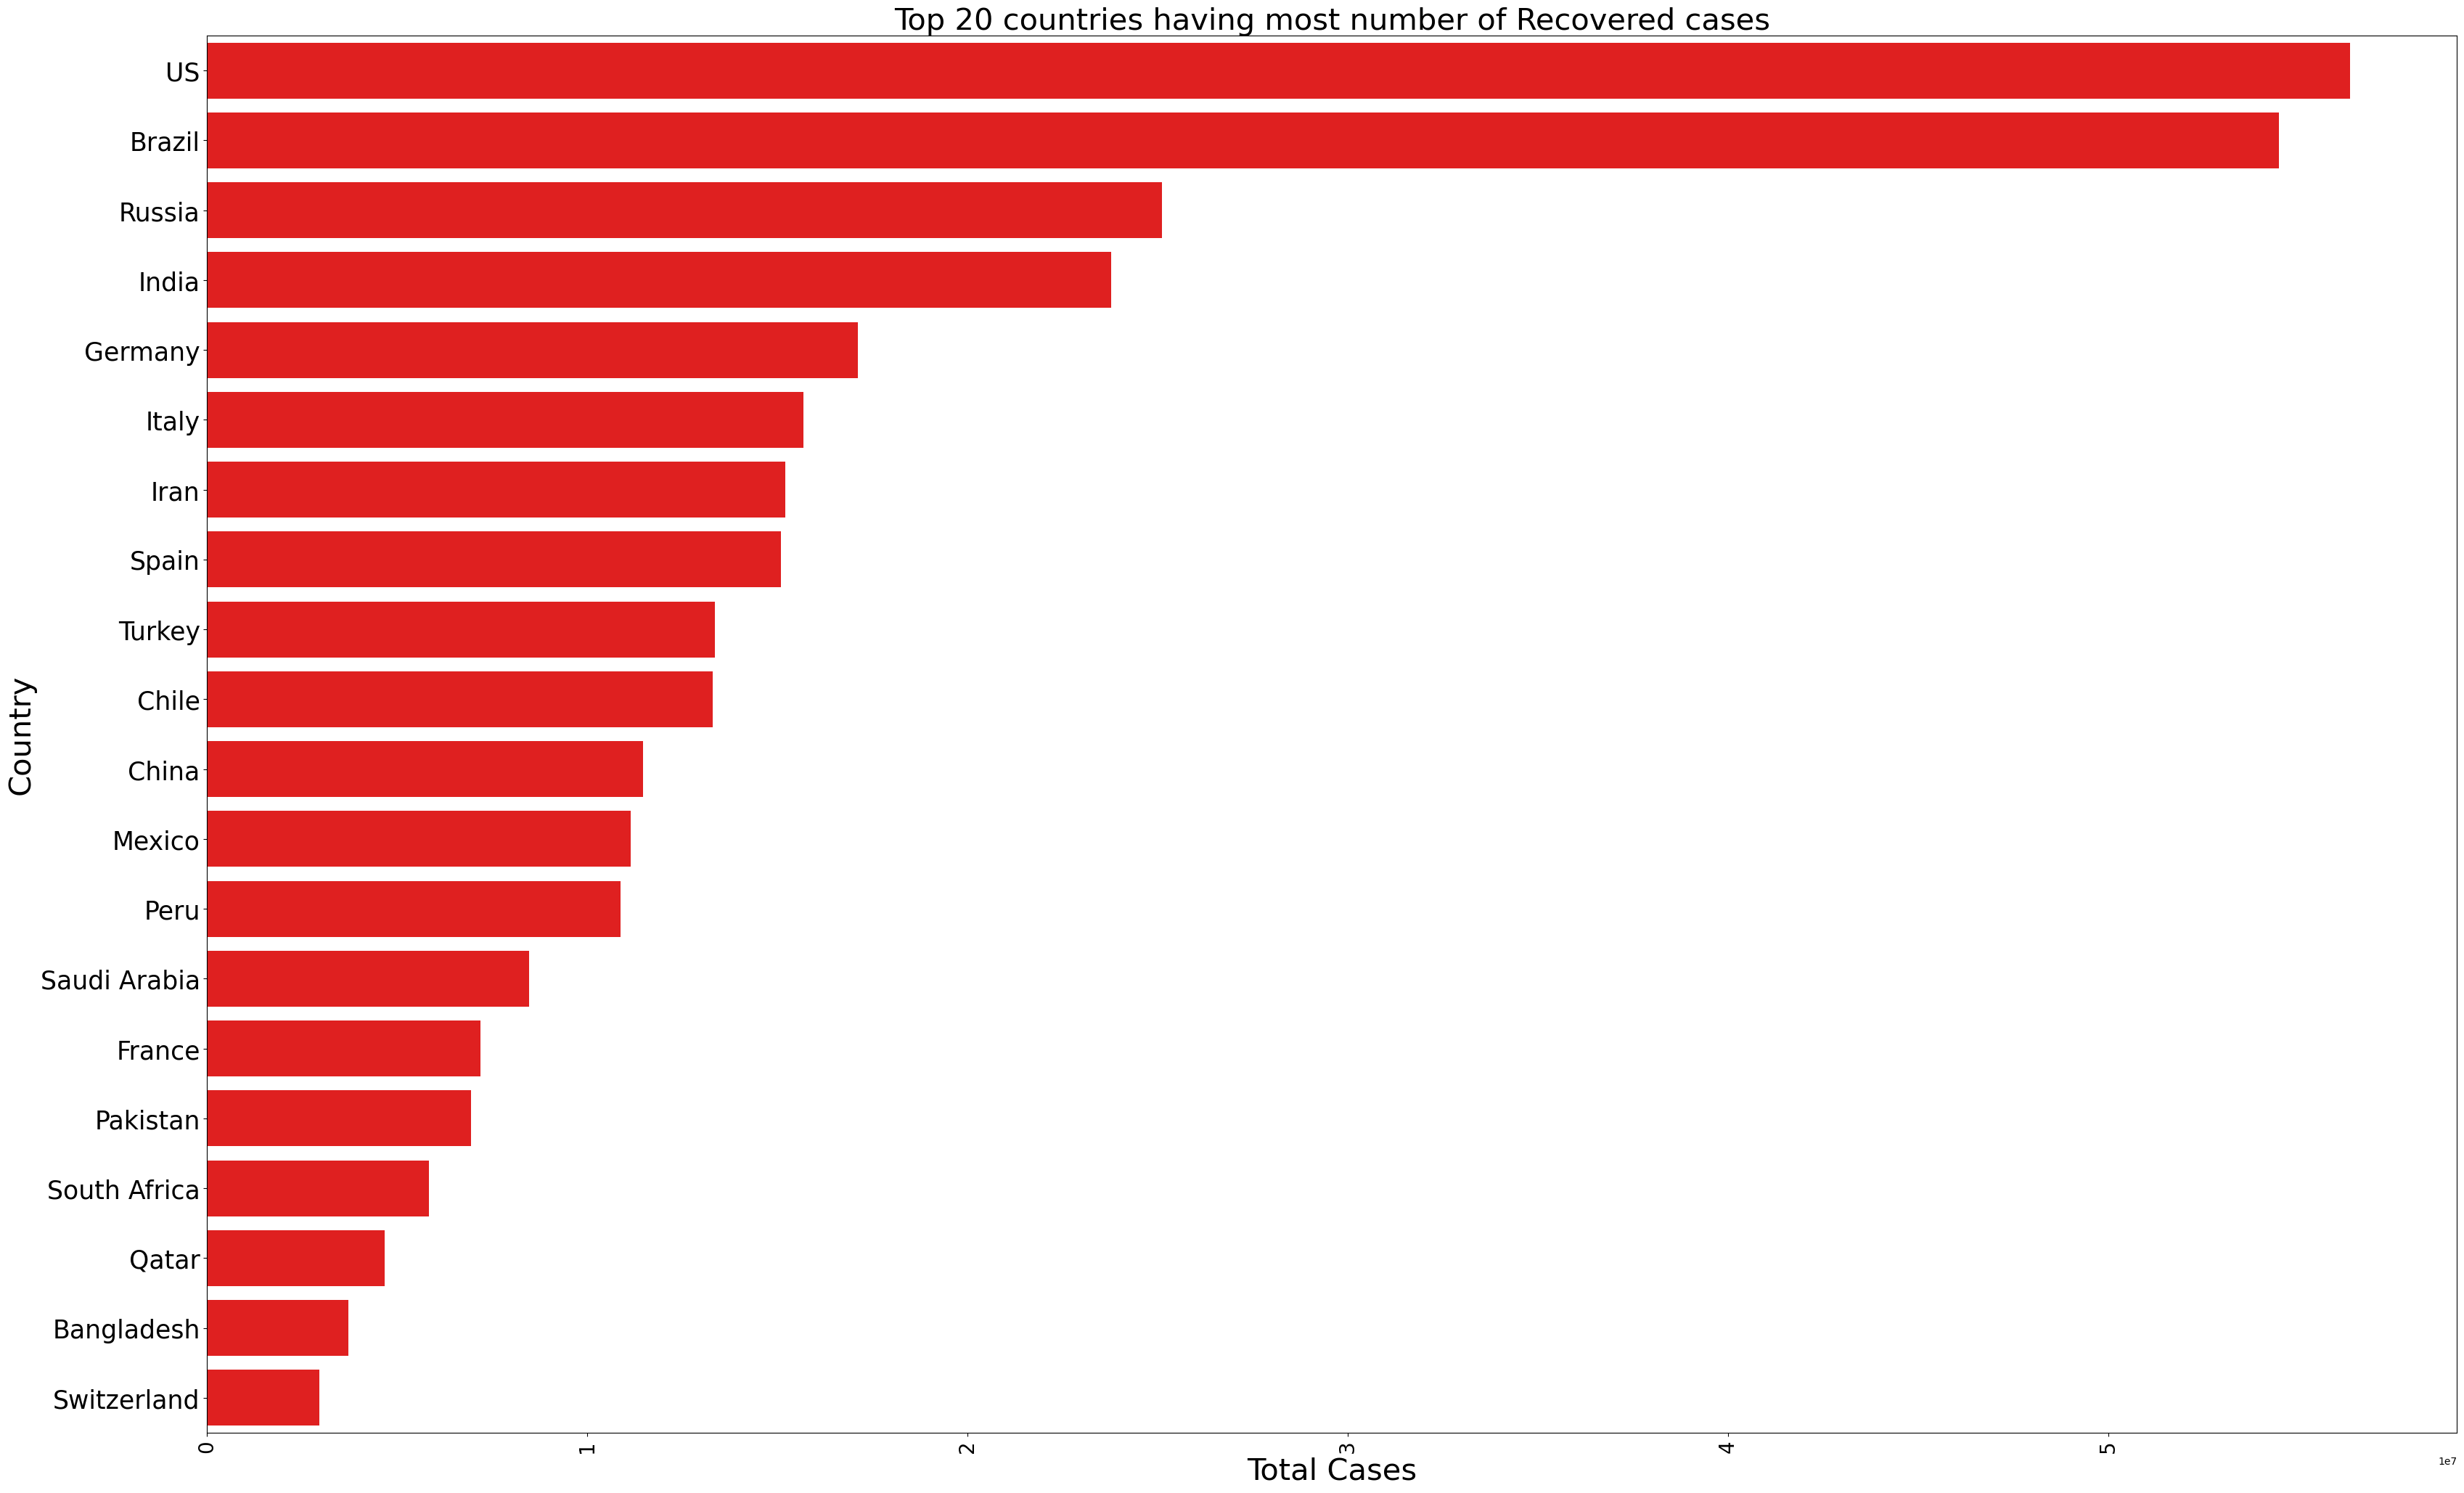

In [73]:
plt.figure(figsize=(40,25))
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=25)
plt.xlabel('Total Cases',fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title("Top 20 countries having most number of Recovered cases",fontsize=30)
ax = sns.barplot(x=top_recovered.Recovered,y=top_recovered.Country,color='r')
ax.set(xlabel='Total Cases',ylabel='Country')


In [74]:
#Germany - (Total number of 'Confirmed','Active','Recovered','Deaths' cases)
Germany=df[df.Country=='Germany']
Germany = Germany.groupby(by='Date')[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
Germany

Date  Confirmed  Active  Recovered  Deaths
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     204881    6631     189140    9110
184  2020-07-24     205623    6807     189696    9120
185  2020-07-25     206278    7235     189919    9124
186  2020-07-26     206667    7488     190055    9124
187  2020-07-27     207112    7673     190314    9125

[188 rows x 5 columns]

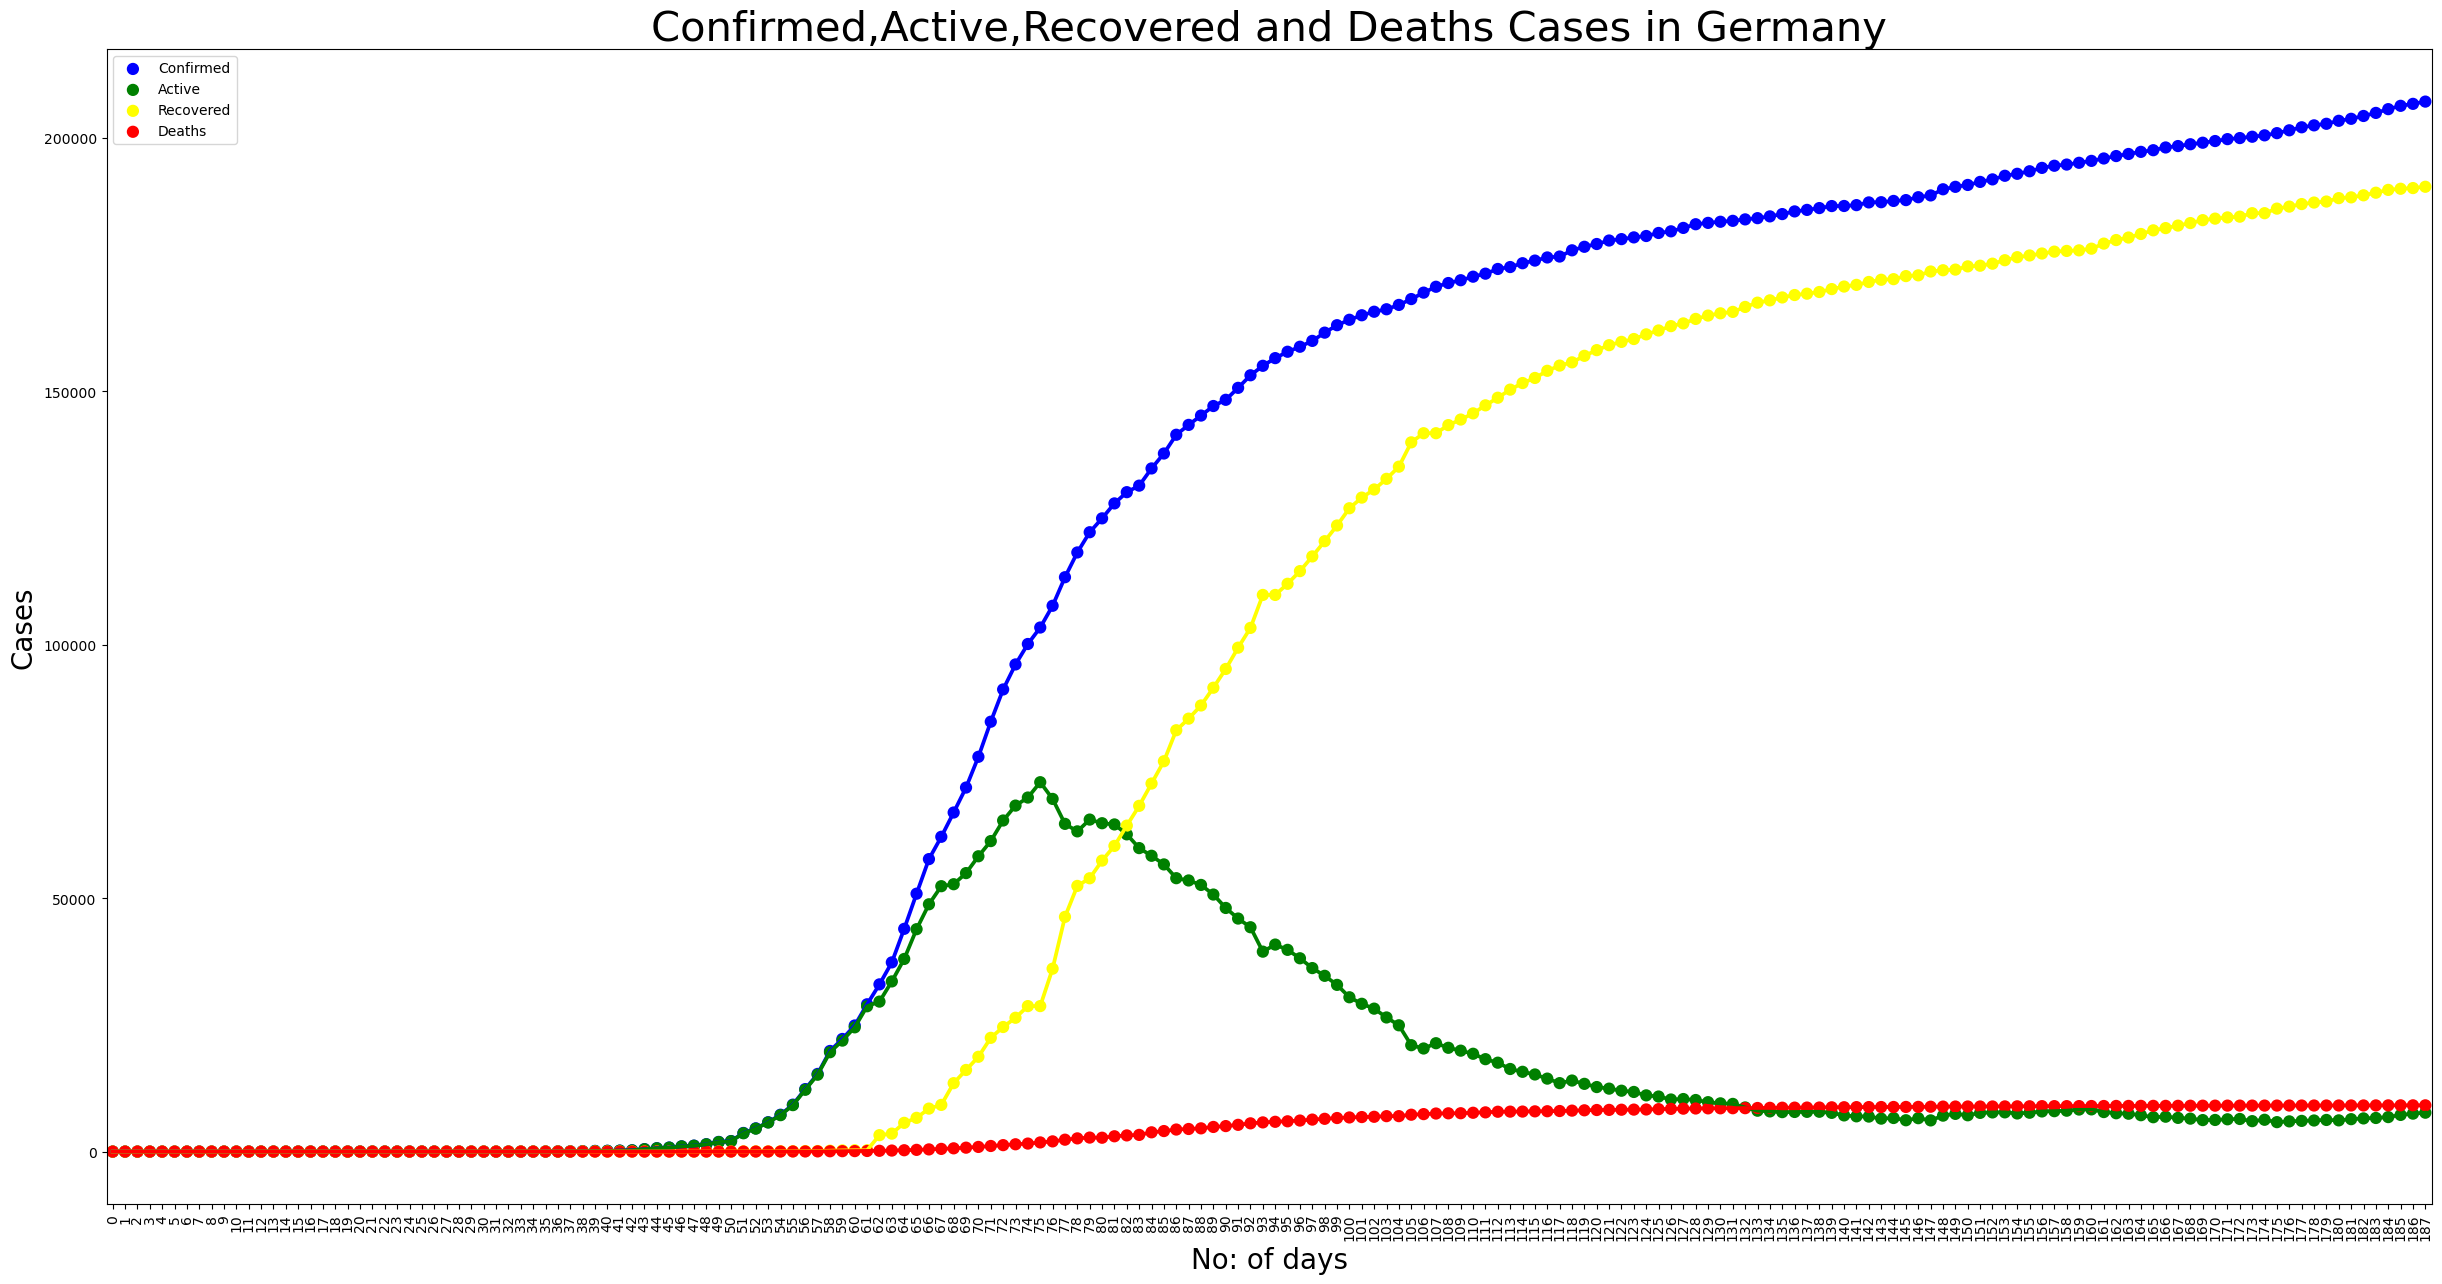

In [75]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=Germany,x=Germany.index,y='Confirmed',color='Blue',label='Confirmed')
sns.pointplot(data=Germany,x=Germany.index,y='Active',color='Green',label='Active')
sns.pointplot(data=Germany,x=Germany.index,y='Recovered',color='Yellow',label='Recovered')
sns.pointplot(data=Germany,x=Germany.index,y='Deaths',color='Red',label='Deaths')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.title("Confirmed,Active,Recovered and Deaths Cases in Germany",fontsize=30)
plt.legend()
plt.show()

Top 5 countries having most number Recovered cases.

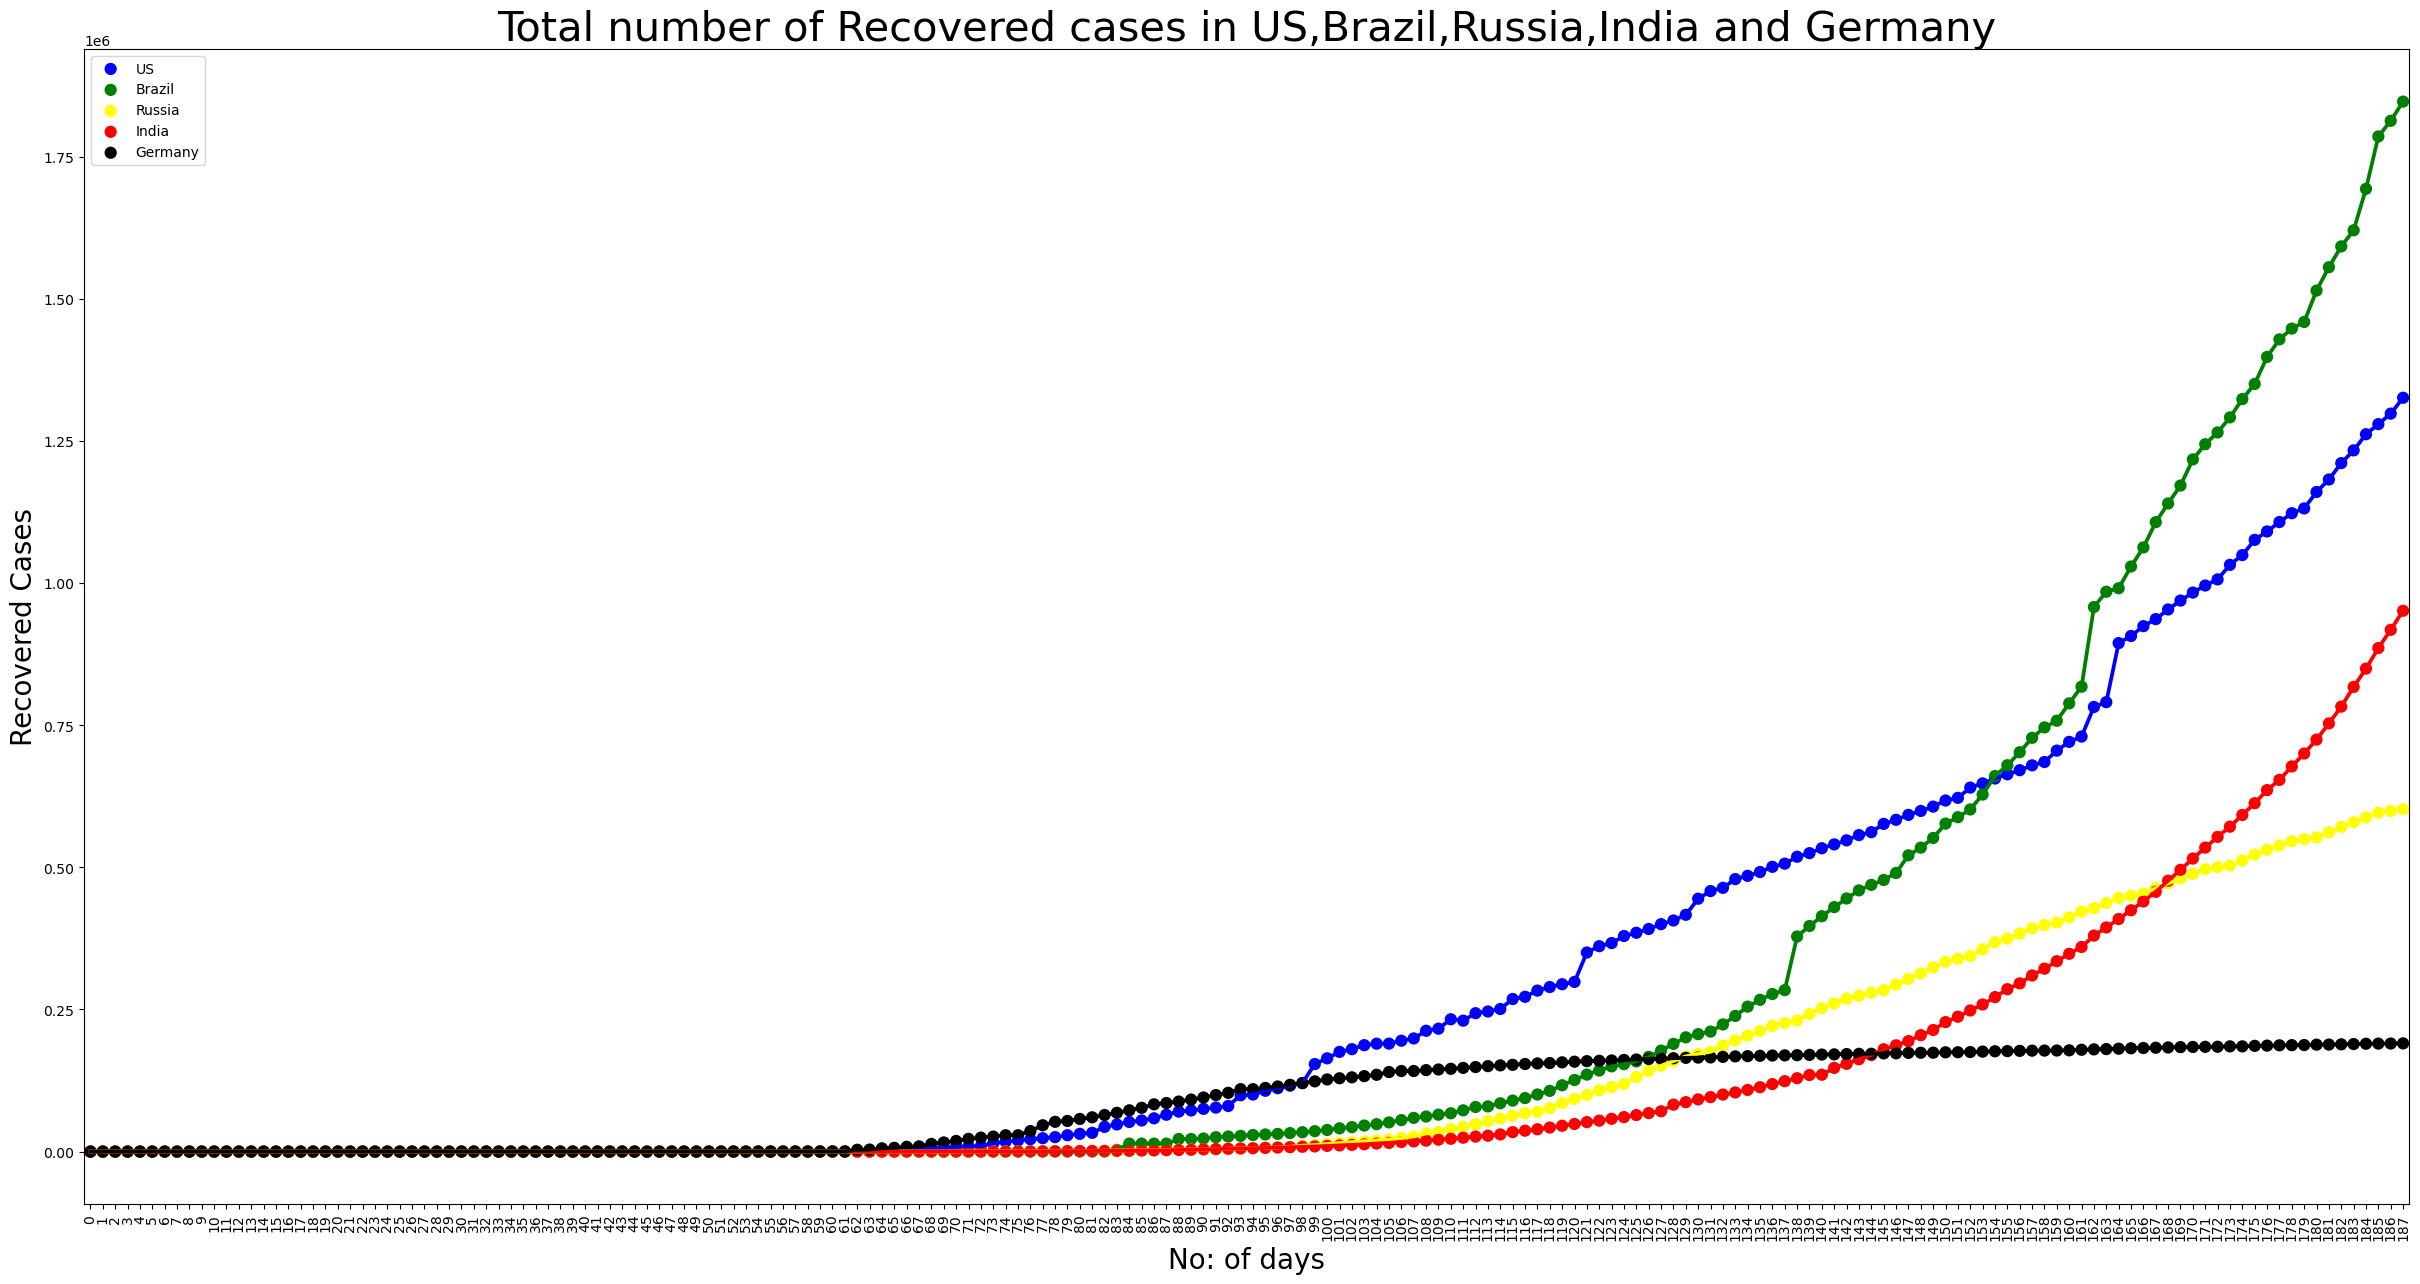

In [76]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=US,x=US.index,y='Recovered',color='Blue',label='US')
sns.pointplot(data=Brazil,x=Brazil.index,y='Recovered',color='Green',label='Brazil')
sns.pointplot(data=Russia,x=Russia.index,y='Recovered',color='Yellow',label='Russia')
sns.pointplot(data=India,x=India.index,y='Recovered',color='Red',label='India')
sns.pointplot(data=Germany,x=Germany.index,y='Recovered',color='Black',label='Germany')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Recovered Cases',fontsize=20)
plt.title("Total number of Recovered cases in US,Brazil,Russia,India and Germany",fontsize=30)
plt.legend()
plt.show()

# Top 20 countries having most number of Death cases

In [77]:
top_deaths = df.groupby(by='Country')["Deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

Country    Deaths
0               US  11011411
1   United Kingdom   3997775
2           Brazil   3938034
3            Italy   3707717
4           France   3048524
5            Spain   3033030
6           Mexico   1728277
7            India   1111831
8             Iran   1024136
9          Belgium    963679
10         Germany    871322
11          Canada    699566
12           China    672413
13            Peru    652113
14     Netherlands    622314
15          Russia    619385
16          Turkey    466056
17          Sweden    448913
18         Ecuador    346618
19           Chile    322480

[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

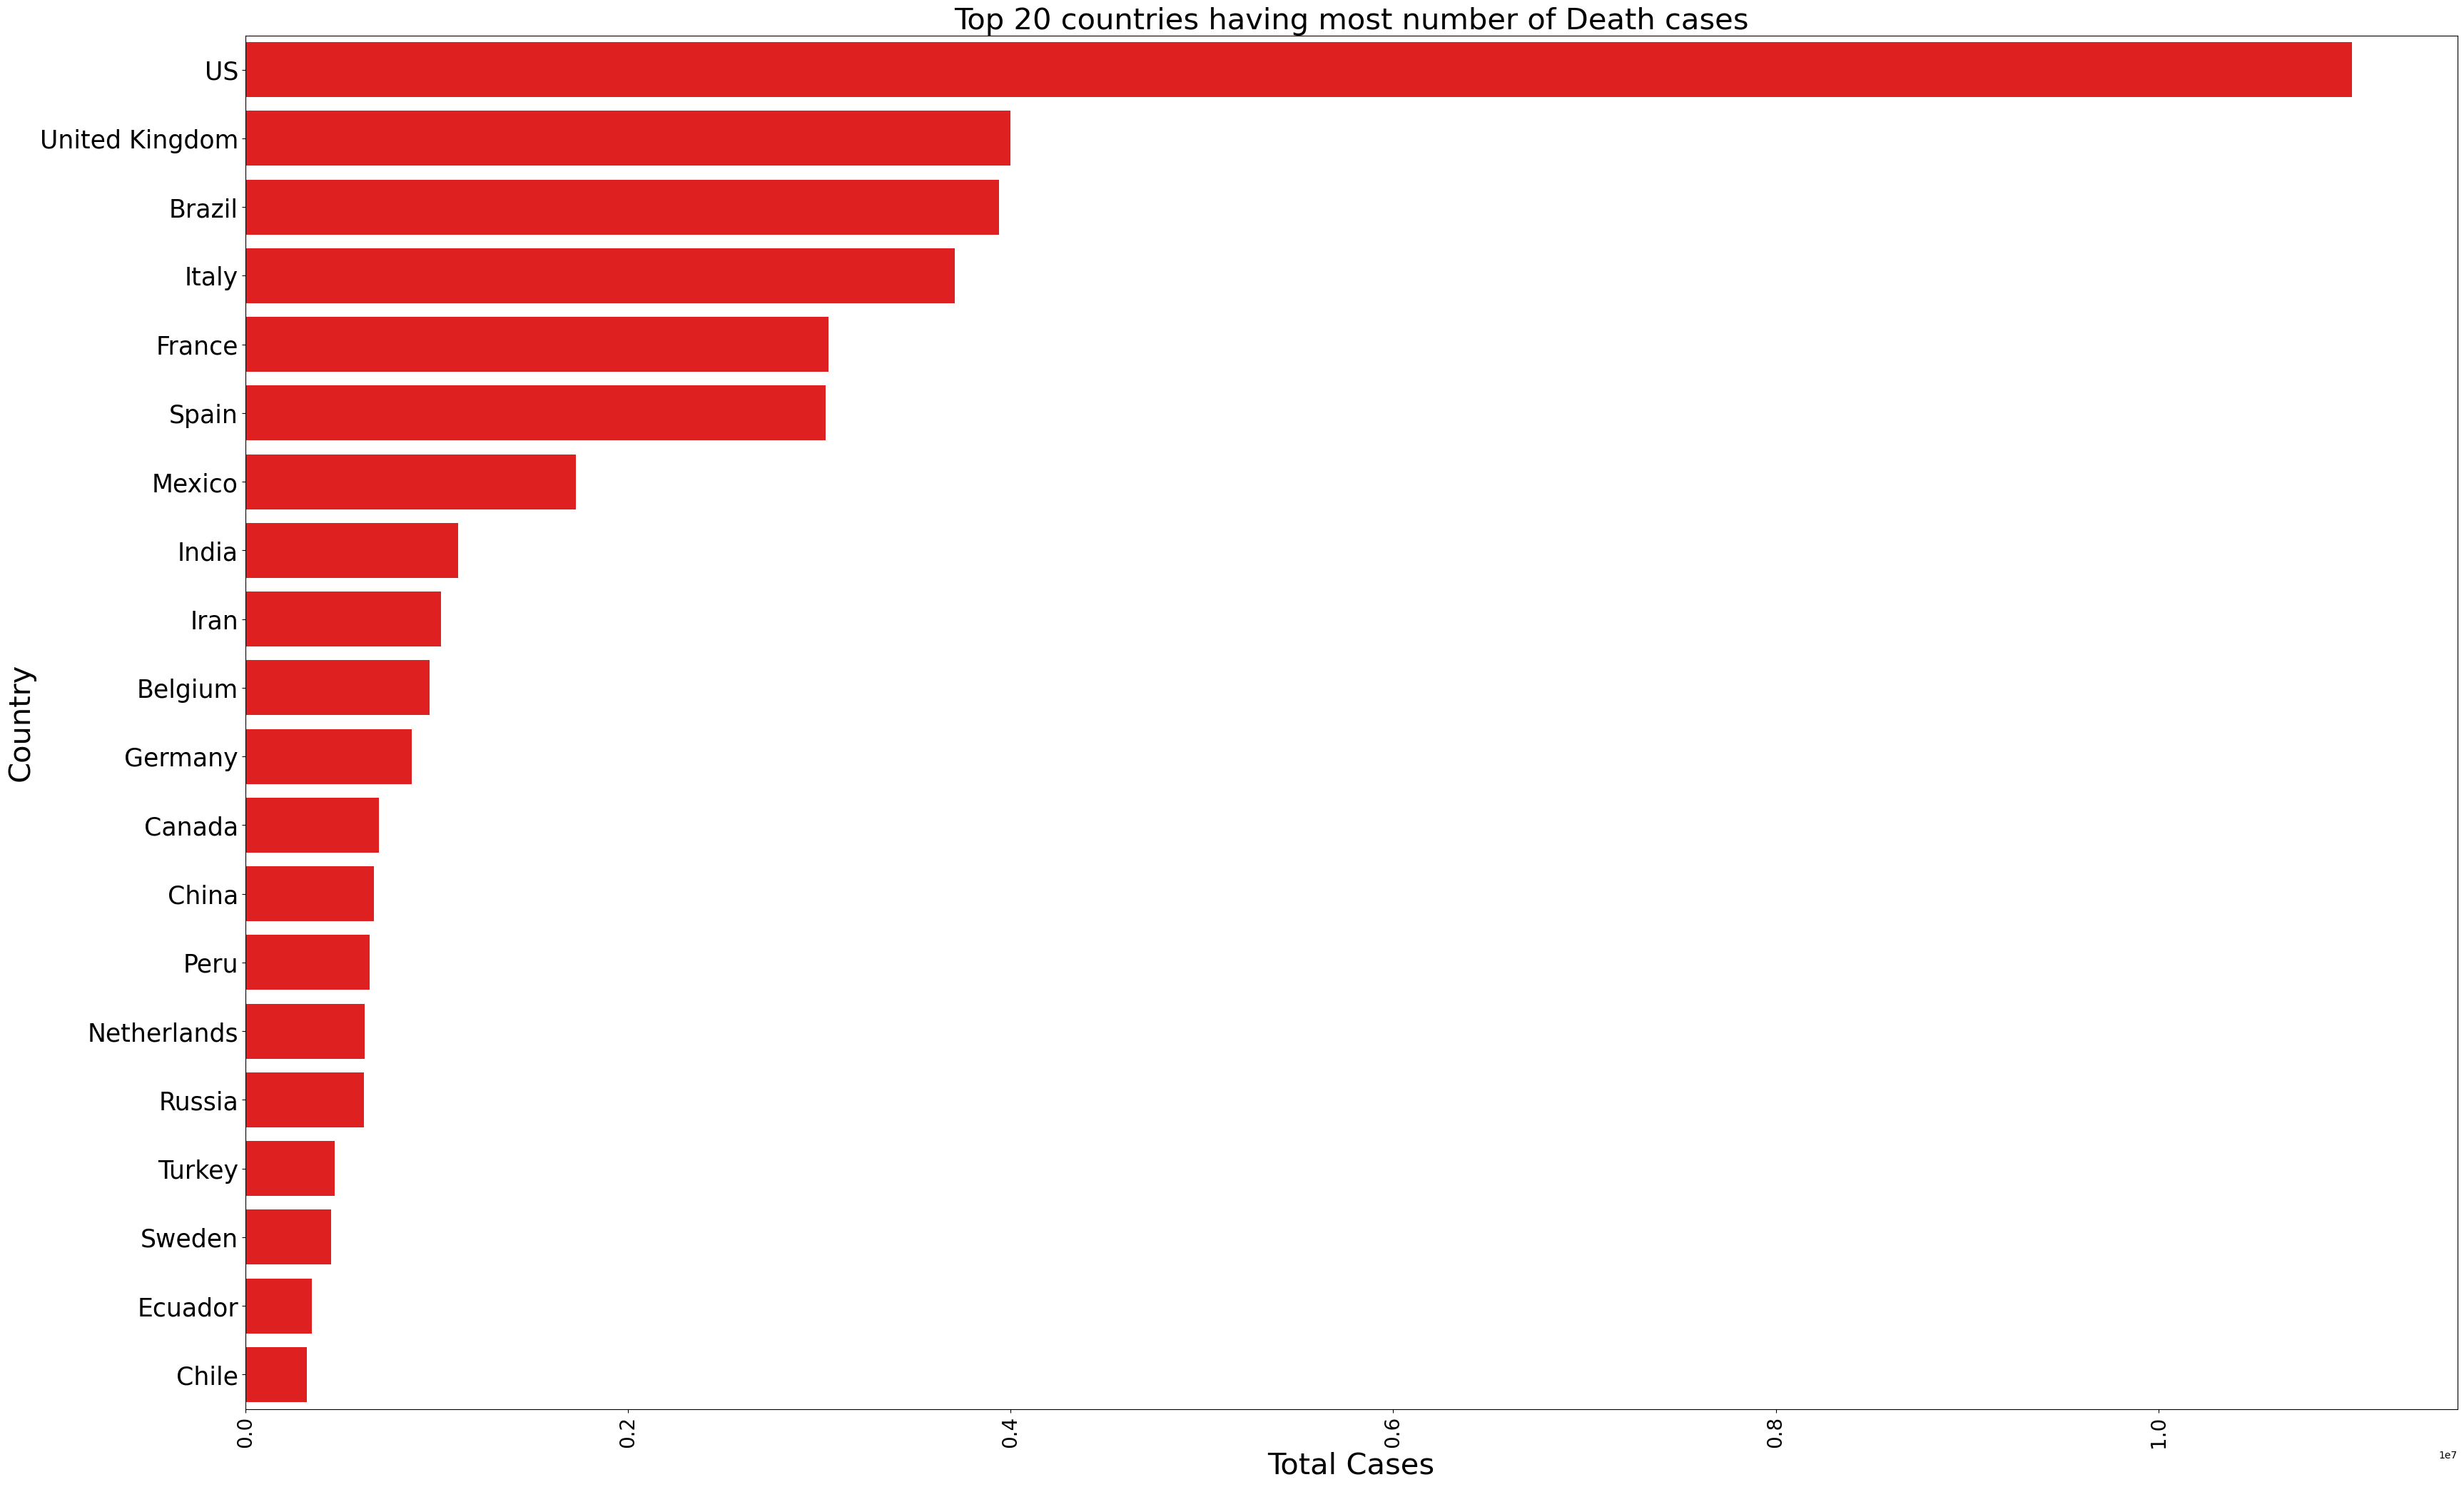

In [78]:
plt.figure(figsize=(40,25))
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=25)
plt.xlabel('Total Cases',fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title("Top 20 countries having most number of Death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.Deaths,y=top_deaths.Country,color='r')
ax.set(xlabel='Total Cases',ylabel='Country')


In [79]:
#Italy - (Total number of 'Confirmed','Active','Recovered','Deaths' cases)
Italy=df[df.Country=='Italy']
Italy = Italy.groupby(by='Date')[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
Italy

Date  Confirmed  Active  Recovered  Deaths
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     245338   12404     197842   35092
184  2020-07-24     245590   12301     198192   35097
185  2020-07-25     245864   12442     198320   35102
186  2020-07-26     246118   12565     198446   35107
187  2020-07-27     246286   12581     198593   35112

[188 rows x 5 columns]

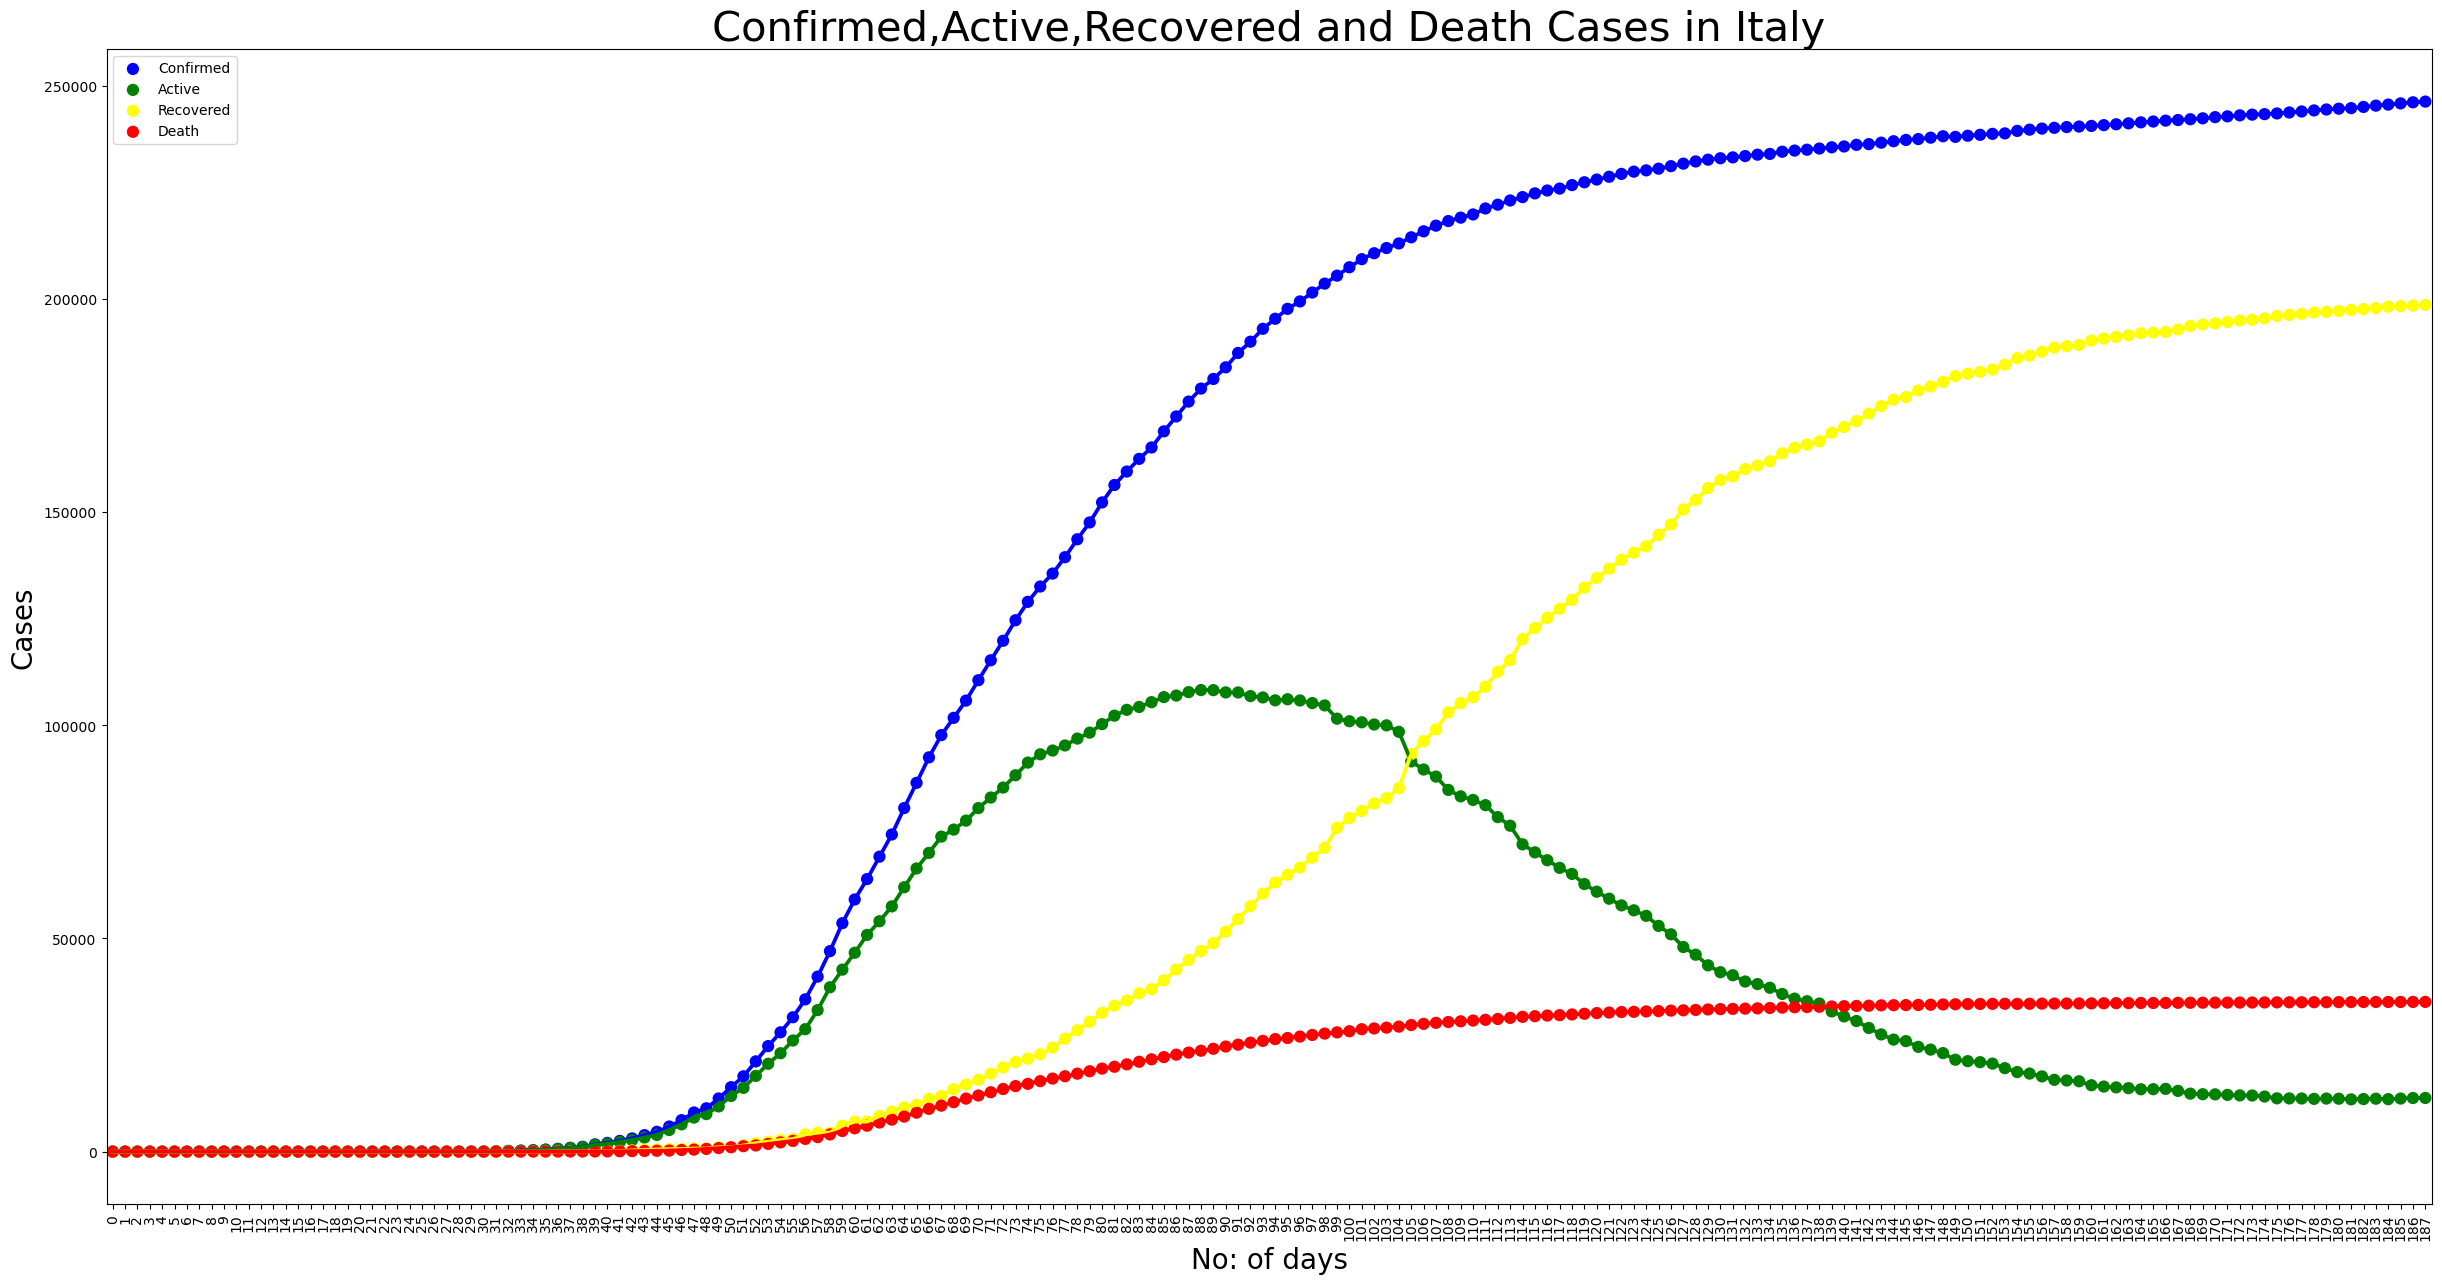

In [80]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=Italy,x=Italy.index,y='Confirmed',color='Blue',label='Confirmed')
sns.pointplot(data=Italy,x=Italy.index,y='Active',color='Green',label='Active')
sns.pointplot(data=Italy,x=Italy.index,y='Recovered',color='Yellow',label='Recovered')
sns.pointplot(data=Italy,x=Italy.index,y='Deaths',color='Red',label='Death')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.title("Confirmed,Active,Recovered and Death Cases in Italy",fontsize=30)
plt.legend()
plt.show()

In [81]:
#France - (Total number of 'Confirmed','Active','Recovered','Deaths' cases)
France=df[df.Country=='France']
France = France.groupby(by='Date')[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
France

Date  Confirmed  Active  Recovered  Deaths
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          2       2          0       0
3    2020-01-25          3       3          0       0
4    2020-01-26          3       3          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     216667  105882      80600   30185
184  2020-07-24     217797  106659      80943   30195
185  2020-07-25     217801  106661      80945   30195
186  2020-07-26     217801  106661      80945   30195
187  2020-07-27     220352  108928      81212   30212

[188 rows x 5 columns]

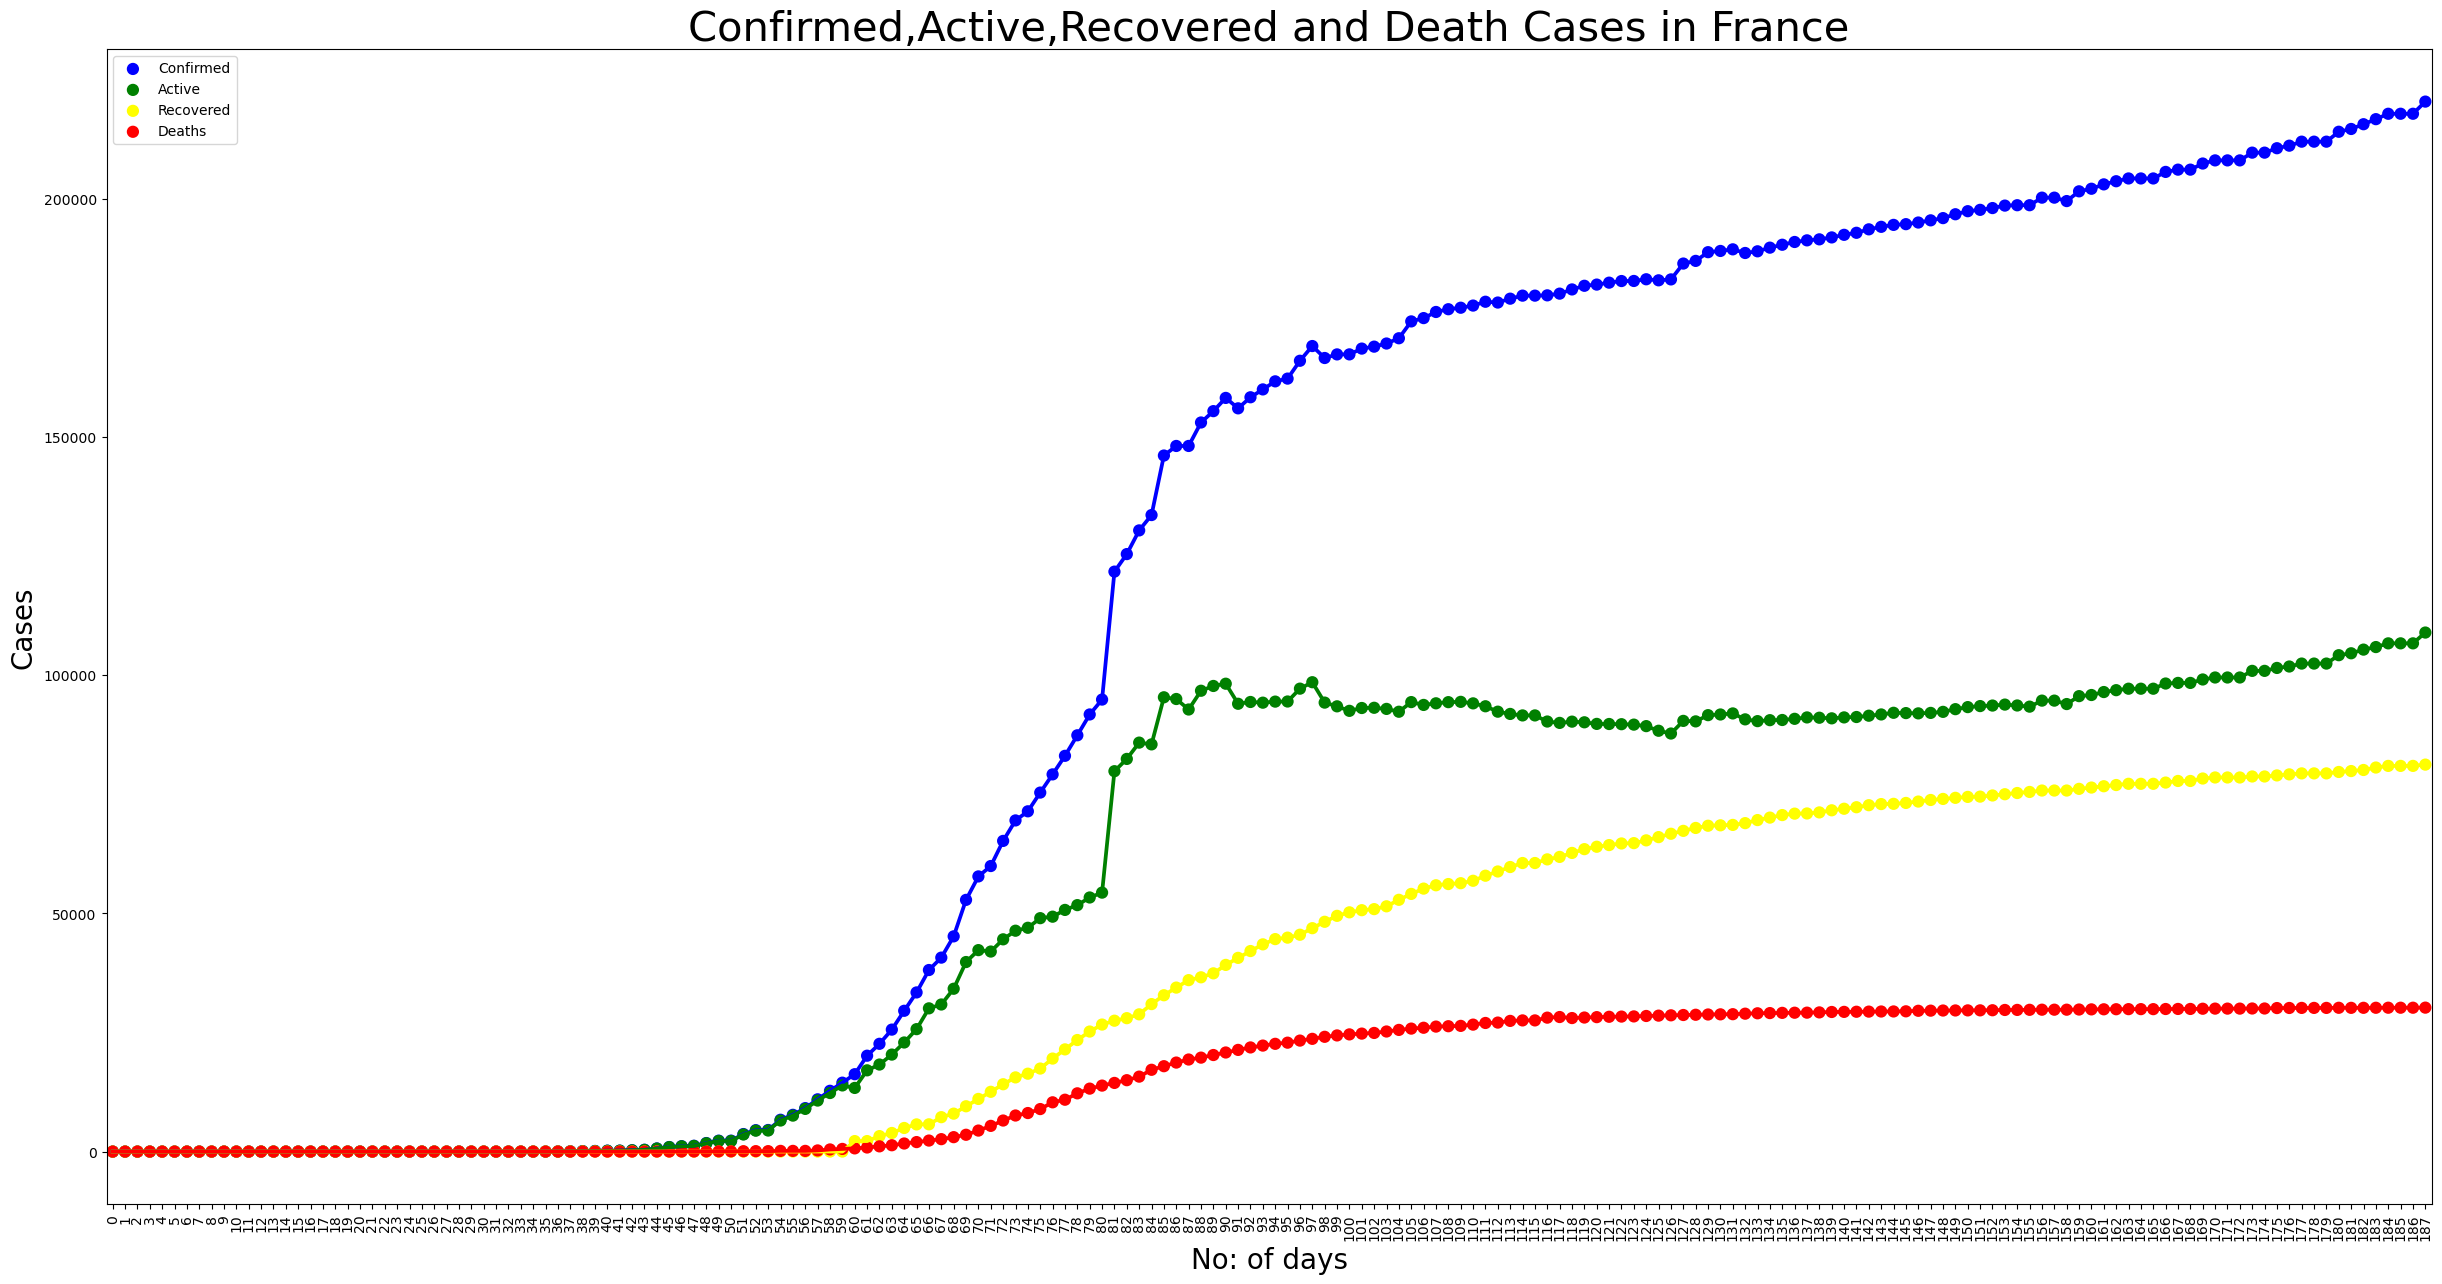

In [82]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=France,x=France.index,y='Confirmed',color='Blue',label='Confirmed')
sns.pointplot(data=France,x=France.index,y='Active',color='Green',label='Active')
sns.pointplot(data=France,x=France.index,y='Recovered',color='Yellow',label='Recovered')
sns.pointplot(data=France,x=France.index,y='Deaths',color='Red',label='Deaths')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.title("Confirmed,Active,Recovered and Death Cases in France",fontsize=30)
plt.legend()
plt.show()

Top 5 countries having most number Death cases.

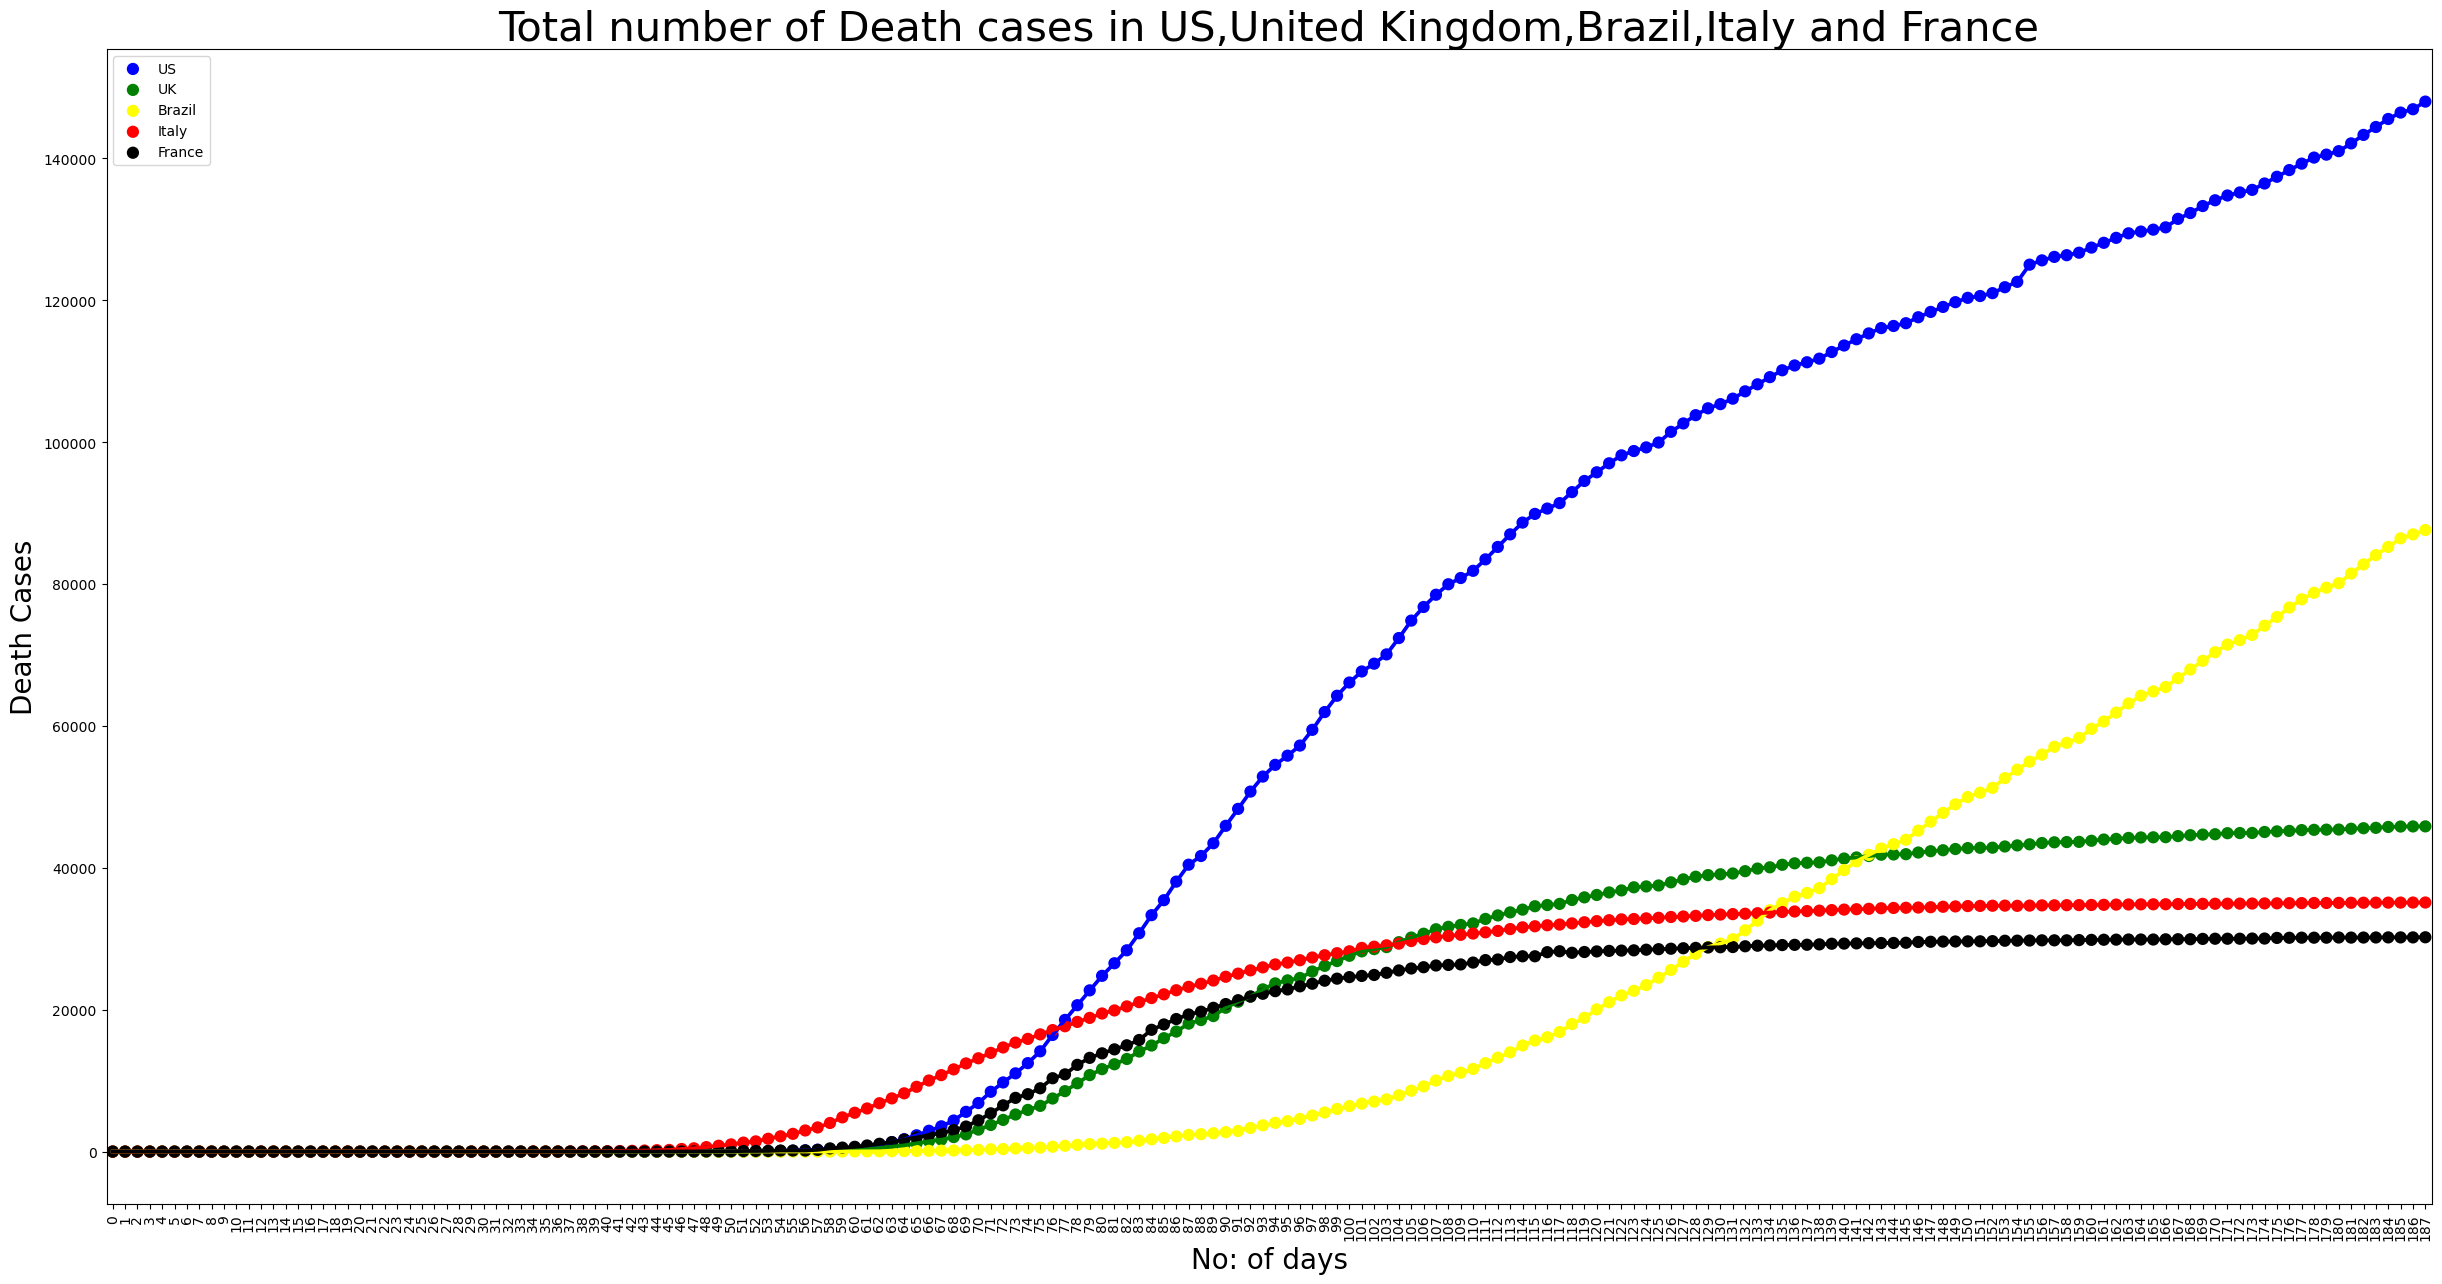

In [84]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90,fontsize=10)
sns.pointplot(data=US,x=US.index,y='Deaths',color='Blue',label='US')
sns.pointplot(data=UK,x=UK.index,y='Deaths',color='Green',label='UK')
sns.pointplot(data=Brazil,x=Brazil.index,y='Deaths',color='Yellow',label='Brazil')
sns.pointplot(data=Italy,x=Italy.index,y='Deaths',color='Red',label='Italy')
sns.pointplot(data=France,x=France.index,y='Deaths',color='Black',label='France')
plt.xlabel('No: of days',fontsize=20)
plt.ylabel('Death Cases',fontsize=20)
plt.title("Total number of Death cases in US,United Kingdom,Brazil,Italy and France",fontsize=30)
plt.legend()
plt.show()

# Forecasting using FBPROPHET

In [85]:
!pip install prophet

In [86]:
from prophet import Prophet

In [87]:
df

State                Country        Lat       Long        Date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       14664 non-null  object 
 1   Country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   Date        49068 non-null  object 
 5   Confirmed   49068 non-null  int64  
 6   Deaths      49068 non-null  int64  
 7   Recovered   49068 non-null  int64  
 8   Active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [89]:
#Changing datatype of "date" column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       14664 non-null  object        
 1   Country     49068 non-null  object        
 2   Lat         49068 non-null  float64       
 3   Long        49068 non-null  float64       
 4   Date        49068 non-null  datetime64[ns]
 5   Confirmed   49068 non-null  int64         
 6   Deaths      49068 non-null  int64         
 7   Recovered   49068 non-null  int64         
 8   Active      49068 non-null  int64         
 9   WHO Region  49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [91]:
Confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
Confirmed

Date  Confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

In [92]:
Active = df.groupby('Date').sum()['Active'].reset_index()
Active

Date   Active
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

In [93]:
Recovered = df.groupby('Date').sum()['Recovered'].reset_index()
Recovered

Date  Recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
..         ...        ...
183 2020-07-23    8710969
184 2020-07-24    8939705
185 2020-07-25    9158743
186 2020-07-26    9293464
187 2020-07-27    9468087

[188 rows x 2 columns]

In [94]:
Deaths = df.groupby('Date').sum()['Deaths'].reset_index()
Deaths

Date  Deaths
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

# Forecasting of Confirmed cases


In [95]:
# Step1 - Renaming the columns
Confirmed.rename(columns={'Date':'ds','Confirmed':'y'},inplace=True)
Confirmed

ds         y
0   2020-01-22       555
1   2020-01-23       654
2   2020-01-24       941
3   2020-01-25      1434
4   2020-01-26      2118
..         ...       ...
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

[188 rows x 2 columns]

In [96]:
#Step 2 - Creating object of Prophet()
conf_model = Prophet(interval_width=0.95)

In [97]:
#Step 3 - Training the model
conf_model.fit(Confirmed)

15:47:01 - cmdstanpy - INFO - Chain [1] start processing
15:47:05 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
#Step 4 - Forecasting for next 7 days
future = conf_model.make_future_dataframe(periods=7)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [99]:
forecast =conf_model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  1.632401e+07  1.616187e+07  1.648931e+07
189 2020-07-29  1.653405e+07  1.637655e+07  1.669183e+07
190 2020-07-30  1.674820e+07  1.658895e+07  1.691282e+07
191 2020-07-31  1.696362e+07  1.679384e+07  1.712044e+07
192 2020-08-01  1.717143e+07  1.699807e+07  1.733202e+07
193 2020-08-02  1.736922e+07  1.720156e+07  1.754657e+07
194 2020-08-03  1.756410e+07  1.738106e+07  1.775121e+07

C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



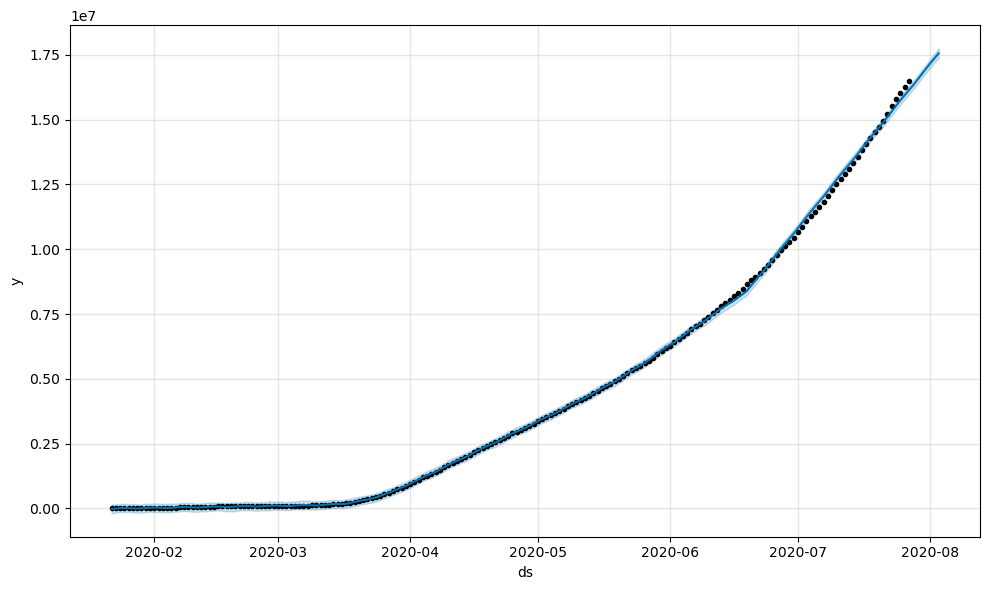

In [100]:
#Visualization
confirmed_plot = conf_model.plot(forecast)


C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



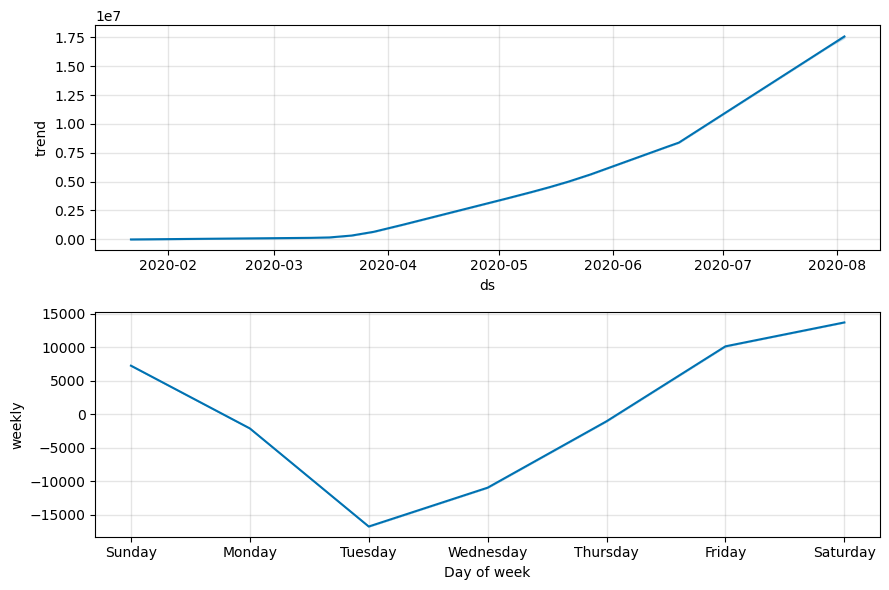

In [101]:
#Components
confirmed_forecast_plot = conf_model.plot_components(forecast)

# Forecasting of Active cases


In [102]:
# Step1 - Renaming the columns
Active.rename(columns={'Date':'ds','Active':'y'},inplace=True)
Active

ds        y
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

In [103]:
#Step 2 - Creating object of Prophet()
act_model = Prophet(interval_width=0.95)

In [104]:
#Step 3 - Training the model
act_model.fit(Active)

15:47:39 - cmdstanpy - INFO - Chain [1] start processing
15:47:39 - cmdstanpy - INFO - Chain [1] done processing


In [105]:
#Step 4 - Fprecasting for next 7 days
future = act_model.make_future_dataframe(periods=7)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [106]:
forecast =act_model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  6.353204e+06  6.282240e+06  6.421390e+06
189 2020-07-29  6.415552e+06  6.344774e+06  6.482202e+06
190 2020-07-30  6.481007e+06  6.411247e+06  6.554696e+06
191 2020-07-31  6.549045e+06  6.479375e+06  6.625942e+06
192 2020-08-01  6.611208e+06  6.542883e+06  6.678181e+06
193 2020-08-02  6.678514e+06  6.598248e+06  6.755520e+06
194 2020-08-03  6.732249e+06  6.651510e+06  6.804123e+06

C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



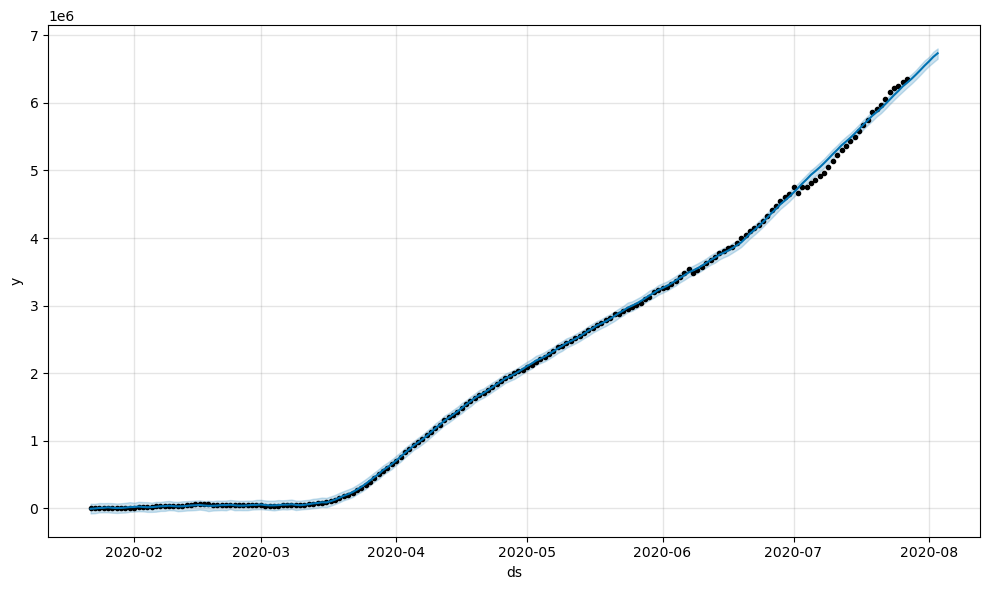

In [107]:
#Visualization
active_plot = act_model.plot(forecast)


C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



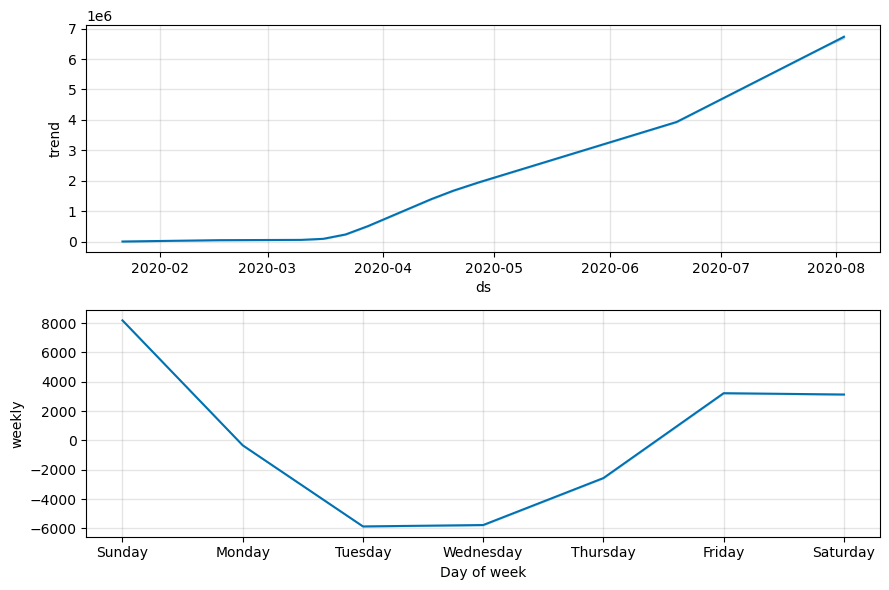

In [108]:
#Components
active_forecast_plot = act_model.plot_components(forecast)

# Forecasting of Recovered cases


In [109]:
# Step1 - Renaming the columns
Recovered.rename(columns={'Date':'ds','Recovered':'y'},inplace=True)
Recovered

ds        y
0   2020-01-22       28
1   2020-01-23       30
2   2020-01-24       36
3   2020-01-25       39
4   2020-01-26       52
..         ...      ...
183 2020-07-23  8710969
184 2020-07-24  8939705
185 2020-07-25  9158743
186 2020-07-26  9293464
187 2020-07-27  9468087

[188 rows x 2 columns]

In [110]:
#Step 2 - Creating object of Prophet()
rec_model = Prophet(interval_width=0.95)

In [111]:
#Step 3 - Training the model
rec_model.fit(Recovered)

15:47:48 - cmdstanpy - INFO - Chain [1] start processing
15:47:48 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
#Step 4 - Fprecasting for next 7 days
future = rec_model.make_future_dataframe(periods=7)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [113]:
forecast =rec_model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  9.313528e+06  9.194298e+06  9.428442e+06
189 2020-07-29  9.455717e+06  9.324643e+06  9.570196e+06
190 2020-07-30  9.598531e+06  9.479854e+06  9.721589e+06
191 2020-07-31  9.740095e+06  9.633312e+06  9.869378e+06
192 2020-08-01  9.880394e+06  9.761616e+06  1.000552e+07
193 2020-08-02  1.000646e+07  9.886992e+06  1.013554e+07
194 2020-08-03  1.014305e+07  1.002213e+07  1.028482e+07

C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



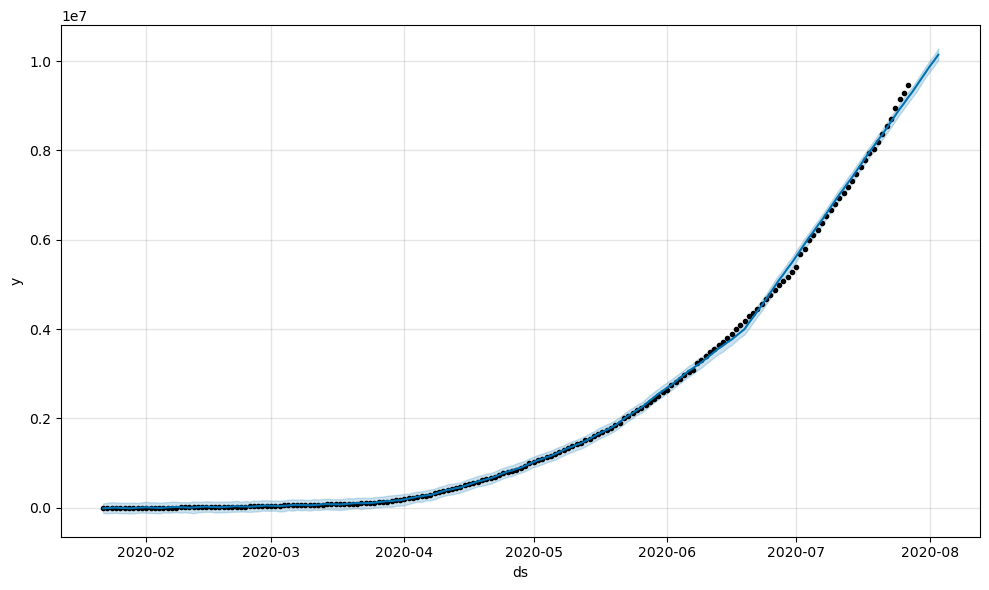

In [114]:
#Visualization
recovered_plot = rec_model.plot(forecast)


C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



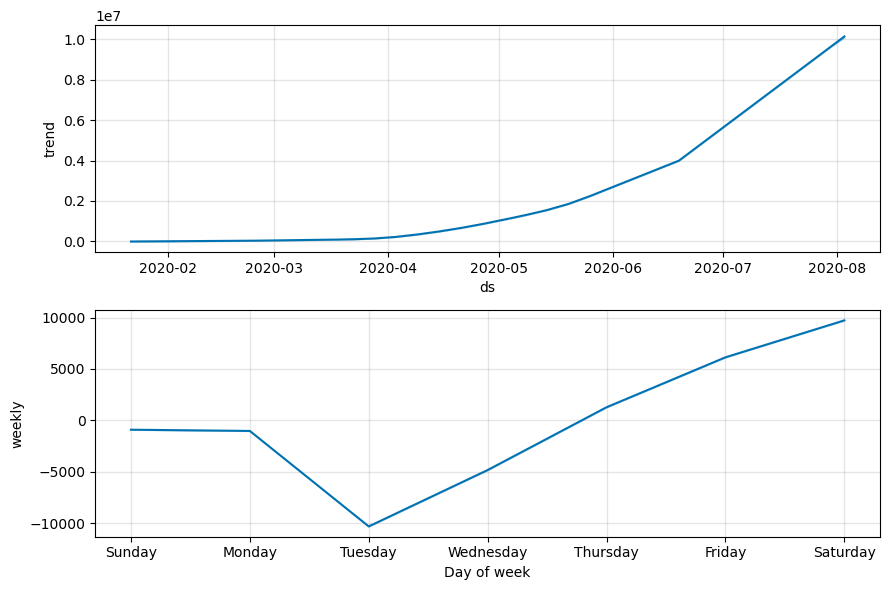

In [115]:
#Components
recovered_forecast_plot = rec_model.plot_components(forecast)

# Forecasting of Death cases


In [116]:
# Step1 - Renaming the columns
Deaths.rename(columns={'Date':'ds','Deaths':'y'},inplace=True)
Deaths

ds       y
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [117]:
#Step 2 - Creating object of Prophet()
death_model = Prophet(interval_width=0.95)

In [118]:
#Step 3 - Training the model
death_model.fit(Deaths)

15:47:56 - cmdstanpy - INFO - Chain [1] start processing
15:47:56 - cmdstanpy - INFO - Chain [1] done processing


In [119]:
#Step 4 - Fprecasting for next 7 days
future = death_model.make_future_dataframe(periods=7)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [120]:
forecast =death_model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

ds           yhat     yhat_lower     yhat_upper
188 2020-07-28  652342.857217  649413.162752  655523.916649
189 2020-07-29  657910.776693  654848.595726  660920.623369
190 2020-07-30  663521.743356  660468.033974  667074.724980
191 2020-07-31  669038.962960  665598.932027  672246.632239
192 2020-08-01  673922.465056  670294.804376  677662.361011
193 2020-08-02  678060.469456  673596.192344  682803.706219
194 2020-08-03  682351.854619  677116.992865  687821.004184

C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



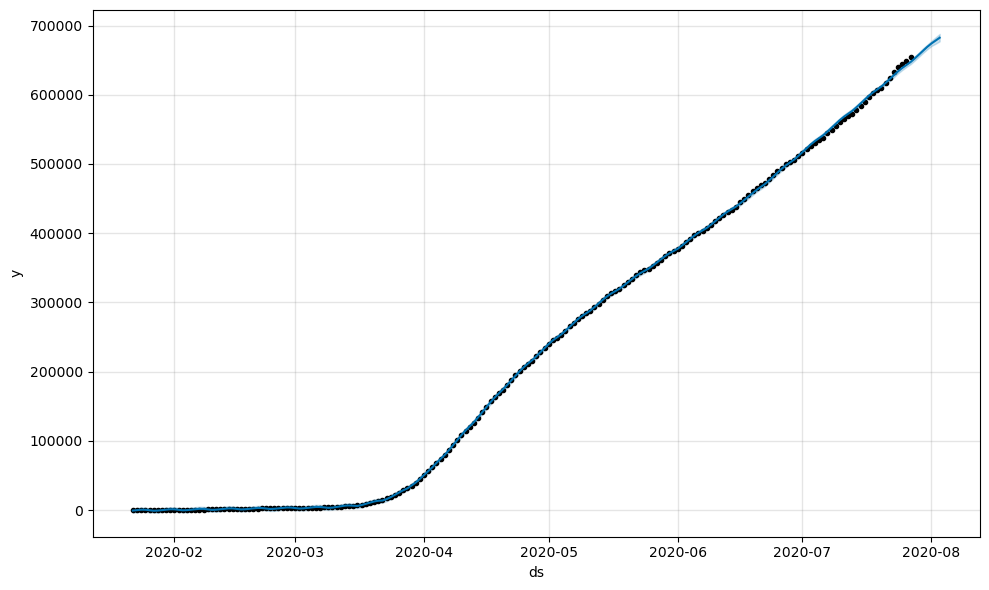

In [123]:
#Visualization
Death_plot = death_model.plot(forecast)


C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



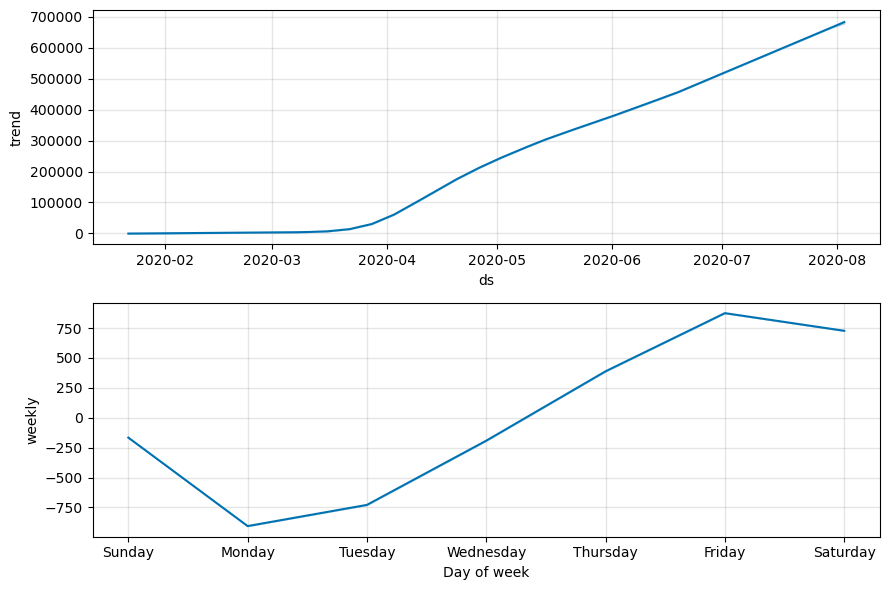

In [124]:
#Components
death_forecast_plot = death_model.plot_components(forecast)